#
<FONT size="10pt"> <center>Projet 2</center></FONT>. 

# Résumé du projet:
- Openclassroom ! https://openclassrooms.com/fr/projects/627/assignment
- Data Scientist dans une start-up de la EdTech : **Academy (niveau Lycée et Université)**
- Projet : **expansion à l’international**
- Objectif : **déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion**
- Questions :
    - **Quels sont les pays avec un fort potentiel de clients pour nos services ?**
    - **Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?**
    - **Dans quels pays l'entreprise doit-elle opérer en priorité ?**
- Mission : **analyse pré-exploratoire de ce jeu de données**
- Données : https://datacatalog.worldbank.org/dataset/education-statistics
- Préanalyse :
    - **Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)**
    - **Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)**
    - **Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)**
    - **Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)**
- Livrables :
    - **Un notebook comportant les analyses pré-exploratoires réalisées (non cleané, pour comprendre votre démarche).**
    - **Un support de présentation pour la soutenance.**

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import colorcet as cc
import matplotlib
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.metrics import r2_score

pd.set_option('mode.chained_assignment', None) # Pour ne pas avoir de message d'erreur quand on crée nouvelle df à partir d'une autre (app)

In [3]:
# Version des librairies importées:
print('La version de pandas utilisée est la version :', pd.__version__)
print('La version de numpy utilisée est la version :', np.__version__)
print('La version de seaborn utilisée est la version :', sns.__version__)
print('La version de colorcet utilisée est la version :', cc.__version__)
print('La version de matplotlib utilisée est la version :', matplotlib.__version__)
print('La version de sklearn utilisée est la version :', sklearn.__version__)

La version de pandas utilisée est la version : 2.0.3
La version de numpy utilisée est la version : 1.24.3
La version de seaborn utilisée est la version : 0.12.2
La version de colorcet utilisée est la version : 3.0.1
La version de matplotlib utilisée est la version : 3.7.2
La version de sklearn utilisée est la version : 1.3.1


In [4]:
# Option de largueur de colonne:
pd.get_option('max_colwidth')
pd.options.display.max_colwidth = 150

#Option de nombre de lignes:
pd.get_option('display.max_rows')
pd.options.display.max_rows = 600

# 1 : Ouverture des fichiers:

In [5]:
# Ouverture des fichier:
Data = pd.read_csv("EdStatsData.csv")
Country = pd.read_csv('EdStatsCountry.csv')
CountrySeries = pd.read_csv('EdStatsCountry-Series.csv')
StatsFootNote = pd.read_csv('EdStatsFootNote.csv')
StatsSeries = pd.read_csv('EdStatsSeries.csv')

# 2 : Valider la qualité et décrire les informations de ce jeu de données:

### 2.1 : DF Country (données générales sur les différents pays ou groupe de pays)

In [6]:
Country.head(3)

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   

                                                                                                                                           Special Notes  \
0          SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.   
1  Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and...   
2                     April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   

            IMF data dissemination standard  Latest population census  \
0                                       NaN                      2010   
1  General Data Dissemination System (GDDS)                      1979   
2  General Data Dissemination System (GDDS)                      1970   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   
2           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  

[3 rows x 32 columns]

In [7]:
# Informations sur les variables (Colonnes, nb non NaN, Type des valeurs, nb lignes, nb colonnes):
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [8]:
# Taille de la DF:
Country.shape

(241, 32)

In [9]:
# Nombre de duplicata:
print('Il y a', sum(Country.duplicated()),'duplicata dans ce DF.')

Il y a 0 duplicata dans ce DF.


In [10]:
# Etude des NaNs globaux:
print('Il y a', Country.isna().sum().sum(), 'NaNs dans ce DF.')
print('Il y a', Country.count().sum(), 'non NaNs dans ce DF.')

Il y a 2354 NaNs dans ce DF.
Il y a 5358 non NaNs dans ce DF.


In [11]:
# Pourcentage de NaNs par colonne:
Country.isna().sum()/len(Country)*100

Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
2-alpha code                                           1.244813
Currency Unit                                         10.788382
Special Notes                                         39.834025
Region                                                11.203320
Income Group                                          11.203320
WB-2 code                                              0.414938
National accounts base year                           14.937759
National accounts reference year                      86.721992
SNA price valuation                                   18.257261
Lending category                                      40.248963
Other groups                                          75.933610
System of National Accounts             

In [12]:
# Analyse des colonnes les plus utiles:

# Nombre de pays:
print('Il y a', Country['Short Name'].nunique(), 'pays ou groupe de pays différents.')
print()

# Les régions:
print('Il y a', Country['Region'].nunique(), 'regions différentes.')
print('Il y a', len(Country[Country['Region'].isna()]), 'NaNs dans la colonne Region qui correpondent aux groupements de pays.')
print()

# Les INCOMEs:
print('Il y a', len(Country['Income Group'].unique()),"groupes d'income dans ce DF.")
print('Il y a', len(Country[Country['Income Group'].isna()]), "NaNs dans cette colonne qui correspondent aux groupements de pays.")

Il y a 241 pays ou groupe de pays différents.

Il y a 7 regions différentes.
Il y a 27 NaNs dans la colonne Region qui correpondent aux groupements de pays.

Il y a 6 groupes d'income dans ce DF.
Il y a 27 NaNs dans cette colonne qui correspondent aux groupements de pays.


- **L'étude par pays, par région et par income est intéresssante pour l'analyse du jeux de données.**
- **Hypothése pour la seconde partie du projet : Il est probable que les pays les plus interessants pour l'entreprise soient les pays avec un Income élevé afin de pouvoir étudier en ligne sur un ordinateur.**

In [13]:
# Etude des Groupements de régions:
Country[Country['Region'].isna()]['Short Name']

5                                          Arab World
57              East Asia & Pacific (developing only)
58            East Asia & Pacific (all income levels)
59            Europe & Central Asia (developing only)
60          Europe & Central Asia (all income levels)
63                                          Euro area
68                                     European Union
78                                          Gibraltar
89                                        High income
92             Heavily indebted poor countries (HIPC)
116       Latin America & Caribbean (developing only)
122     Latin America & Caribbean (all income levels)
123      Least developed countries: UN classification
124                                        Low income
127                               Lower middle income
128                               Low & middle income
140    Middle East & North Africa (all income levels)
143                                     Middle income
148      Middle East & North

- **Les groupements de régions sont un melange des options de la colonne Income et de la colonne Region, que l'on peut donc retrouver en grande partie par groupement via ces deux colonnes.** 

In [14]:
# Colonne Region:
Country['Region'].unique()
#pd.pivot_table(Country, index = 'Region', value = 'aggfunc = list)
Country[Country['Region'].notna()].groupby('Region')['Short Name'].apply(list).to_frame()
Country[Country['Income Group'].notna()].groupby('Income Group')['Short Name'].apply(list).to_frame()

Short Name
Income Group                                                                                                                                                               
High income: OECD     [Australia, Austria, Belgium, Canada, Switzerland, Chile, Czech Republic, Germany, Denmark, Spain, Estonia, Finland, France, United Kingdom, Greec...
High income: nonOECD  [Aruba, Andorra, United Arab Emirates, Antigua and Barbuda, Bahrain, The Bahamas, Bermuda, Barbados, Brunei, Channel Islands, Curaçao, Cayman Isla...
Low income            [Afghanistan, Burundi, Benin, Burkina Faso, Bangladesh, Central African Republic, Dem. Rep. Congo, Comoros, Eritrea, Ethiopia, Guinea, The Gambia,...
Lower middle income   [Armenia, Bolivia, Bhutan, Côte d'Ivoire, Cameroon, Congo, Cabo Verde, Djibouti, Egypt, Micronesia, Georgia, Ghana, Guatemala, Guyana, Honduras, I...
Upper middle income   [Angola, Albania, Argentina, American Samoa, Azerbaijan, Bulgaria, Bosnia and Herzegovina, Belarus, Belize, Brazil, Botswana, China, Colombia, Cos...

In [15]:
# Etude de la colonne recensement de la population:
Country['Latest population census'].value_counts(dropna = False).to_frame().reset_index()

Latest population census  \
0                                                                                                                                                    2011   
1                                                                                                                                                    2010   
2                                                                                                                                                     NaN   
3                                                                                                                                                    2012   
4                                                                                                                                                    2009   
5                                                                                                                                                    2008   
6                                                                                                                                                    2007   
7                                                                                                                                                    2013   
8                                                                                                                                                    2006   
9                                                                                                                                                    2004   
10                                                                                                                                                   2002   
11                                                                                                                                                   2005   
12                                                                                       2011. Population figures compiled from administrative registers.   
13                                                                                                                                                   2003   
14                                                                                                                                                   1984   
15                                                                                                                                                   1998   
16                                                                                                                                                   1970   
17                                                                                                                                                   1979   
18                                                                                                2006. Rolling census based on continuous sample survey.   
19                                                                                                                          Guernsey: 2009; Jersey: 2011.   
20                                                                                                                                                   1996   
21  2011. The population censuses for 1986 and 1996 were based on a one-in-seven sample of the population, while that for 2006 was based on a one-in-t...   
22                                                                                                                                                   1997   
23                                                                                                                                                   1993   
24                                                                                                                                                   1983   
25                                             

- **Les années avec le plus de pays dont le dernier rencensement est répertorié sont les années 2011 puis 2010.**
- **Pour une étude de la population totale il est donc intéressant de regarder en priorité l'année 2011.**

In [16]:
# Création d'une DF restreinte des pays avec les colonnes pertinantes pour l'analyse des données chiffrées:  
# En enlevant les regroupements de régions et d'incomes déja présent.
DFCountry = Country[['Country Code', 'Short Name', 'Region', 'Income Group']]
DFCountry = DFCountry[DFCountry['Region'].notna()]

### 2.2 : DF Country Series (Sources des différentes données)

In [17]:
CountrySeries.head(3)

CountryCode   SeriesCode  \
0         ABW  SP.POP.TOTL   
1         ABW  SP.POP.GROW   
2         AFG  SP.POP.GROW   

                                                DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population Prospects         NaN  
1   Data sources: United Nations World Population Prospects         NaN  
2   Data sources: United Nations World Population Prospects         NaN

In [18]:
# Informations sur les variables (Colonnes, nb non NaN, Type des valeurs, nb lignes, nb colonnes):
CountrySeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [19]:
# Taille du fichier:
CountrySeries.shape

(613, 4)

In [20]:
# Etude des colonnes:
print('\033[1m''Il y a', CountrySeries['CountryCode'].nunique(), 'pays répertoriés dans cette DF contre 214 dans la DF Country''\033[0m')
print('\033[1m''Il y a', CountrySeries['SeriesCode'].nunique(), 'indicateurs répertoriés dans cette DF contre 3665 dans la DF Stats Séries (voir 2.4)''\033[0m')

#ListePays = list(CountrySeries['CountryCode'].unique())
#ListePays2 = list(DFCountry['Country Code'].unique())
#DFCountry[~DFCountry['Country Code'].isin(ListePays)]
#CountrySeries[~CountrySeries['CountryCode'].isin(ListePays2)]

Il y a 211 pays répertoriés dans cette DF contre 214 dans la DF Country
Il y a 21 indicateurs répertoriés dans cette DF contre 3665 dans la DF Stats Séries (voir 2.4)


In [21]:
# Analyse de la colonne description:
CountrySeries['DESCRIPTION'].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

- **A mon niveau de compréhension il semblerait que ça soit la source/provenance des différentes données du fichier Data en fonction des codes des indicateurs bien qu'il n'y ait que 613 lignes et donc pas toutes les informations sur tous les pays et tous les indicateurs.**

In [22]:
# Etude des sources pour les indicateurs selectionnés en partie 2.4 :
ListIndicDes = list(StatsSeries[StatsSeries['Periodicity'].notna()]['Series Code'])
list(CountrySeries[CountrySeries['SeriesCode'].isin(ListIndicDes)]['DESCRIPTION'].unique())

['Data sources : United Nations World Population Prospects',
 'Data sources: United Nations World Population Prospects',
 'Estimates are based on regression.',
 'Data sources : Institute of Statistics, Eurostat',
 'Data sources : Australian Bureau of Statistics',
 'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
 'Data sources: Australian Bureau of Statistics',
 'Data sources : Eurostat',
 'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
 'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
 'Data sources : National Statistical Committee of the Republic of Belarus',
 'Data sources: National Statistical Committee of the Republic of Belarus',
 'Data sources : Bermuda Government Department of Statistics',
 'Data sources: Bermuda Government Department of Statistics',
 'Data sources : Statistics Canada',
 'Data sources: Statistics C

### 2.3 : DF Stats Foot Note (Mode de calculs et incertitudes des données)

In [23]:
StatsFootNote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [24]:
# Informations sur les variables (Colonnes, nb non NaN, Type des valeurs, nb lignes, nb colonnes):
StatsFootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [25]:
# Analyse des colonnes:
print('Il y a', StatsFootNote['CountryCode'].nunique(), 'pays reçensés dans cette DF')
print('Il y a', StatsFootNote['SeriesCode'].nunique(), 'indicateurs différents dans cette DF.')
print('Il y a', StatsFootNote['Year'].nunique(), 'années différentes dans cette DF.')

Il y a 239 pays reçensés dans cette DF
Il y a 1558 indicateurs différents dans cette DF.
Il y a 56 années différentes dans cette DF.


In [26]:
StatsFootNote['Year'].unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

- **Il n'y a que 1558 indicateurs sur les 3665 indicateurs (voir 2.4) de la DF qui décrit les indicateurs.**
- **Il y a 56 annees (55 si on corrige l'erreure de typo de yr2012) dans cette DF contre 65 dans la DF principale (voir 2.5).**

In [27]:
# Analyse de la colonne DESCRIPTION:
list(StatsFootNote['DESCRIPTION'].unique())

['Country estimation.',
 'UIS Estimation',
 'UNESCO Institute for Statistics (UIS) estimate',
 '5-year average value between 0s and 5s',
 'Percentage includes lower secondary education.',
 'Country data',
 'Country Data',
 'UNSD WPP08 revision file 2A and 3A.',
 'Not applicable',
 'Percentage includes all tertiary levels (ISCED 5-8)',
 'Estimated',
 'UIS estimation.',
 '<0.1. Plausible bound is <0.1-0.1',
 'Uncertainty bound is 127.1 - 148.2',
 'Uncertainty bound is 146.6 - 173.2',
 'Uncertainty bound is 134.1 - 157.1',
 'Uncertainty bound is 207.2 - 261.6',
 'Uncertainty bound is 60.2 - 86.1',
 'Uncertainty bound is 184.5 - 227.9',
 'Uncertainty bound is 167.8 - 201.7',
 'Uncertainty bound is 130.4 - 152.5',
 'Uncertainty bound is 240.3 - 308.5',
 'Country estimation',
 'Uncertainty bound is 212.6 - 269.3',
 'Uncertainty bound is 201.4 - 253.3',
 'Uncertainty bound is 190.1 - 236.6',
 'Uncertainty bound is 162.4 - 193.8',
 'Uncertainty bound is 123.7 - 144.2',
 'Uncertainty bound is 9

- **La colonne description décrit l'incertitude de certains indicateurs pour certaines années de mesures.**

In [28]:
# Etude des descriptions pour les indicateurs selectionnés en partie 2.4 :
ListIndicDes = list(StatsSeries[StatsSeries['Periodicity'].notna()]['Series Code'])
list(StatsFootNote[StatsFootNote['SeriesCode'].isin(ListIndicDes)]['DESCRIPTION'].unique())

['5-year average value between 0s and 5s',
 'UNSD WPP08 revision file 2A and 3A.',
 '<0.1. Plausible bound is <0.1-0.1',
 'Uncertainty bound is 127.1 - 148.2',
 'Uncertainty bound is 146.6 - 173.2',
 'Uncertainty bound is 134.1 - 157.1',
 'Uncertainty bound is 207.2 - 261.6',
 'Uncertainty bound is 60.2 - 86.1',
 'Uncertainty bound is 184.5 - 227.9',
 'Uncertainty bound is 167.8 - 201.7',
 'Uncertainty bound is 130.4 - 152.5',
 'Uncertainty bound is 240.3 - 308.5',
 'Uncertainty bound is 212.6 - 269.3',
 'Uncertainty bound is 201.4 - 253.3',
 'Uncertainty bound is 190.1 - 236.6',
 'Uncertainty bound is 162.4 - 193.8',
 'Uncertainty bound is 123.7 - 144.2',
 'Uncertainty bound is 98.4 - 115',
 'Uncertainty bound is 56.6 - 84.7',
 'Uncertainty bound is 260.6 - 335.6',
 'Uncertainty bound is 229.5 - 293.2',
 'Uncertainty bound is 116.9 - 136.5',
 'Uncertainty bound is 113.4 - 132.5',
 'Uncertainty bound is 102.3 - 119.6',
 'Uncertainty bound is 90.3 - 106.6',
 'Uncertainty bound is 255.3 

### 2.4 : DF Stats Séries (Description des indicateurs)

In [29]:
StatsSeries.head(3)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   

                                                           Indicator Name  \
0  Barro-Lee: Percentage of female population age 15-19 with no education   
1         Barro-Lee: Percentage of population age 15-19 with no education   
2    Barro-Lee: Percentage of female population age 15+ with no education   

                                              Short definition  \
0  Percentage of female population age 15-19 with no education   
1         Percentage of population age 15-19 with no education   
2    Percentage of female population age 15+ with no education   

                                               Long definition  \
0  Percentage of female population age 15-19 with no education   
1         Percentage of population age 15-19 with no education   
2    Percentage of female population age 15+ with no education   

   Unit of measure Periodicity Base Period Other notes Aggregation method  \
0              NaN         NaN         NaN         NaN                NaN   
1              NaN         NaN         NaN         NaN                NaN   
2              NaN         NaN         NaN         NaN                NaN   

   ... Notes from original source  General comments  \
0  ...                        NaN               NaN   
1  ...                        NaN               NaN   
2  ...                        NaN               NaN   

                                                       Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
1  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
2  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  

[3 rows x 21 columns]

In [30]:
# Informations sur les variables (Colonnes, nb non NaN, Type des valeurs, nb lignes, nb colonnes):
StatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [31]:
# Nombre de duplicata:
print('Il y a', sum(StatsSeries.duplicated()),'duplicata dans ce DF.')

Il y a 0 duplicata dans ce DF.


In [32]:
# Pourcentage de NaNs par colonne:
StatsSeries.isna().sum()/len(StatsSeries)*100

Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000


- **Beaucoup de colonnes vides à 100% de NaNs.**
- **Beaucoup de colonnes presque vide entre 90 et 100% de NaNs.**

In [33]:
# Analyse des colonnes:
print('Il y a', StatsSeries['Series Code'].nunique(), "indicateurs dans ce DF.")
print('Il y a', StatsSeries['Topic'].nunique(), 'topics dans ce DF.')
print('Sur', len(StatsSeries), 'on a', len(StatsSeries[StatsSeries['Periodicity'].notna()]), 'lignes qui ont une périodicité de noté :', StatsSeries[StatsSeries['Periodicity'].notna()]['Periodicity'].unique()[0])

Il y a 3665 indicateurs dans ce DF.
Il y a 37 topics dans ce DF.
Sur 3665 on a 99 lignes qui ont une périodicité de noté : Annual


- **L'utilisation des topics et de la périodicité pour diminuer le nombre d'indicateurs est intéressante.**
- **L'utilisation des définitions est importante pour comprendre les indicateurs.** 

In [34]:
# Etude de la colonne Base Period:
StatsSeries['Base Period'].value_counts(dropna = False)

Base Period
NaN                           3351
Projections (2010 to 2100)     308
2010                             2
2011                             2
14                               2
Name: count, dtype: int64

- **Colonne à 91% de NaNs avec 308 indicateurs n'étant qu'une projections de 2010 à 2100.**

In [35]:
StatsSeries[StatsSeries['Periodicity'].notna()]['Base Period'].value_counts(dropna = False)

Base Period
NaN     95
2010     2
2011     2
Name: count, dtype: int64

- **Sur les indicateurs ayant une periodicité annuelle on en a 2 pour 2010, 2 pour 2011 et le reste non indiqué.**
- **Ce qui veut dire que ces indicateurs ne devraient pas avoir de données aprés l'année en cours.**

In [36]:
# Topics contenus dans les 99 indicateurs ayant une périodicité annuelle notée:
StatsSeries[StatsSeries['Periodicity'].notna()]['Topic'].value_counts()

Topic
Population                                                                                      52
Health: Population: Structure                                                                   13
Social Protection & Labor: Labor force structure                                                11
Economic Policy & Debt: Purchasing power parity                                                  6
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators           3
Laber                                                                                            3
Social Protection & Labor: Unemployment                                                          3
Infrastructure: Communications                                                                   2
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators     2
Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita                            1
Heal

In [37]:
# Indicateurs ayant une périodicité annuelle:
ListeIndicateursAnnuels = list(StatsSeries[StatsSeries['Periodicity'].notna()]['Indicator Name'])
ListeIndicateursNonAnnuels = list(StatsSeries[~StatsSeries['Periodicity'].notna()]['Indicator Name'])

In [38]:
x = StatsSeries[StatsSeries['Periodicity'].notna()]
len(list(x[~x['Indicator Name'].str.contains('male|female')]['Indicator Name']))

54

- **Indicateurs principaux interessants pour l'analyse demandée par l'entreprise.**

In [39]:
# Création d'une sous DF pour futur merge avec les données (avec les topics et les indicateurs intéressant ayant une periodicité annuelle):
DFseries = StatsSeries[StatsSeries['Periodicity'].notna()]
DFseries = DFseries[['Series Code','Long definition','Topic']]
DFseries = DFseries[~DFseries['Long definition'].str.contains('male|female|Male|Female')] # Suppression des codes ne parlant que des femmes et des hommes (female, male)

In [40]:
# Analyse des Descriptions pour les indicateurs annuels:
listeCode = list(DFseries['Series Code'].unique())
list(StatsFootNote[StatsFootNote['SeriesCode'].isin(listeCode)]['DESCRIPTION'].unique())

['5-year average value between 0s and 5s',
 '<0.1. Plausible bound is <0.1-0.1',
 'Uncertainty bound is 127.1 - 148.2',
 'Uncertainty bound is 146.6 - 173.2',
 'Uncertainty bound is 134.1 - 157.1',
 'Uncertainty bound is 207.2 - 261.6',
 'Uncertainty bound is 60.2 - 86.1',
 'Uncertainty bound is 184.5 - 227.9',
 'Uncertainty bound is 167.8 - 201.7',
 'Uncertainty bound is 130.4 - 152.5',
 'Uncertainty bound is 240.3 - 308.5',
 'Uncertainty bound is 212.6 - 269.3',
 'Uncertainty bound is 201.4 - 253.3',
 'Uncertainty bound is 190.1 - 236.6',
 'Uncertainty bound is 162.4 - 193.8',
 'Uncertainty bound is 123.7 - 144.2',
 'Uncertainty bound is 98.4 - 115',
 'Uncertainty bound is 56.6 - 84.7',
 'Uncertainty bound is 260.6 - 335.6',
 'Uncertainty bound is 229.5 - 293.2',
 'Uncertainty bound is 116.9 - 136.5',
 'Uncertainty bound is 113.4 - 132.5',
 'Uncertainty bound is 102.3 - 119.6',
 'Uncertainty bound is 90.3 - 106.6',
 'Uncertainty bound is 255.3 - 329.5',
 'Uncertainty bound is 234.9 -

- **Beaucoup de descriptions différentes avec des informations différentes, difficiles de faire ressortir une information générale.**

### 2.5 : DF Data (Données chiffrées pour les différents indicateurs) : Fichier Principal

In [41]:
del Data['Unnamed: 69'] # Colonne créée à l'ouverture du fichier 
Data.head(3)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                                            Indicator Name  \
0             Adjusted net enrolment rate, lower secondary, both sexes (%)   
1                 Adjusted net enrolment rate, lower secondary, female (%)   
2  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   

   Indicator Code  1970  1971  1972  1973  1974  1975  ...  2055  2060  2065  \
0      UIS.NERA.2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
1    UIS.NERA.2.F   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
2  UIS.NERA.2.GPI   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   

   2070  2075  2080  2085  2090  2095  2100  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[3 rows x 69 columns]

In [42]:
# Informations sur les variables (Colonnes, nb non NaN, Type des valeurs, nb lignes, nb colonnes):
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [43]:
# Taille de la DF:
Data.shape

(886930, 69)

In [44]:
# Nombre de duplicata:
print('Il y a', sum(Data.duplicated()),'duplicata dans ce DF.')

Il y a 0 duplicata dans ce DF.


In [45]:
# Pourcentage de NaN par colonne:
NaNCol = (round(Data.select_dtypes(exclude = 'object').isna().sum()/len(Data)*100)).to_frame().T
NaNCol

1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  ...  2055  \
0  92.0  96.0  96.0  96.0  96.0  90.0  96.0  96.0  96.0  96.0  ...  94.0   

   2060  2065  2070  2075  2080  2085  2090  2095  2100  
0  94.0  94.0  94.0  94.0  94.0  94.0  94.0  94.0  94.0  

[1 rows x 65 columns]

- **Beaucoup de colonnes presques vides quand on regarde l'ensemble des données, des pays et des indicateurs.**

In [46]:
# Nb de Country Name/Country Code/Indicator Name/Indicator Code:
colonnes = Data.columns[:4]
for colonne in colonnes:
  print(colonne, Data[colonne].nunique())

Country Name 242
Country Code 242
Indicator Name 3665
Indicator Code 3665


- **On a bien retrouvé les 3665 indicateurs de la DF série (2.4).**
- **Par contre on a 242 pays/zones alors que l'on en avait 241 dont 27 groupement de pays dans la DF Country (2.1).**

In [47]:
DataCC = list(Data['Country Code'].unique())
CountryCC = list(Country['Country Code'].unique())

for pays in DataCC:
    if pays not in CountryCC:
        pays = Data[Data['Country Code'] == pays]['Country Name'].values[1]
        print('Il manque le/la', pays, 'dans la DF Data.')

for pays in CountryCC:
    if pays not in DataCC:
        print(pays)

Il manque le/la British Virgin Islands dans la DF Data.


In [48]:
# Tableau pourcentage de remplissage dans chaque pays par année:
Analyse1 = Data
Analyse1 = Analyse1.set_index('Country Name').iloc[:,2:].notna().reset_index().groupby('Country Name').sum()
Analyse1 = Analyse1.div(Analyse1['Indicator Code'], axis = 0)*100
Analyse1 = round(Analyse1.iloc[:,1:],2)
Analyse1['Moyenne'] = round((Analyse1.sum(axis = 1)/Analyse1.shape[1]),2)
Analyse1['MoyenneArrondie'] = round((Analyse1.sum(axis = 1)/Analyse1.shape[1]))
print('il y a', len(Analyse1[Analyse1['Moyenne'] == 0]), 'pays avec 100% de NaNs.')
print('il y a', len(Analyse1[Analyse1['MoyenneArrondie'] == 0]), 'pays avec presque 100% de NaNs.')
Analyse1 = Analyse1.sort_values('Moyenne', ascending = False)
Moyenne = round(Analyse1.mean(),2).to_frame().rename(columns={0:"MoyenneAnnée"}).T
pd.concat([Analyse1,Moyenne])

il y a 0 pays avec 100% de NaNs.
il y a 10 pays avec presque 100% de NaNs.


1970   1971   1972  \
Malta                                               11.57   8.57   9.28   
Cyprus                                              11.24   9.06   8.98   
Italy                                               11.41   8.68   7.48   
Bulgaria                                            11.21   5.38   5.18   
Hungary                                             11.68   5.27   5.32   
Morocco                                             11.35   5.78   5.89   
Niger                                               11.35   8.59   8.54   
Mexico                                              11.35   4.75   3.96   
Colombia                                            15.93   6.03   6.22   
Syrian Arab Republic                                11.49  10.20   9.25   
Korea, Rep.                                         11.87  10.34   9.63   
Netherlands                                         11.46  10.40  10.23   
Spain                                               11.87   4.83   4.77   
Lesotho                                             14.76   4.83   9.20   
Swaziland                                           19.24   9.39   9.96   
Finland                                             11.46   3.85   4.09   
Greece                                              11.46   9.93  10.15   
Costa Rica                                          19.81   8.89   9.39   
Qatar                                               11.27   9.58   9.17   
El Salvador                                         16.56   8.02   8.13   
Cuba                                                11.32   8.27   9.88   
Tunisia                                             11.35   4.75   4.58   
Switzerland                                         11.38   1.61   1.58   
Sweden                                              11.68   4.97   4.64   
Burundi                                             11.46   9.17   6.63   
Norway                                              11.60   5.27   4.42   
Kuwait                                              11.54   7.42   7.61   
Panama                                              17.87   7.94   8.65   
Algeria                                             11.35   5.18   8.13   
Ireland                                             11.32   4.94   4.86   
Czech Republic                                      11.16   3.74   3.74   
Turkey                                              11.35   4.64   4.56   
Belgium                                             11.76   4.31   4.12   
Peru                                                19.26   3.66   4.12   
France                                              11.46   6.98   6.85   
Denmark                                             11.41   4.67   4.69   
Lao PDR                                             11.16   5.84   6.30   
Jordan                                              11.32   4.94   7.78   
Indonesia                                           13.53   5.18   6.36   
Cameroon                                            11.35   7.53   7.72   
Mauritius                                           13.07   4.53   5.48   
Ghana                                               11.68   8.79   7.37   
Ecuador                                             11.46   9.88   8.62   
United Arab Emirates                                11.19   2.13   2.13   
Romania                                             11.19   4.15   4.07   
Argentina                                           20.44   9.22   4.50   
Benin                                               11.35   8.84   8.10   
Japan                                               11.60   6.22   7.01   
Burkina Faso                                         1.53   9.69   9.93   
Iran, Islamic Rep.                                  11.32   7.39   4.72   
Bahrain                                             11.27   6.11   5.65   
Poland                                              11.43   3.68   4.94   
Malawi                                              11.35   2.05   3.30   
Por

- **Il y a 0 pays vides, mais 10 pays presque vides.**
- **Le pays le mieux rempli est Malte avec 14% de remplissage.**
- **L'année la moins bien remplie est l'année 2017.**

In [49]:
# Tableau pourcentage de remplissage pour chaque indicateur par année:
Analyse2 = Data
Analyse2 = Analyse2.set_index('Indicator Name').iloc[:,3:].notna().reset_index().groupby('Indicator Name').sum()/(Data['Country Code'].nunique())*100
Analyse2 = round(Analyse2,2)
Analyse2['Moyenne'] = round((Analyse2.sum(axis = 1)/Analyse2.shape[1]),2)
Analyse2['MoyenneArrondie'] = round((Analyse2.sum(axis = 1)/Analyse2.shape[1]))
print('il y a', len(Analyse2[Analyse2['Moyenne'] == 0]), 'indicateurs avec 100% de NaNs.')
print('il y a', len(Analyse2[Analyse2['MoyenneArrondie'] == 0]), 'indicateurs avec presque 100% de NaNs.')
Analyse2 = Analyse2.sort_values('Moyenne', ascending = False)
Moyenne = round(Analyse2.mean(),2).to_frame().rename(columns={0:"MoyenneAnnée"}).T
pd.concat([Analyse2,Moyenne])

il y a 0 indicateurs avec 100% de NaNs.
il y a 1238 indicateurs avec presque 100% de NaNs.


1970  \
Population, total                                                                                        97.52   
Population growth (annual %)                                                                             97.52   
Population, ages 15-64 (% of total)                                                                      89.67   
Population, ages 0-14 (% of total)                                                                       89.67   
Population, female (% of total)                                                                          89.67   
...                                                                                                        ...   
EGRA: Listening Comprehension - Share of students with a zero score (%). Ewe. 2nd Grade                   0.00   
EGRA: Listening Comprehension - Share of students with a zero score (%). English. 6th Grade               0.00   
EGRA: Listening Comprehension - Share of students with a zero score (%). English. 4th Grade               0.00   
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Kinyarwanda. 4th Grade   0.00   
MoyenneAnnée                                                                                              8.15   

                                                                                                          1971  \
Population, total                                                                                        97.52   
Population growth (annual %)                                                                             97.52   
Population, ages 15-64 (% of total)                                                                      89.67   
Population, ages 0-14 (% of total)                                                                       89.67   
Population, female (% of total)                                                                          89.67   
...                                                                                                        ...   
EGRA: Listening Comprehension - Share of students with a zero score (%). Ewe. 2nd Grade                   0.00   
EGRA: Listening Comprehension - Share of students with a zero score (%). English. 6th Grade               0.00   
EGRA: Listening Comprehension - Share of students with a zero score (%). English. 4th Grade               0.00   
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Kinyarwanda. 4th Grade   0.00   
MoyenneAnnée                                                                                              4.01   

                                                                                                          1972  \
Population, total                                                                                        97.52   
Population growth (annual %)                                                                             97.52   
Population, ages 15-64 (% of total)                                                                      89.67   
Population, ages 0-14 (% of total)                                                                       89.67   
Population, female (% of total)                                                                          89.67   
...                                                                                                        ...   
EGRA: Listening Comprehension - Share of students with a zero score (%). Ewe. 2nd Grade                   0.00   
EGRA: Listening Comprehension - Share of students with a zero score (%). English. 6th Grade               0.00   
EGRA: Listening Comprehension - Share of students with a zero score (%). English. 4th Grade               0.00   
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Kinyarwanda. 4th Grade   0.00   
MoyenneAnnée                                                                                              4.02   


In [50]:
# Etude taux de remplissage des indicateurs annuels et non annuels.
Etude1 = Analyse2.reset_index()
print('Le remplissage des indicateurs annuels sont en moyenne de ', Etude1[Etude1['Indicator Name'].isin(ListeIndicateursAnnuels)]['MoyenneArrondie'].mean())
print('Le remplissage des indicateurs non annuels sont en moyenne de', round(Etude1[Etude1['Indicator Name'].isin(ListeIndicateursNonAnnuels)]['MoyenneArrondie'].mean(),1))

Le remplissage des indicateurs annuels sont en moyenne de  46.7
Le remplissage des indicateurs non annuels sont en moyenne de 7.1


- **Les indicateurs les mieux remplis sont en moyenne les indicateurs avec une periodicité annuelle.**
- **Il y a 1238 indicateurs presque vides.**

In [51]:
# Création d'une colonne avec le nombre de NaN par ligne : 
NBColonnesChiffres = Data.select_dtypes(exclude=["object"]).shape[1] # Nombre de colonnes avec des données chiffrées.
Data['NbNaN'] = (Data.isnull().sum(axis=1))

# Nb de lignes avec que des NaN 

print('Il y a', len(Data[Data['NbNaN'] == NBColonnesChiffres]), 'lignes vides')
print('Il y a', round((len(Data[Data['NbNaN'] == NBColonnesChiffres])*100)/len(Data)), '% de lignes vides de chiffres dans cette DF')

# Suppression des lignes vides:
Data = Data[Data['NbNaN'] != NBColonnesChiffres]
del Data['NbNaN']

Il y a 529525 lignes vides
Il y a 60 % de lignes vides de chiffres dans cette DF


In [52]:
# Compte du nombre de pays par indicateurs aprés suppression des lignes vides : 
FreqIndicateur = Data['Indicator Code'].value_counts()
FreqIndicateur = FreqIndicateur.reset_index().sort_values(by = 'Indicator Code', ascending = False)
# FreqIndicateur.groupby('Indicator Code').count().reset_index() 
FreqIndicateur.columns = ['index', 'Indicator Code']
print(FreqIndicateur)

                            index  Indicator Code
1038  XGDP.56.FSGOV.FDINSTADM.FFD             164
1030  XGDP.23.FSGOV.FDINSTADM.FFD             166
1147   UIS.XUNIT.USCONST.56.FSGOV             147
1777    UIS.XUNIT.USCONST.4.FSGOV              83
1658    UIS.XUNIT.USCONST.3.FSGOV             127
...                           ...             ...
1222          BAR.NOED.2024.FE.ZS             144
1396             BAR.NOED.15UP.ZS             144
1208          BAR.NOED.15UP.FE.ZS             144
1501             BAR.NOED.1519.ZS             144
1215          BAR.NOED.1519.FE.ZS             144

[3665 rows x 2 columns]


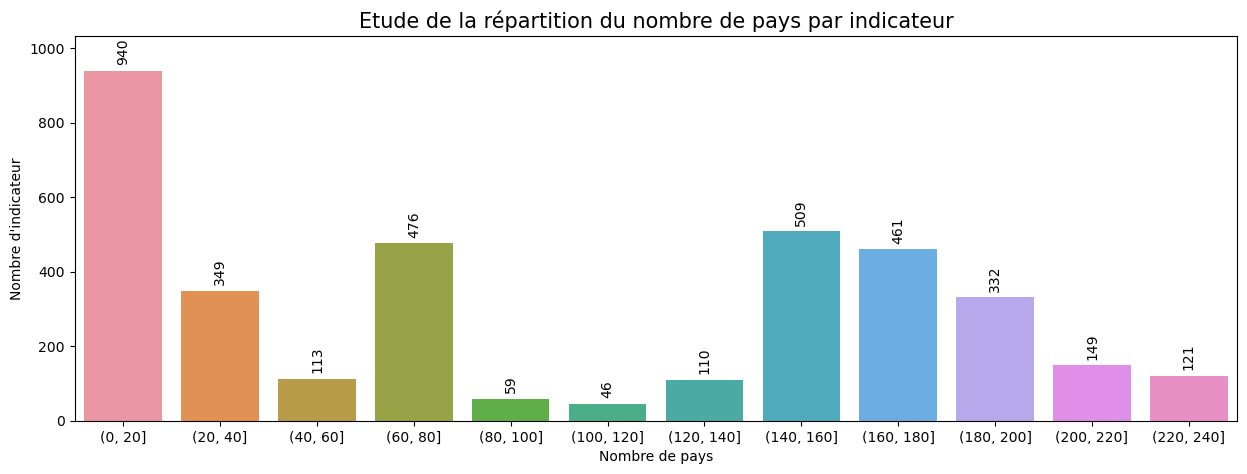

In [53]:
NbIndicateurFreq = FreqIndicateur.groupby('Indicator Code').count().reset_index()
NbIndicateurFreq['freq_cat'] = pd.cut(NbIndicateurFreq['Indicator Code'], bins=[x for x in range(0,250, 20)])
NbIndicateurFreq = NbIndicateurFreq.groupby('freq_cat').sum()

ax = plt.figure(figsize=(15,5))
ax = sns.barplot(NbIndicateurFreq, x= NbIndicateurFreq.index, y= 'index')
plt.xlabel('Nombre de pays')
plt.ylabel("Nombre d'indicateur")
plt.title("Etude de la répartition du nombre de pays par indicateur", size = 15)
ax.bar_label(ax.containers[0], padding=4, rotation=90)
ax.margins(y=0.1)
plt.show()

- **Il n'y a 121 indicateurs avec plus de 220 pays.**
- **Et 270 indicateurs avec plus de 200 pays.**

In [54]:
# les codes avec une Periodicité annuelle de la DF Stats Series sont ils dans les indicateurs avec plus de 200 pays:
CodesSeries = list(DFseries['Series Code'])
CodesData = list(FreqIndicateur[FreqIndicateur['Indicator Code'] >= 200]['index'])
Indicateurs = []
for code in CodesSeries:
    if code not in CodesData:
        Indicateurs.append(code)
print(Indicateurs)

['SH.DYN.AIDS.ZS', 'SL.TLF.ADVN.FE.ZS', 'SL.TLF.ADVN.MA.ZS', 'SL.TLF.ADVN.ZS', 'SL.TLF.BASC.FE.ZS', 'SL.TLF.BASC.MA.ZS', 'SL.TLF.BASC.ZS', 'SL.TLF.INTM.FE.ZS', 'SL.TLF.INTM.MA.ZS', 'SL.TLF.INTM.ZS', 'SL.UEM.NEET.FE.ZS', 'SL.UEM.NEET.MA.ZS', 'SL.UEM.NEET.ZS', 'SP.POP.AG00.TO.UN', 'SP.POP.AG01.TO.UN', 'SP.POP.AG02.TO.UN', 'SP.POP.AG03.TO.UN', 'SP.POP.AG04.TO.UN', 'SP.POP.AG05.TO.UN', 'SP.POP.AG06.TO.UN', 'SP.POP.AG07.TO.UN', 'SP.POP.AG08.TO.UN', 'SP.POP.AG09.TO.UN', 'SP.POP.AG10.TO.UN', 'SP.POP.AG11.TO.UN', 'SP.POP.AG12.TO.UN', 'SP.POP.AG13.TO.UN', 'SP.POP.AG14.TO.UN', 'SP.POP.AG15.TO.UN', 'SP.POP.AG16.TO.UN', 'SP.POP.AG17.TO.UN', 'SP.POP.AG18.TO.UN', 'SP.POP.AG19.TO.UN', 'SP.POP.AG20.TO.UN', 'SP.POP.AG21.TO.UN', 'SP.POP.AG22.TO.UN', 'SP.POP.AG23.TO.UN', 'SP.POP.AG24.TO.UN', 'SP.POP.AG25.TO.UN']


- **Plusieurs indicateurs annuels ne sont pas dans les indicateurs avec plus de 200 pays.**

In [55]:
Indic = Data[Data['Indicator Code'].isin(CodesSeries)][['Indicator Name', 'Country Code']]
AnaIndic = pd.merge(Indic, DFCountry)
AnaIndic = AnaIndic[['Indicator Name', 'Country Code', 'Income Group']]
AnaIndic = AnaIndic.pivot_table(index = 'Indicator Name', columns = 'Income Group', aggfunc = 'count')
AnaIndic['Total'] = AnaIndic.sum(axis = 1)
AnaIndic = AnaIndic.sort_values('Total', ascending = False)


for value in list(DFCountry['Income Group'].unique()):
    Taille = len(DFCountry[DFCountry['Income Group'] == value])
    AnaIndic[('Country Code', value)] = round(AnaIndic[('Country Code', value)]/Taille*100)
    
AnaIndic['Total'] = round(AnaIndic['Total']/ len(DFCountry)*100)
TotalIncome = round(AnaIndic.mean()).to_frame().T
TotalIncome.rename(index = {0: 'TotalIncome'}, inplace = True)
pd.concat([AnaIndic, TotalIncome])

Country Code  \
Income Group                                                                                    High income: OECD   
Population, total                                                                                           100.0   
Population growth (annual %)                                                                                100.0   
GDP per capita (current US$)                                                                                100.0   
GDP at market prices (current US$)                                                                          100.0   
Internet users (per 100 people)                                                                             100.0   
GNI (current US$)                                                                                           100.0   
GDP at market prices (constant 2005 US$)                                                                    100.0   
GDP per capita (constant 2005 US$)                                                                          100.0   
GNI per capita, Atlas method (current US$)                                                                  100.0   
Population, ages 0-14 (% of total)                                                                          100.0   
Population, ages 0-14, total                                                                                100.0   
Population, ages 15-64 (% of total)                                                                         100.0   
Population, ages 15-64, total                                                                               100.0   
Population, age 22, total                                                                                   100.0   
Population, age 16, total                                                                                   100.0   
Population, age 17, total                                                                                   100.0   
Population, age 18, total                                                                                   100.0   
Population, age 19, total                                                                                   100.0   
Population, age 2, total                                                                                    100.0   
Population, age 20, total                                                                                   100.0   
Population, age 21, total                                                                                   100.0   
Population, age 5, total                                                                                    100.0   
Population, age 23, total                                                                                   100.0   
Population, age 24, total                                                                                   100.0   
Population, age 25, total                                                                                   100.0   
Population, age 3, total                                                                                    100.0   
Population, age 4, total                                                                                    100.0   
Population, age 6, total                                                                                    100.0   
Population, age 7, total                                                                                    100.0   
Population, age 8, total                                                                                    100.0   
Population, age 9, total                                                                                    100.0   
Population, age 15, total                                                                                   100.0   
Population, age 14, total                                                                                   100.0   
Popula

- **Les indicateurs avec le maximum de PAYS sont la population totale et l'évolution de cette population.**
- **Beaucoup d'indicateur au dessus de 180pays.**
- **Les pays les mieux renseignés son les pays de la zone riche OECD et la moins bien remplie est la zone riche non OECD.**
- **Si on reste uniquement sur les pays de l'OECD on peut analyser tous ces indicateurs sinon il faudra garder les indicateurs avec plus de 180 pays.**

In [56]:
# Liste des indicateurs avec plus de 180 pays:
Indic = Data[Data['Indicator Code'].isin(CodesSeries)][['Indicator Name', 'Country Code']]
AnaIndic = pd.merge(Indic, DFCountry)
AnaIndic = AnaIndic[['Indicator Name', 'Country Code', 'Income Group']]
AnaIndic = AnaIndic.groupby('Indicator Name').count()['Country Code'].to_frame()
Listindic = list(AnaIndic[AnaIndic['Country Code']>=180].index)

In [57]:
# Choix manuel des indicateurs utiles pour l'entreprise dans les indicateurs restant:
Listindic = ['GDP per capita (current US$)',
 'Internet users (per 100 people)',
 'Labor force, total',
 'Personal computers (per 100 people)',
 'Population growth (annual %)',
 'Population, age 12, total',
 'Population, age 13, total',
 'Population, age 14, total',
 'Population, age 15, total',
 'Population, age 16, total',
 'Population, age 17, total',
 'Population, age 18, total',
 'Population, age 19, total',
 'Population, age 20, total',
 'Population, age 21, total',
 'Population, age 22, total',
 'Population, age 23, total',
 'Population, age 24, total',
 'Population, age 25, total',
 'Population, ages 0-14, total',
 'Population, ages 15-64, total',
 'Population, total',
 'Unemployment, total (% of total labor force)']

- **Ces indicateurs sont intéressants mais ne nous donne pas le % de personne réellement scolarisé.** 
- **Il faut ajouter quelques autres indicateurs non annuels.**

In [58]:
# Recherche de nouveaux indicateurs depuis la DF Stats Series en 2.4:
AutresIndicateurs = StatsSeries[~StatsSeries['Indicator Name'].str.contains('male|female|Male|Female')]
AutresIndicateurs = AutresIndicateurs[~AutresIndicateurs['Long definition'].str.contains('male|female|Male|Female')]

In [59]:
# Taille de cette DF:
len(AutresIndicateurs)

2099

- **Il reste 2099 indicateurs si on enléve les spécifiques hommes ou femmes.**

In [60]:
# Recherche dans les 600 indicateurs ayant plus de 180 pays :
Indic180 = list(FreqIndicateur[FreqIndicateur['Indicator Code'] >= 180]['index'])
AutresIndicateurs = AutresIndicateurs[AutresIndicateurs['Series Code'].isin(Indic180)]
len(AutresIndicateurs)

227

- **Il ne reste que 227 indicateurs si on enléve les hommes et les femmes.**

In [61]:
IndicName = ['Enrolment in lower secondary education, both sexes (number)', 'Enrolment in upper secondary education, both sexes (number)', 'Enrolment in tertiary education, all programmes, both sexes (number)']

- **Ces 3 indicateurs peuvent permettre de nous donner le nombre d'enfants qui hors milieu scolaire.**

In [62]:
# Indicateurs gardés :
Indicateurs = Listindic + IndicName

### 2.6 : Infos générales pour la soutenance

In [63]:
Fichiers = [Data, Country, CountrySeries, StatsFootNote, StatsSeries]
NomsFichiers = ['Data', 'Country', 'CountrySeries', 'StatsFootNote', 'StatsSeries']
NbLignes = []
NbColonnes = []
NBDuplicatas = []
NbNaNs = []
NbNotNaNs = []
PourcentNaNs = []
NbPays = []
NbIndicateurs = []

dictinfos = {}


for fichier in Fichiers:
    NbLignes.append(fichier.shape[0])
    NbColonnes.append(fichier.shape[1])
    NBDuplicatas.append(fichier.duplicated().sum())
    NbNaNs.append(fichier.isna().sum().sum())
    NbNotNaNs.append(fichier.notna().sum().sum())
    PourcentNaNs.append(round(fichier.isna().sum().sum()*100/(fichier.shape[0]*fichier.shape[1])))
    
    try:
        NbPays.append(fichier['Country Code'].nunique())
    except:
        try: 
            NbPays.append(fichier['CountryCode'].nunique())
        except:
            NbPays.append(0)
            
    
    try:
        NbIndicateurs.append(fichier['Indicator Code'].nunique())
    except:
        try:
            NbIndicateurs.append(fichier['SeriesCode'].nunique())
        except:
            try:
                NbIndicateurs.append(fichier['Series Code'].nunique())
            except:
                NbIndicateurs.append(0)
    
InfosGenerales = []
for i in range (len(NomsFichiers)):
    InfosGenerales_info = {}
    InfosGenerales_info['NomFichier'] = NomsFichiers[i]
    InfosGenerales_info['Nblignes'] = NbLignes[i]
    InfosGenerales_info['NbColonnes'] = NbColonnes[i]
    InfosGenerales_info['NbDuplicatas'] = NBDuplicatas[i]
    InfosGenerales_info['NbNaNs'] = NbNaNs[i]
    InfosGenerales_info['NbNonNaNs'] = NbNotNaNs[i]
    InfosGenerales_info['PourcentageNaNs'] = PourcentNaNs[i]
    InfosGenerales_info['NbPays/Zones'] = NbPays[i]
    InfosGenerales_info['NbIndicateurs'] = NbIndicateurs[i]
    
    InfosGenerales.append(InfosGenerales_info)

df = pd.DataFrame(InfosGenerales)
df.set_index('NomFichier')

Nblignes  NbColonnes  NbDuplicatas    NbNaNs  NbNonNaNs  \
NomFichier                                                               
Data             357405          69             0  18149124    6511821   
Country             241          32             0      2354       5358   
CountrySeries       613           4             0       613       1839   
StatsFootNote    643638           5             0    643638    2574552   
StatsSeries        3665          21             0     55203      21762   

               PourcentageNaNs  NbPays/Zones  NbIndicateurs  
NomFichier                                                   
Data                        74           242           3665  
Country                     31           241              0  
CountrySeries               25           211             21  
StatsFootNote               20           239           1558  
StatsSeries                 72             0           3665

# 3 : Analyses des données:

### 3.1 : Création d'une seule DF à partir des 3 DF principales:

In [64]:
# Suppression des annees avant 2000 car trop vieux et aprés 2020 car ce sont des extrapolations:
Data = Data.loc[:,:'2020']
print(Data.shape)

# Merge avec la DF restreinte des pays:
DataFinal = Data.merge(DFCountry, how = 'inner')
print(DataFinal.shape)

# Merge avec la DF des indicateurs:
StatsSeries = StatsSeries[['Series Code','Long definition','Topic']]
DataFinal = DataFinal.merge(StatsSeries, how = 'right', left_on = 'Indicator Code', right_on = 'Series Code')
print(DataFinal.shape)

# Réorganisation des colonnes:
DataFinal = DataFinal[['Country Name', 'Country Code', 'Region', 'Income Group', 'Indicator Name', 'Indicator Code','Long definition', 'Topic'
       , '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020']]

# Slice sur les indicateurs intéressants:
DataFinal = DataFinal[DataFinal['Indicator Name'].isin(Indicateurs)]

# DF Finale:
DataFinal.head(3)

(357405, 53)
(347348, 56)
(338583, 59)


Country Name Country Code                      Region  \
63838  Afghanistan          AFG                  South Asia   
63839      Albania          ALB       Europe & Central Asia   
63840      Algeria          DZA  Middle East & North Africa   

              Income Group                       Indicator Name  \
63838           Low income  Personal computers (per 100 people)   
63839  Upper middle income  Personal computers (per 100 people)   
63840  Upper middle income  Personal computers (per 100 people)   

       Indicator Code  \
63838  IT.CMP.PCMP.P2   
63839  IT.CMP.PCMP.P2   
63840  IT.CMP.PCMP.P2   

                                                                                   Long definition  \
63838  Personal computers are self-contained computers designed to be used by a single individual.   
63839  Personal computers are self-contained computers designed to be used by a single individual.   
63840  Personal computers are self-contained computers designed to be used by a single individual.   

                                Topic      2000      2001  ...  2009  2010  \
63838  Infrastructure: Communications       NaN       NaN  ...   NaN   NaN   
63839  Infrastructure: Communications  0.756442  0.912941  ...   NaN   NaN   
63840  Infrastructure: Communications  0.630528  0.684288  ...   NaN   NaN   

       2011  2012  2013  2014  2015  2016  2017  2020  
63838   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
63839   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
63840   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[3 rows x 27 columns]

### 3.2 : Analyse de cette DF:

### 3.2.1 : Etude Generale:

In [65]:
# Taux de remplissage de cette DF:
print(round(DataFinal.notna().sum(axis = 0)/len(DataFinal)*100))

# Les colonnes 2017 et 2020 sont vides:
DataFinal = DataFinal.dropna(axis = 1, how='all')

Country Name       100.0
Country Code       100.0
Region             100.0
Income Group       100.0
Indicator Name     100.0
Indicator Code     100.0
Long definition    100.0
Topic              100.0
2000                95.0
2001                96.0
2002                96.0
2003                96.0
2004                96.0
2005                96.0
2006                93.0
2007                91.0
2008                91.0
2009                90.0
2010                90.0
2011                90.0
2012                90.0
2013                89.0
2014                38.0
2015                83.0
2016                31.0
2017                 0.0
2020                 0.0
dtype: float64


- **Même sur une DF restreinte en terme de nombre d'indicateur mais pas en terme de pays on remarque que les colonnes 2014/2016/2017/2020 sont vides ou presque vides.**
- **L'année la plus récente la mieux remplie est l'année 2015.**

In [66]:
# Etude des Incomes:
AnalyseIncome = round(DataFinal.set_index('Income Group').select_dtypes(exclude='object').isna().reset_index().groupby('Income Group').sum()/(DataFinal.set_index('Income Group').select_dtypes(exclude='object').isna().reset_index().groupby('Income Group').count())*100)
AnalyseIncome['TotalIncome'] = round(AnalyseIncome.sum(axis = 1)/AnalyseIncome.shape[1])
Total = round((AnalyseIncome.sum()/AnalyseIncome.shape[0])).to_frame().rename(columns={0:"TotalAnnée"}).T
pd.concat([AnalyseIncome, Total])

2000  2001  2002  2003  2004  2005  2006  2007  2008  \
High income: OECD      0.0   1.0   1.0   1.0   1.0   1.0   1.0   3.0   4.0   
High income: nonOECD  10.0   9.0   7.0   6.0   8.0   8.0  13.0  19.0  18.0   
Low income             5.0   4.0   5.0   5.0   4.0   5.0   7.0   7.0   8.0   
Lower middle income    5.0   3.0   3.0   3.0   3.0   3.0   6.0   7.0   7.0   
Upper middle income    5.0   4.0   3.0   4.0   3.0   4.0   8.0  10.0  11.0   
TotalAnnée             5.0   4.0   4.0   4.0   4.0   4.0   7.0   9.0  10.0   

                      2009  2010  2011  2012  2013  2014  2015  2016  \
High income: OECD      5.0   4.0   4.0   4.0   5.0  61.0  13.0  69.0   
High income: nonOECD  19.0  20.0  19.0  20.0  20.0  59.0  27.0  68.0   
Low income             7.0   8.0   7.0   8.0  10.0  64.0  14.0  70.0   
Lower middle income    8.0   8.0   8.0   8.0   8.0  63.0  14.0  69.0   
Upper middle income   12.0  12.0  11.0  12.0  12.0  62.0  18.0  69.0   
TotalAnnée            10.0  10.0  10.0  10.0  11.0  62.0  17.0  69.0   

                      TotalIncome  
High income: OECD            10.0  
High income: nonOECD         21.0  
Low income                   14.0  
Lower middle income          13.0  
Upper middle income          15.0  
TotalAnnée                   15.0

- **On confirme que les années les moins bien remplies sont 2014 et 2016.**
- **Les Incomes les moins complets sont les High Incomes Non OECD.**

In [67]:
# Etude du remplissage des indicateurs par Income:
round(DataFinal.set_index(['Income Group','Indicator Name']).select_dtypes(exclude='object').isna().reset_index().groupby(['Income Group','Indicator Name']).sum()/DataFinal.set_index(['Income Group','Indicator Name']).select_dtypes(exclude='object').isna().reset_index().groupby(['Income Group','Indicator Name']).count()*100)

2000  \
Income Group         Indicator Name                                                               
High income: OECD    Enrolment in lower secondary education, both sexes (number)            0.0   
                     Enrolment in tertiary education, all programmes, both sexes (number)   3.0   
                     Enrolment in upper secondary education, both sexes (number)            0.0   
                     GDP per capita (current US$)                                           0.0   
                     Internet users (per 100 people)                                        0.0   
                     Labor force, total                                                     0.0   
                     Personal computers (per 100 people)                                    0.0   
                     Population growth (annual %)                                           0.0   
                     Population, age 12, total                                              0.0   
                     Population, age 13, total                                              0.0   
                     Population, age 14, total                                              0.0   
                     Population, age 15, total                                              0.0   
                     Population, age 16, total                                              0.0   
                     Population, age 17, total                                              0.0   
                     Population, age 18, total                                              0.0   
                     Population, age 19, total                                              0.0   
                     Population, age 20, total                                              0.0   
                     Population, age 21, total                                              0.0   
                     Population, age 22, total                                              0.0   
                     Population, age 23, total                                              0.0   
                     Population, age 24, total                                              0.0   
                     Population, age 25, total                                              0.0   
                     Population, ages 0-14, total                                           0.0   
                     Population, ages 15-64, total                                          0.0   
                     Population, total                                                      0.0   
                     Unemployment, total (% of total labor force)                           0.0   
High income: nonOECD Enrolment in lower secondary education, both sexes (number)           26.0   
                     Enrolment in tertiary education, all programmes, both sexes (number)  57.0   
                     Enrolment in upper secondary education, both sexes (number)           35.0   
                     GDP per capita (current US$)                                          10.0   
                     Internet users (per 100 people)                                        8.0   
                     Labor force, total                                                     0.0   
                     Personal computers (per 100 people)                                   25.0   
                     Population growth (annual %)                                           0.0   
                     Population, age 12, total                                              7.0   
                     Population, age 13, total                                              7.0   
                     Population, age 14, total                                              7.0   
                     Population, age 15, total                                              7.0   
                     Population, age 16, total                                              7.0   
                     Population,

- **On remarque que l'indicateur Personal computers(per 100 people) est quasiment vide a partir de 2006 et ce pour tous les Incomes.**
- **2006 étant une date lointaine il est préférable d'utiliser l'internet users comme indicateur (sachant qu'il existe des cybers cafés pour étudier en ligne.**

In [68]:
# Suppression de cette indicateur:
DataFinal = DataFinal[DataFinal['Indicator Name'] != 'Personal computers (per 100 people)']

In [69]:
#Etude des Zones:
AnalyseRegion = round(DataFinal.set_index('Region').select_dtypes(exclude='object').isna().reset_index().groupby('Region').sum()/(DataFinal.set_index('Region').select_dtypes(exclude='object').isna().reset_index().groupby('Region').count())*100)
AnalyseRegion['TotalRegion'] = round(AnalyseRegion.sum(axis = 1)/AnalyseRegion.shape[1])
Total = round((AnalyseRegion.sum()/AnalyseRegion.shape[0])).to_frame().rename(columns={0:"TotalAnnée"}).T
pd.concat([AnalyseRegion, Total])

2000  2001  2002  2003  2004  2005  2006  2007  \
East Asia & Pacific          5.0   5.0   4.0   5.0   5.0   5.0   5.0  10.0   
Europe & Central Asia        3.0   3.0   2.0   2.0   2.0   2.0   2.0   3.0   
Latin America & Caribbean    6.0   6.0   4.0   6.0   4.0   4.0   9.0  10.0   
Middle East & North Africa   3.0   3.0   2.0   1.0   2.0   1.0   2.0   2.0   
North America                4.0   6.0   6.0   6.0   4.0   3.0  21.0  24.0   
South Asia                   7.0   4.0   5.0   2.0   3.0   2.0   2.0   2.0   
Sub-Saharan Africa           5.0   4.0   4.0   5.0   4.0   4.0   6.0   6.0   
TotalAnnée                   5.0   4.0   4.0   4.0   3.0   3.0   7.0   8.0   

                            2008  2009  2010  2011  2012  2013  2014  2015  \
East Asia & Pacific         10.0  10.0  11.0  11.0  11.0  11.0  60.0  16.0   
Europe & Central Asia        3.0   4.0   3.0   3.0   3.0   4.0  56.0  11.0   
Latin America & Caribbean   10.0  10.0  10.0  11.0  11.0  11.0  62.0  18.0   
Middle East & North Africa   3.0   3.0   3.0   2.0   4.0   3.0  61.0   9.0   
North America               24.0  24.0  21.0  21.0  21.0  21.0  65.0  31.0   
South Asia                   2.0   2.0   2.0   1.0   2.0   2.0  60.0   9.0   
Sub-Saharan Africa           6.0   6.0   7.0   5.0   6.0   7.0  63.0  12.0   
TotalAnnée                   8.0   8.0   8.0   8.0   8.0   8.0  61.0  15.0   

                            2016  TotalRegion  
East Asia & Pacific         67.0         15.0  
Europe & Central Asia       67.0         10.0  
Latin America & Caribbean   69.0         15.0  
Middle East & North Africa  69.0         10.0  
North America               73.0         22.0  
South Asia                  68.0         10.0  
Sub-Saharan Africa          68.0         13.0  
TotalAnnée                  69.0         14.0

- **La zone avec le moins d'information est l'Amérique du Nord qui est un High Income: OECD, et les années les moins bien remplies sont toujours 2014 et 2016.**

In [70]:
# Remplissage des colonnes vers la droite: (Me semble peu précis mais permet de récupérer des pays en plus pour l'analyse.)
# Récupération des valeurs sur trois ans:
DataFinal.iloc[:,8:] = DataFinal.iloc[:,8:].fillna(method="ffill", axis = 1, limit=3)

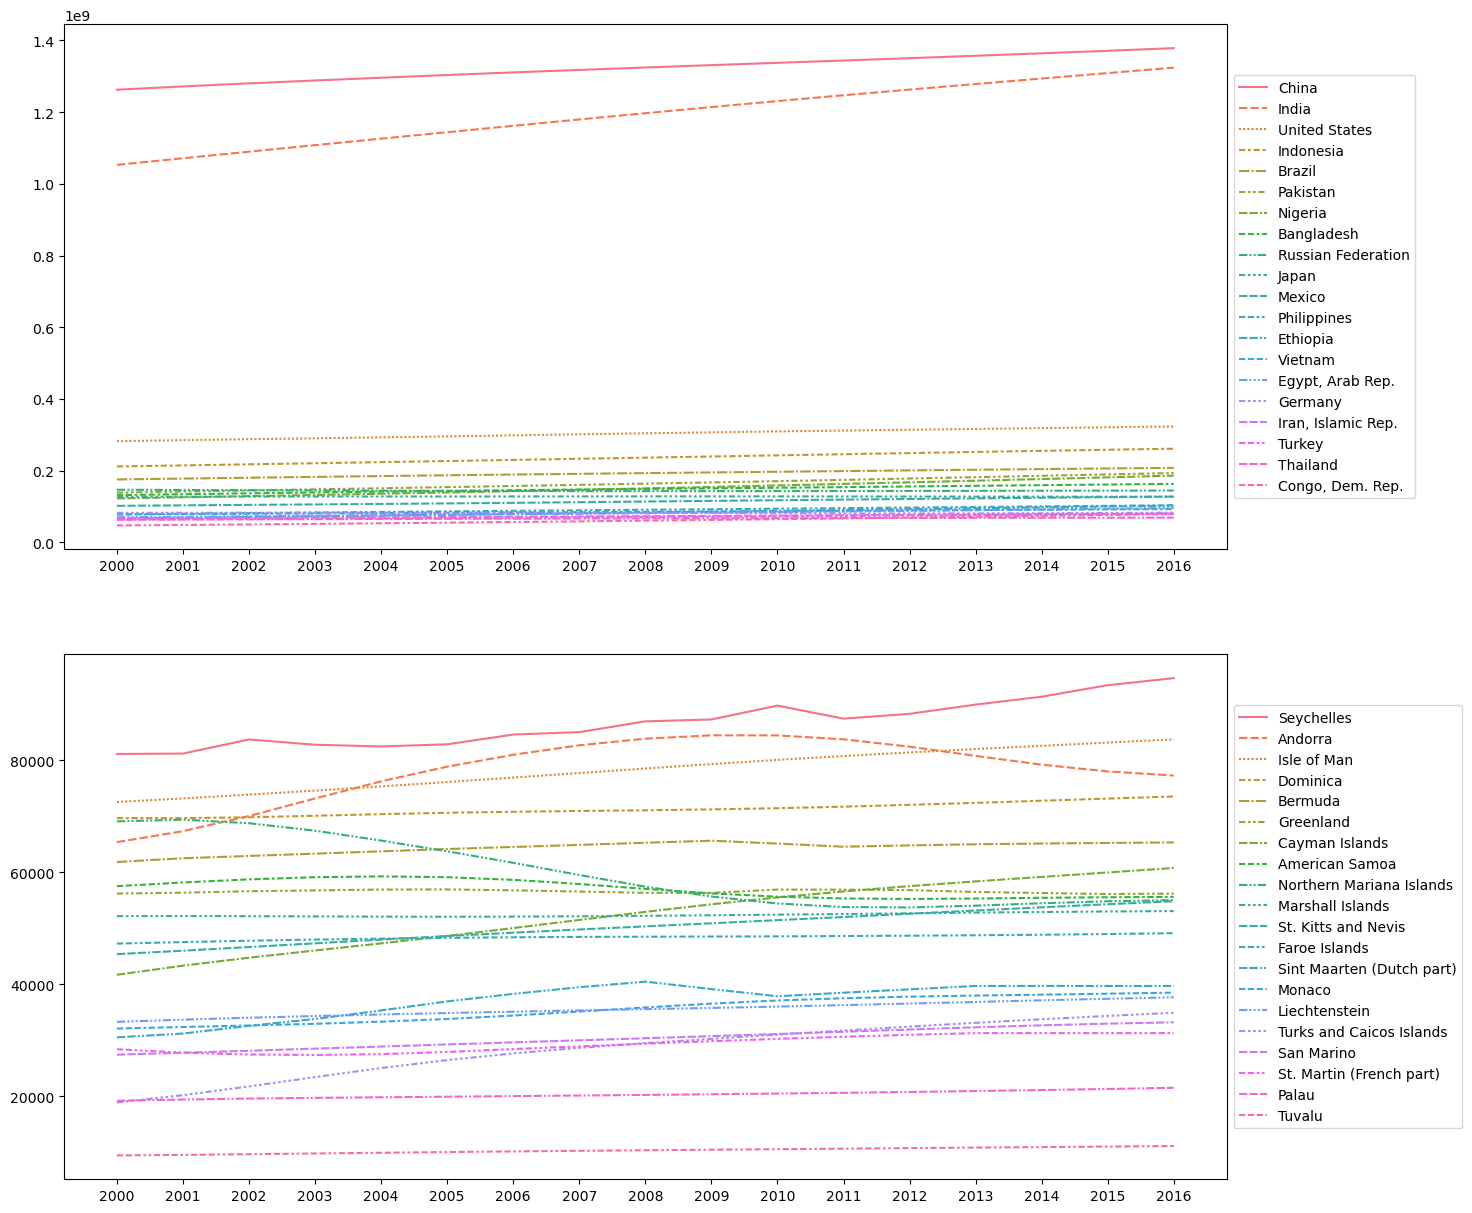

In [71]:
# Etude de l'évolution de la population pour le Top10 et le Flop10 en terme de population total:
EtudePopTot = DataFinal[DataFinal['Indicator Name'] == 'Population, total'].set_index('Country Name').select_dtypes(exclude= 'object')
EtudePopTot = EtudePopTot.sort_values('2011', ascending = False)
EtudePopMax = EtudePopTot.iloc[:20,:].T
EtudePopMin = EtudePopTot.iloc[-20:,:].T

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (15,15))

ax1 = plt.subplot(211)
ax1 = sns.lineplot(EtudePopMax)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = plt.subplot(212)
ax2 = sns.lineplot(EtudePopMin)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

- **Peu facile à analyser, vu comme ça hormis l'andore tous les pays ont une population qui augmentée en 2016.**

#### 3.2.2 : Etude des indicateurs gardés:

In [72]:
# Agrégation des indicateurs d'ages pour créer des catégories Collége/lycée/EtudeSup:

College = ['SP.POP.AG12.TO.UN', 'SP.POP.AG13.TO.UN', 'SP.POP.AG14.TO.UN', 'SP.POP.AG15.TO.UN']
Lycee = ['SP.POP.AG16.TO.UN', 'SP.POP.AG17.TO.UN', 'SP.POP.AG18.TO.UN']
Fac = ['SP.POP.AG19.TO.UN', 'SP.POP.AG20.TO.UN', 'SP.POP.AG21.TO.UN', 'SP.POP.AG22.TO.UN', 'SP.POP.AG23.TO.UN', 'SP.POP.AG24.TO.UN', 'SP.POP.AG25.TO.UN']
Etudes = College + Lycee + Fac


CoutryCodes = list(DataFinal[DataFinal['Indicator Code'].isin(Etudes)]['Country Code'].unique())


for CountryCode in CoutryCodes:
    Pays = DataFinal[DataFinal['Country Code'] == CountryCode]
    
    # Collégiens : 
    Collegien = Pays[Pays['Indicator Code'].isin(College)]
    Collegiens = Collegien.select_dtypes(exclude = 'object').sum().to_frame().rename(columns = {0:'Collegiens'}).T
    Collegiens = pd.concat([Collegien, Collegiens])
    Collegiens['Indicator Code'] = Collegiens['Indicator Code'].fillna('AgregaCollegien')
    Collegiens['Indicator Name'] = Collegiens['Indicator Name'].fillna('Collegiens')
    Collegiens['Long definition'] = Collegiens['Long definition'].fillna('Populations ages 12 à 15ans')
    Collegiens = Collegiens.fillna(method="ffill", axis = 0).iloc[-1:,:]
    Collegiens = Collegiens.replace(0, np.nan)
    DataFinal = pd.concat([Collegiens,DataFinal])
    
    # Lycéens :
    Lyceen = Pays[Pays['Indicator Code'].isin(Lycee)]
    Lyceens = Lyceen.select_dtypes(exclude = 'object').sum().to_frame().rename(columns = {0:'Lyceens'}).T
    Lyceens = pd.concat([Lyceen, Lyceens])
    Lyceens['Indicator Code'] = Lyceens['Indicator Code'].fillna('AgregaLyceen')
    Lyceens['Indicator Name'] = Lyceens['Indicator Name'].fillna('Lyceens')
    Lyceens['Long definition'] = Lyceens['Long definition'].fillna('Populations ages 16 à 18ans')
    Lyceens = Lyceens.fillna(method="ffill", axis = 0).iloc[-1:,:]
    Lyceens = Lyceens.replace(0, np.nan)
    DataFinal = pd.concat([Lyceens,DataFinal])
    
    # Etudes Supérieurs :
    EtudeSup = Pays[Pays['Indicator Code'].isin(Fac)]
    EtudeSups = EtudeSup.select_dtypes(exclude = 'object').sum().to_frame().rename(columns = {0:'Etudiants'}).T
    EtudeSups = pd.concat([EtudeSup, EtudeSups])
    EtudeSups['Indicator Code'] = EtudeSups['Indicator Code'].fillna('AgregaEtudiants')
    EtudeSups['Indicator Name'] = EtudeSups['Indicator Name'].fillna('Etudiants')
    EtudeSups['Long definition'] = EtudeSups['Long definition'].fillna('Populations ages 19 à 25ans')
    EtudeSups = EtudeSups.fillna(method="ffill", axis = 0).iloc[-1:,:]
    EtudeSups = EtudeSups.replace(0, np.nan)
    DataFinal = pd.concat([EtudeSups,DataFinal]) 

In [73]:
# Suppression des indicateurs ayant servi pour la création des collégiens/lycéens/etudes sup, + réordonner les lignes et reset des indexs: 
DataFinal = DataFinal[~DataFinal['Indicator Code'].isin(Etudes)].sort_values('Country Name').reset_index(drop = True)

In [74]:
# Choix d'une année à étudier:
round(DataFinal.notna().sum()/len(DataFinal)*100)

Country Name       100.0
Country Code       100.0
Region             100.0
Income Group       100.0
Indicator Name     100.0
Indicator Code     100.0
Long definition    100.0
Topic              100.0
2000                93.0
2001                95.0
2002                96.0
2003                97.0
2004                97.0
2005                97.0
2006                96.0
2007                97.0
2008                97.0
2009                96.0
2010                96.0
2011                96.0
2012                96.0
2013                96.0
2014                96.0
2015                95.0
2016                93.0
dtype: float64

- **L'année la plus résente qui nous intéresse est l'année 2015 car c'est la mieux remplie.**

In [75]:
# Pivot du tableau sur l'année 2015 (année la plus récente la mieux remplie):
DataPivot2015 = pd.pivot_table(DataFinal, index = ('Country Name','Region', 'Income Group'), columns = 'Indicator Name', values = '2015')
DataPivot2015.reset_index(inplace = True)

# Création d'une colonne Nb d'utilisateur d'internet:
DataPivot2015['NbUtilisateurInternet'] = DataPivot2015['Internet users (per 100 people)']/100*DataPivot2015['Population, total']

# Réordonner les colonnes pour plus de lisibilité:
DataPivot2015 = DataPivot2015[['Country Name', 'Region', 'Income Group', 
       'GDP per capita (current US$)', 'Internet users (per 100 people)','NbUtilisateurInternet',
       'Population, total','Collegiens', 'Etudiants','Lyceens','Population, ages 0-14, total', 'Population, ages 15-64, total', 'Labor force, total' , 'Population growth (annual %)', 'Unemployment, total (% of total labor force)', 'Enrolment in lower secondary education, both sexes (number)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in upper secondary education, both sexes (number)']]

# Création d'indicateurs par calculs:
DataPivot2015['OutOfCollege'] = DataPivot2015['Collegiens'] - DataPivot2015['Enrolment in lower secondary education, both sexes (number)']
DataPivot2015['OutOfLycee'] = DataPivot2015['Lyceens'] - DataPivot2015['Enrolment in upper secondary education, both sexes (number)']
DataPivot2015['OutOfFac'] = DataPivot2015['Etudiants'] - DataPivot2015['Enrolment in tertiary education, all programmes, both sexes (number)']
DataPivot2015['OutOfLycee'][DataPivot2015['OutOfLycee'] < 0] = 0
DataPivot2015['OutOfCollege'][DataPivot2015['OutOfCollege'] < 0] = 0


# Suppression des colonnes inutiles:
DataPivot2015 = DataPivot2015.drop(columns = ['Enrolment in lower secondary education, both sexes (number)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in upper secondary education, both sexes (number)'])

DataPivot2015.head(3)

Indicator Name Country Name                      Region         Income Group  \
0               Afghanistan                  South Asia           Low income   
1                   Albania       Europe & Central Asia  Upper middle income   
2                   Algeria  Middle East & North Africa  Upper middle income   

Indicator Name  GDP per capita (current US$)  Internet users (per 100 people)  \
0                                 569.577923                         8.260000   
1                                3934.895394                        63.252933   
2                                4160.220067                        38.200000   

Indicator Name  NbUtilisateurInternet  Population, total  Collegiens  \
0                        2.786634e+06         33736494.0   3479614.0   
1                        1.822129e+06          2880703.0    199646.0   
2                        1.523092e+07         39871528.0   2428113.0   

Indicator Name  Etudiants    Lyceens  Population, ages 0-14, total  \
0               4623911.0  2376886.0                    15023530.0   
1                409241.0   156829.0                      519301.0   
2               4865649.0  1742578.0                    11424395.0   

Indicator Name  Population, ages 15-64, total  Labor force, total  \
0                                  17871866.0          10087656.0   
1                                   2000257.0           1333025.0   
2                                  26106760.0          11798754.0   

Indicator Name  Population growth (annual %)  \
0                                   2.943234   
1                                  -0.291206   
2                                   1.919959   

Indicator Name  Unemployment, total (% of total labor force)  OutOfCollege  \
0                                                        8.6     1845649.0   
1                                                       17.1       18292.0   
2                                                       11.2           NaN   

Indicator Name  OutOfLycee   OutOfFac  
0                1408117.0  4361037.0  
1                   4892.0   248714.0  
2                      NaN  3576175.0

In [76]:
# Analyse général de ce DF pivotée:
DataPivot2015 = round(DataPivot2015,2)
DataPivot2015.describe()

Indicator Name  GDP per capita (current US$)  Internet users (per 100 people)  \
count                             200.000000                       202.000000   
mean                            15189.337600                        48.543861   
std                             22232.845881                        28.676716   
min                               300.680000                         0.000000   
25%                              1907.072500                        21.700000   
50%                              5794.170000                        50.220000   
75%                             17197.350000                        73.050000   
max                            168146.020000                        98.320000   

Indicator Name  NbUtilisateurInternet  Population, total    Collegiens  \
count                    2.010000e+02       2.130000e+02  1.810000e+02   
mean                     1.559366e+07       3.439551e+07  2.672335e+06   
std                      5.860832e+07       1.344902e+08  9.324989e+06   
min                      0.000000e+00       1.100100e+04  5.900000e+03   
25%                      3.791633e+05       8.921490e+05  1.799930e+05   
50%                      2.474964e+06       6.312478e+06  5.624070e+05   
75%                      7.901124e+06       2.310847e+07  2.075336e+06   
max                      6.897237e+08       1.371220e+09  9.893076e+07   

Indicator Name     Etudiants       Lyceens  Population, ages 0-14, total  \
count           1.810000e+02  1.810000e+02                  1.930000e+02   
mean            4.664172e+06  1.992805e+06                  9.944388e+06   
std             1.699268e+07  7.167636e+06                  3.378268e+07   
min             9.895000e+03  4.409000e+03                  1.951500e+04   
25%             3.454070e+05  1.387350e+05                  5.119270e+05   
50%             8.938550e+05  4.102400e+05                  1.866853e+06   
75%             3.386991e+06  1.574140e+06                  8.253725e+06   
max             1.688556e+08  7.379198e+07                  3.751449e+08   

Indicator Name  Population, ages 15-64, total  Labor force, total  \
count                            1.930000e+02        1.850000e+02   
mean                             2.486150e+07        1.811854e+07   
std                              9.731270e+07        7.056168e+07   
min                              6.107600e+04        3.888700e+04   
25%                              1.302780e+06        1.178300e+06   
50%                              5.377243e+06        4.061011e+06   
75%                              1.574562e+07        1.212515e+07   
max                              9.960304e+08        7.871098e+08   

Indicator Name  Population growth (annual %)  \
count                             213.000000   
mean                                1.320423   
std                                 1.234662   
min                                -2.470000   
25%                                 0.500000   
50%                                 1.170000   
75%                                 2.200000   
max                                 5.860000   

Indicator Name  Unemployment, total (% of total labor force)  OutOfCollege  \
count                                             186.000000  1.610000e+02   
mean                                                8.833871  9.297467e+05   
std                                                 6.419614  3.511800e+06   
min                                                 0.100000  0.000000e+00   
25%                                                 4.625000  3.732000e+03   
50%                                                 6.850000  6.546200e+04   
75%                                                11.350000  5.154660e+05   
max                                                31.300000  3.475891e+07   

Indicator Name    OutOfLycee      OutOfFac  
count           1.530000e+02  1.480000e+02  
mean            6.587770e+05  3.905852e+06  
std             2.069892e

In [77]:
# Mesures par Zones: 
Zones = DataPivot2015.set_index('Region').select_dtypes(exclude = 'object').reset_index()
Mean = round(pd.pivot_table(Zones, columns = 'Region', aggfunc = 'mean'),1)
Mean.style.highlight_max(axis=1, color='red').highlight_min(axis=1, color='yellow')

In [78]:
# Recherche des outliers (def trouvée sur internet):
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

colonnes = DataPivot2015.select_dtypes(exclude = 'object').columns

for colonne in colonnes:
    outliers = find_outliers_IQR(DataPivot2015[colonne])
    print('Pour la colonne :', colonne, 'on a:')
    print("Nombre d'outliers : "+ str(len(outliers)))
    print("Outlier Max : "+ str(outliers.max()))
    print("Outlier Min : "+ str(outliers.min()))
    print()

Pour la colonne : GDP per capita (current US$) on a:
Nombre d'outliers : 25
Outlier Max : 168146.02
Outlier Min : 40375.39

Pour la colonne : Internet users (per 100 people) on a:
Nombre d'outliers : 0
Outlier Max : nan
Outlier Min : nan

Pour la colonne : NbUtilisateurInternet on a:
Nombre d'outliers : 34
Outlier Max : 689723660.0
Outlier Min : 19275447.15

Pour la colonne : Population, total on a:
Nombre d'outliers : 23
Outlier Max : 1371220000.0
Outlier Min : 60730582.0

Pour la colonne : Collegiens on a:
Nombre d'outliers : 16
Outlier Max : 98930765.0
Outlier Min : 5355032.0

Pour la colonne : Etudiants on a:
Nombre d'outliers : 18
Outlier Max : 168855576.0
Outlier Min : 8556329.0

Pour la colonne : Lyceens on a:
Nombre d'outliers : 16
Outlier Max : 73791976.0
Outlier Min : 3842249.0

Pour la colonne : Population, ages 0-14, total on a:
Nombre d'outliers : 17
Outlier Max : 375144882.0
Outlier Min : 20024544.0

Pour la colonne : Population, ages 15-64, total on a:
Nombre d'outliers 

- **On observe qu'il y a des pays trés riches ou trés pauvre.**
- **Des pays trés peuplés ou peu peuplés.**
- **Des gros consommateur d'internet et des pays qui n'en consomme pas.**

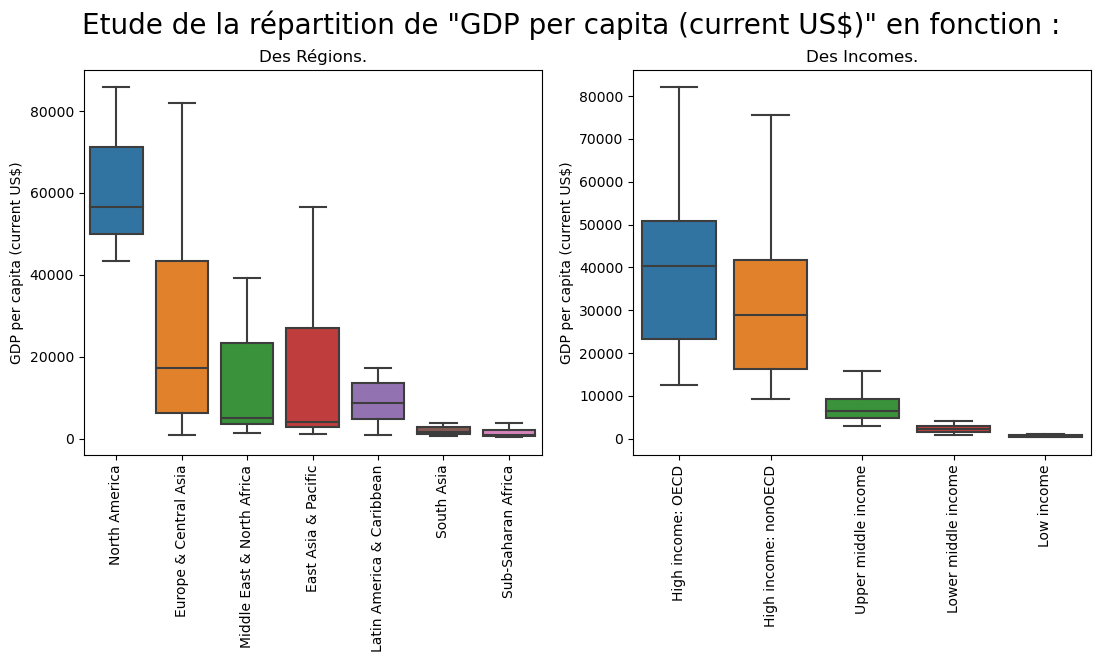

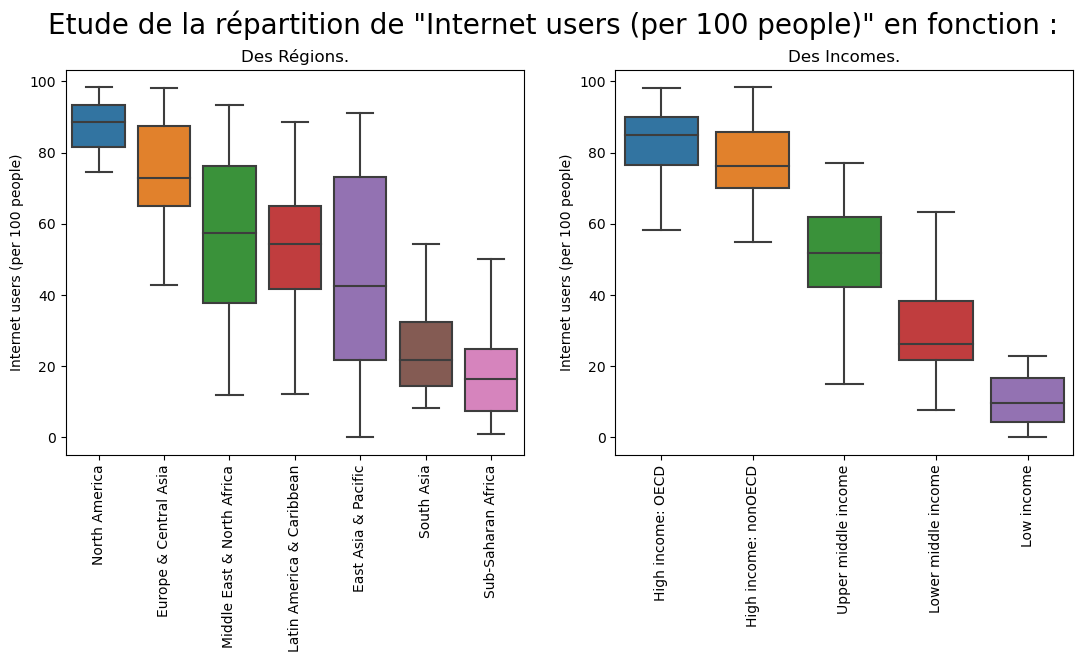

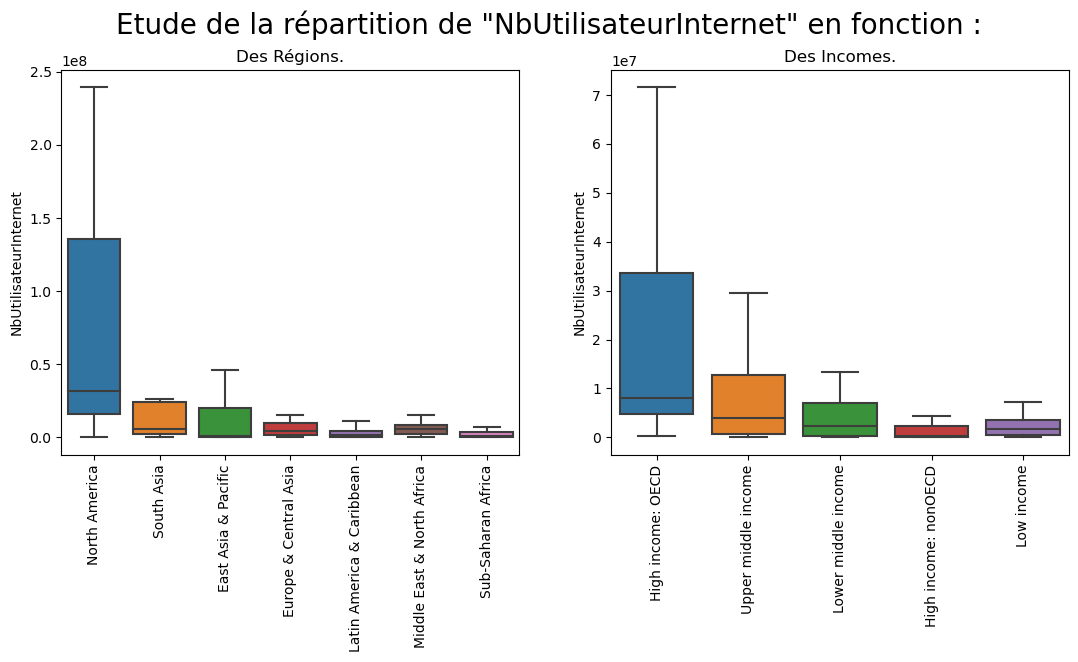

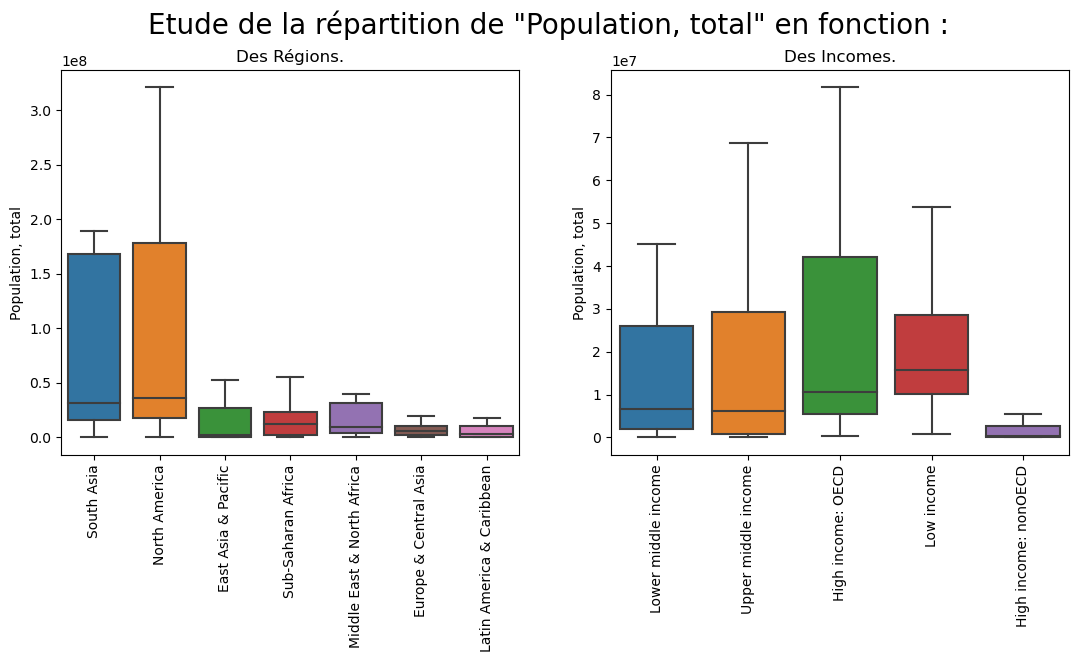

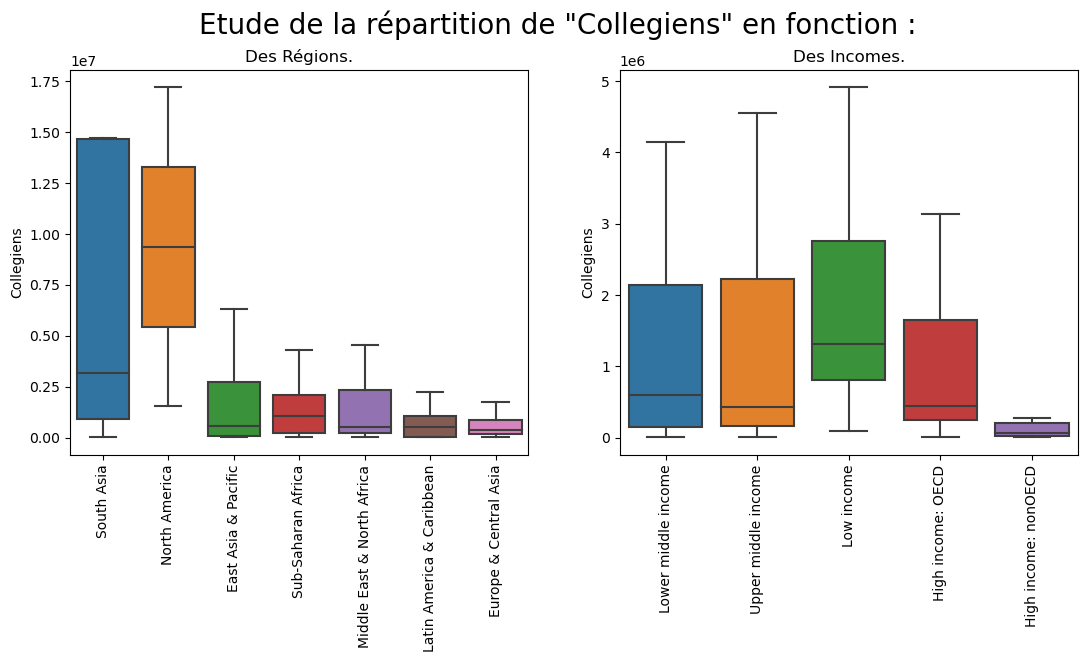

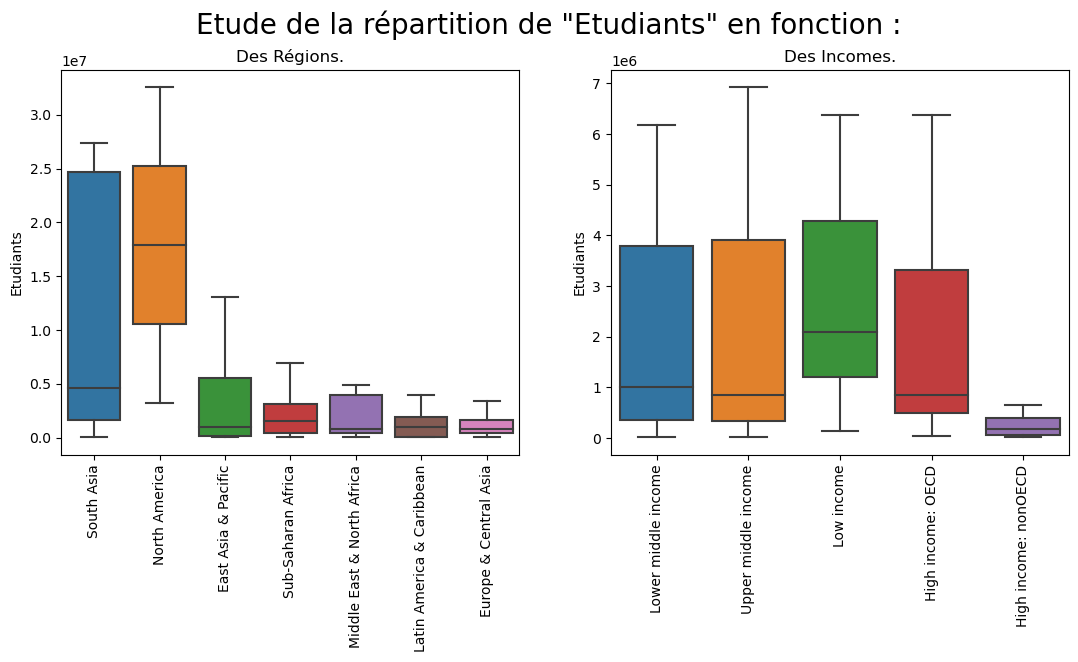

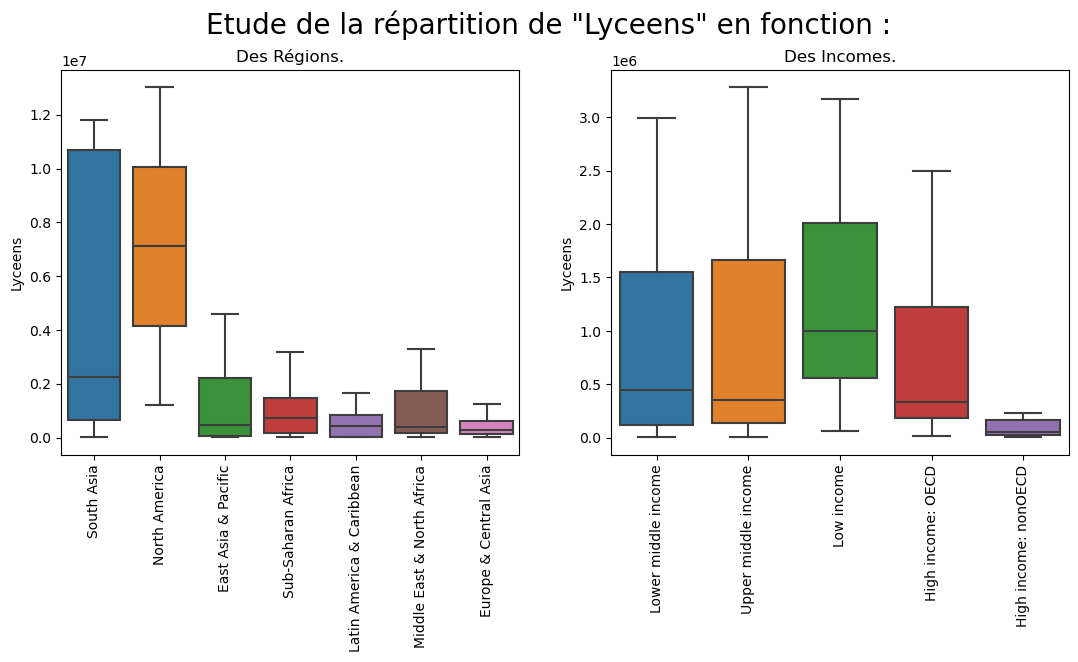

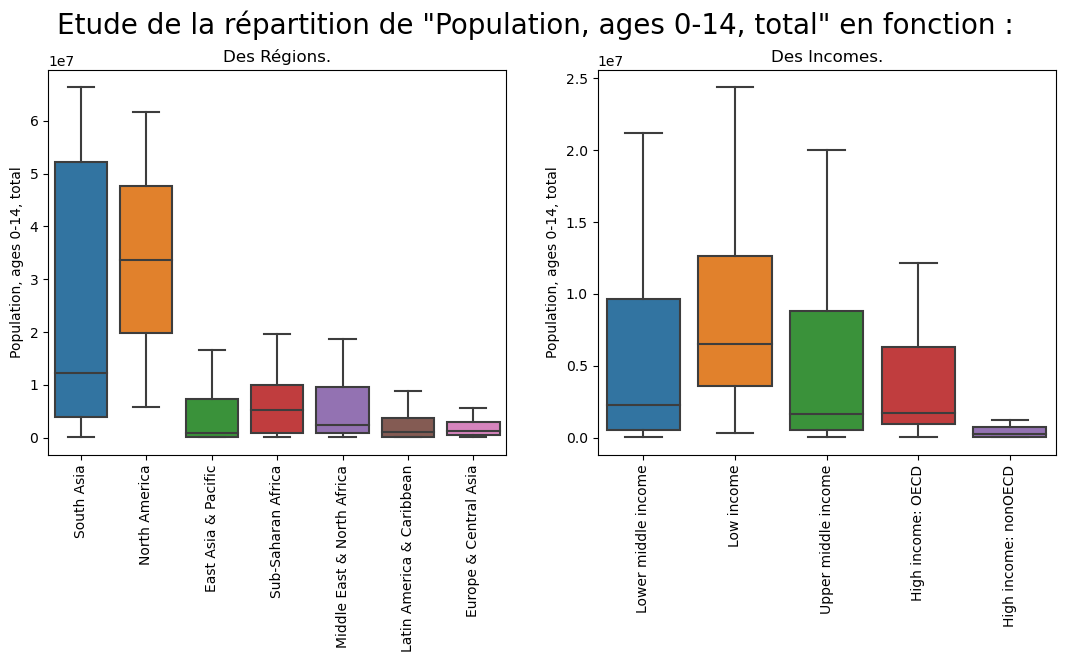

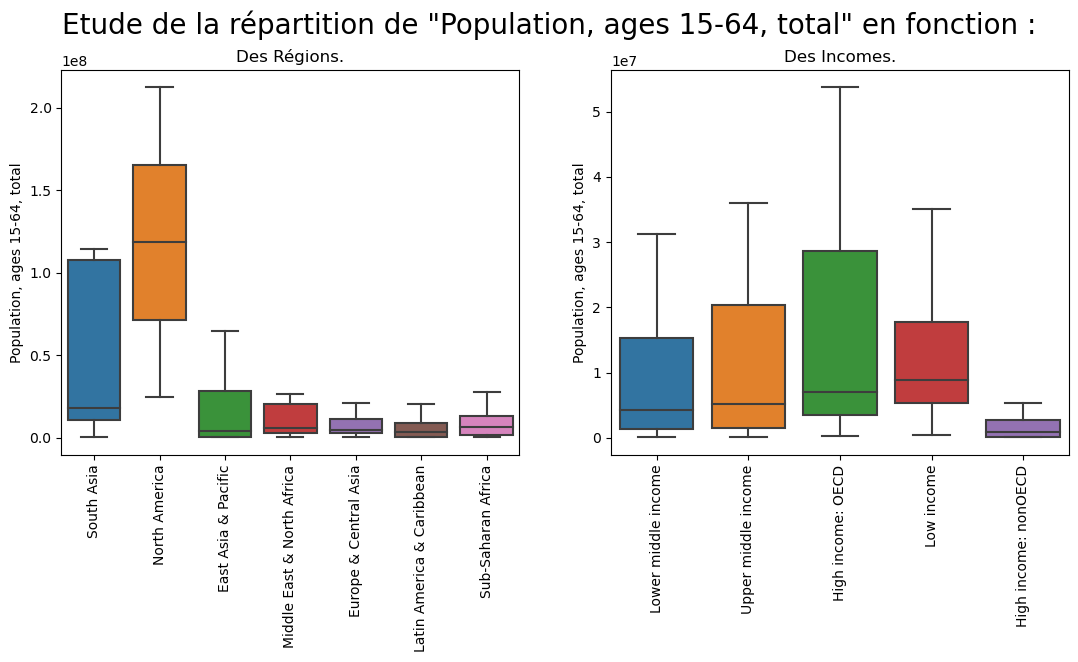

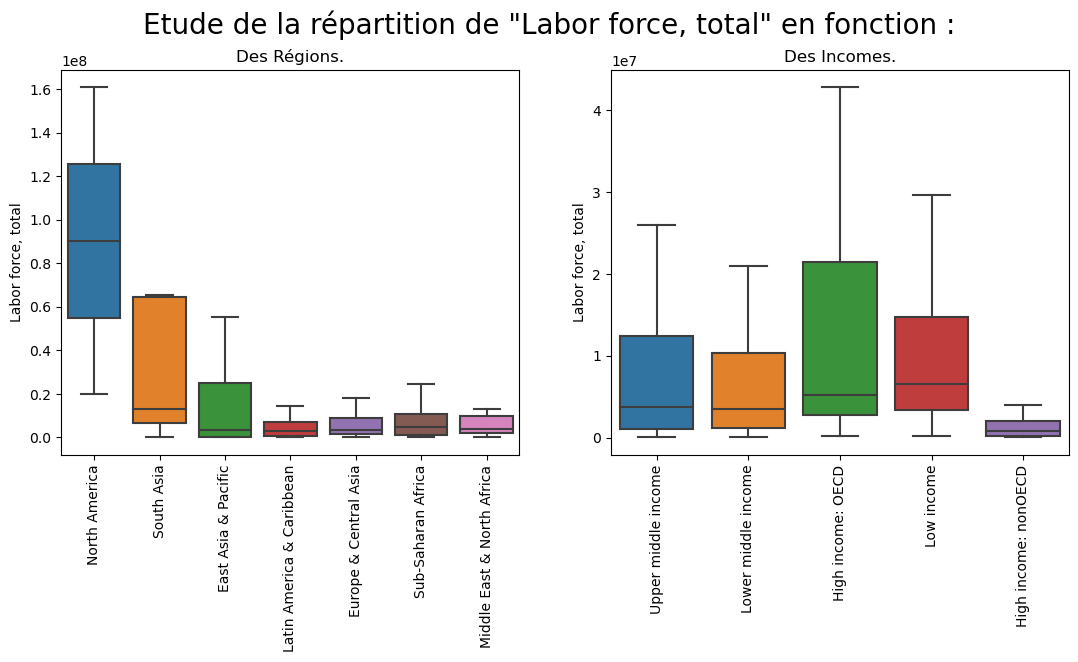

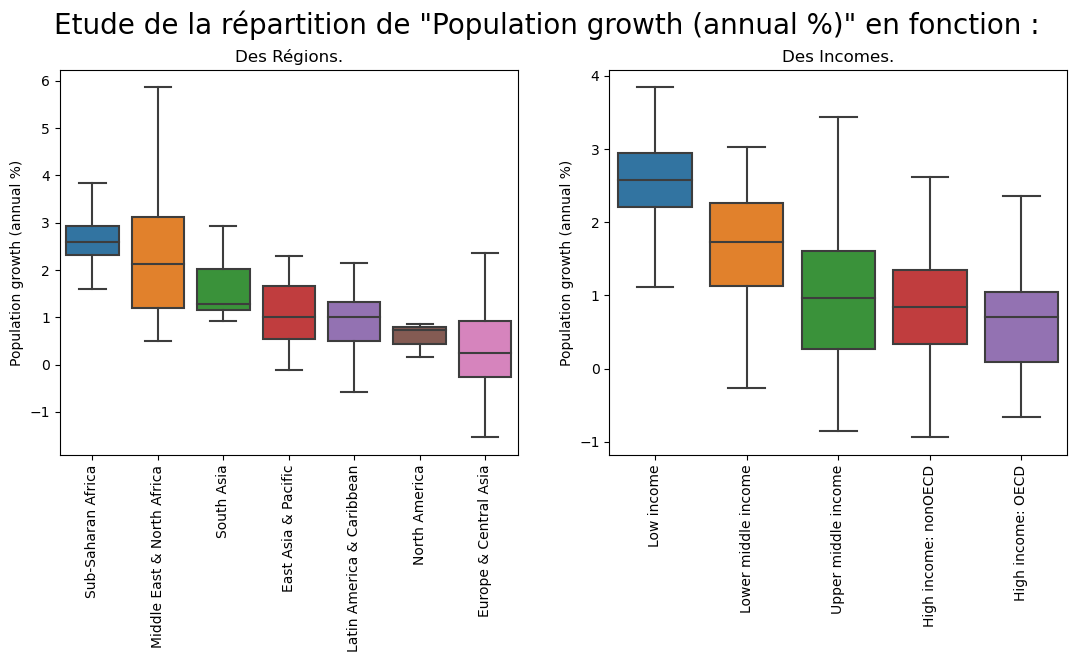

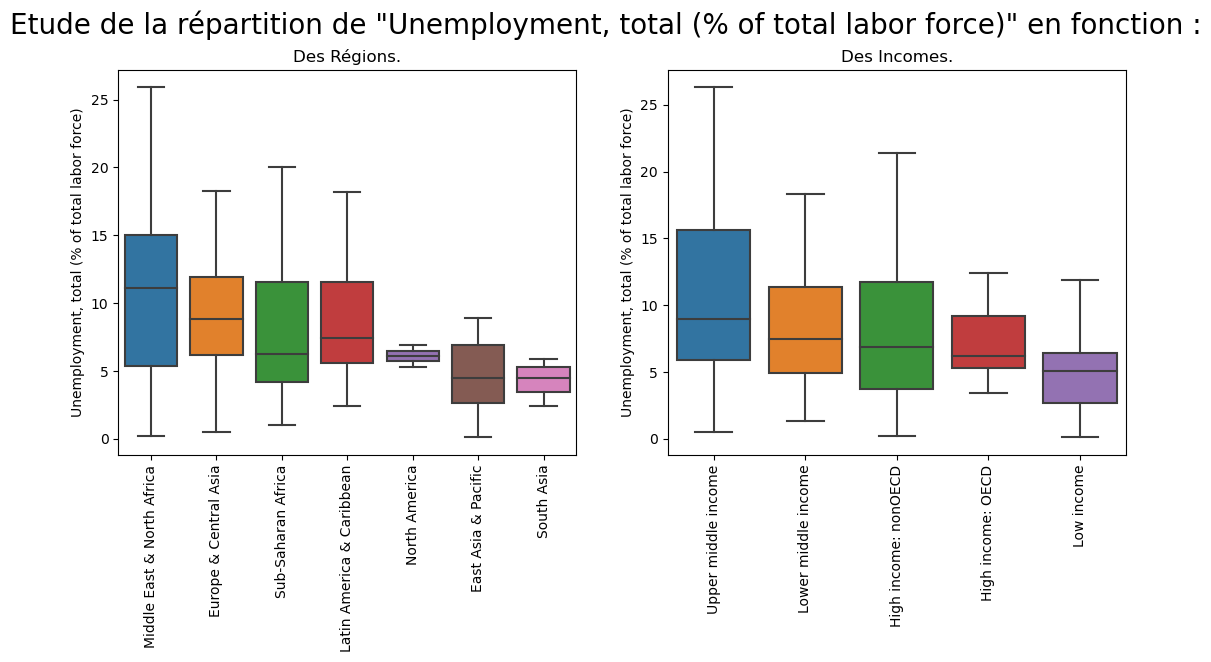

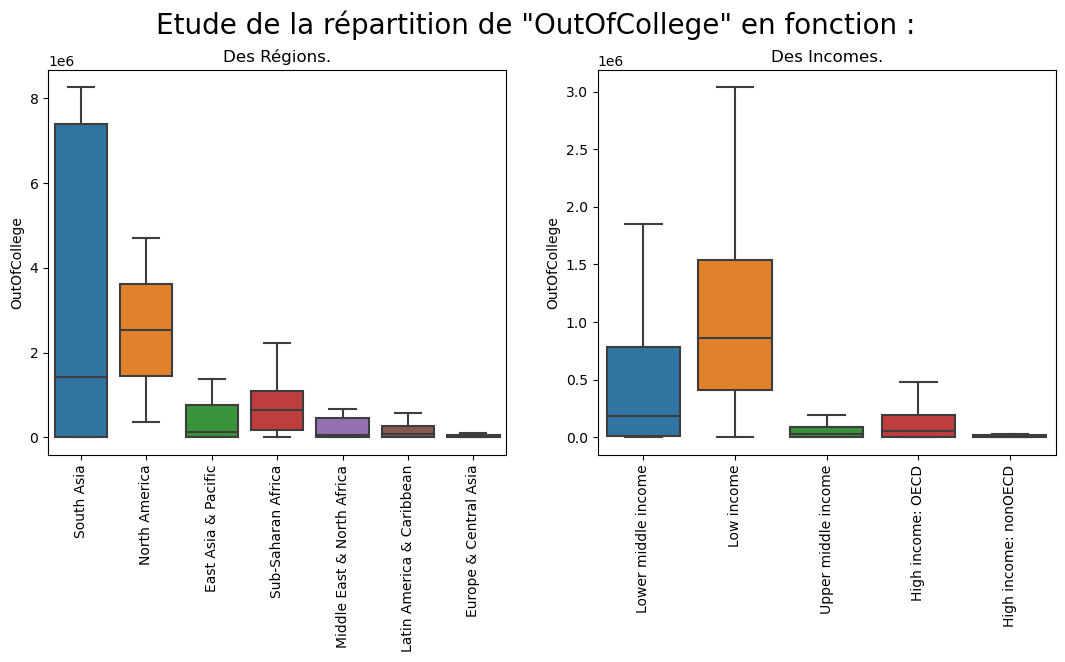

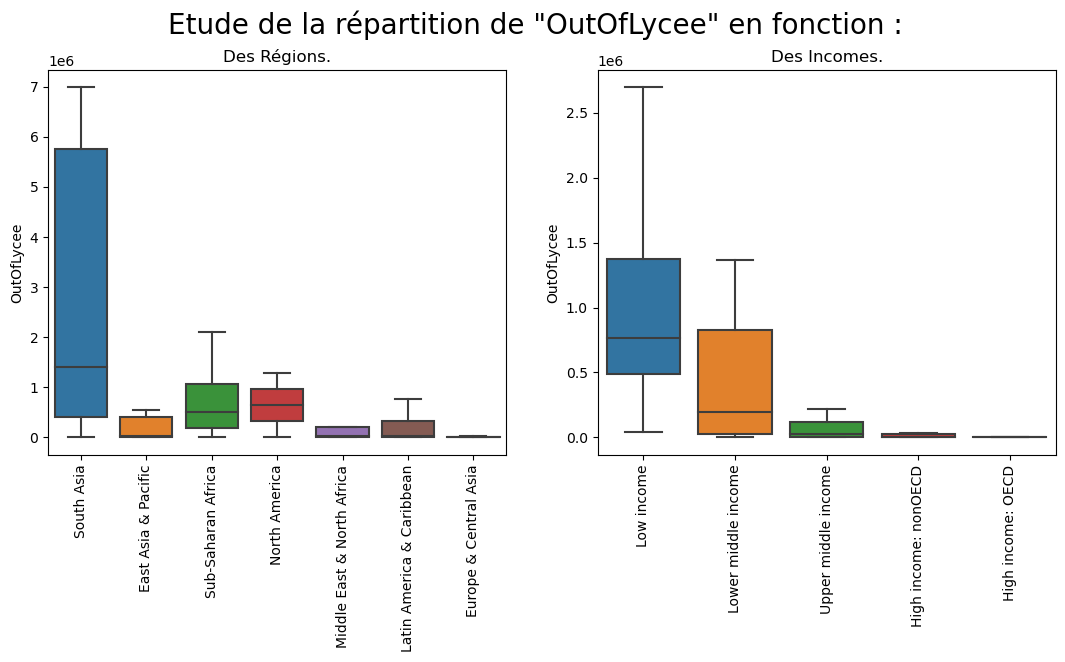

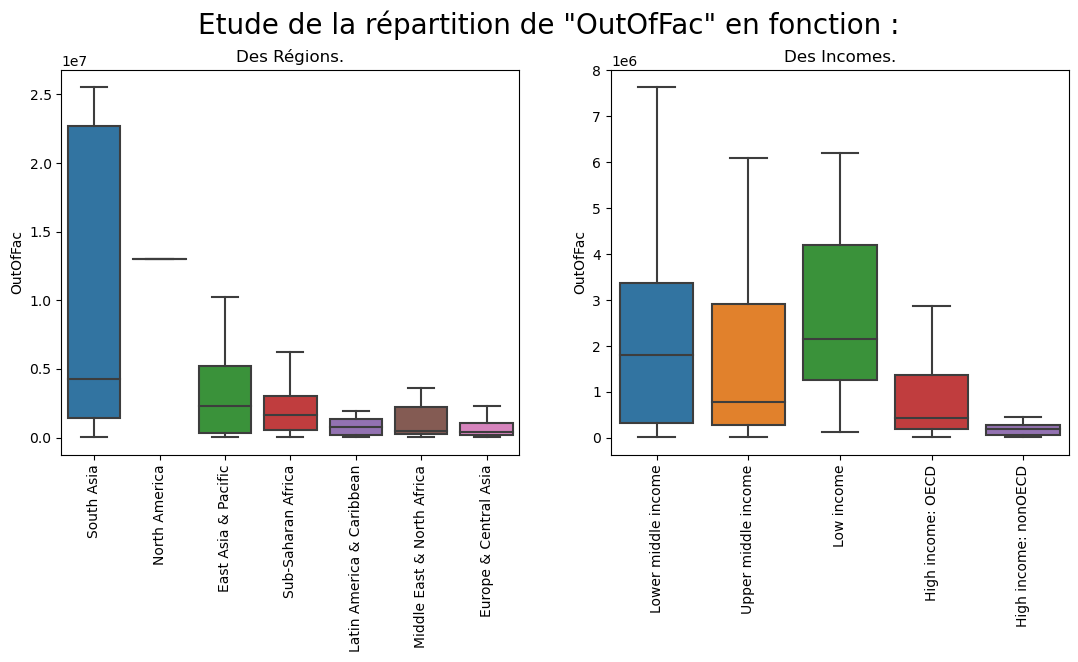

In [79]:
# Etude graphique des indicateurs:

Colonnes = DataPivot2015.iloc[:,3:].columns

for colonne in Colonnes:
    
    OrderRegion = DataPivot2015.set_index('Region').select_dtypes(exclude = 'object').reset_index().groupby('Region').mean().sort_values(colonne, ascending = False).index
    OrderIncome = DataPivot2015.set_index('Income Group').select_dtypes(exclude = 'object').reset_index().groupby('Income Group').mean().sort_values(colonne, ascending = False).index

    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize = (13,5))
    fig.suptitle('Etude de la répartition de "{}" en fonction :'.format(colonne), size = 20, y = 1.00)

    ax1 = plt.subplot(121)
    ax1 = sns.boxplot(DataPivot2015, x = 'Region', y = colonne, showfliers = False, order = OrderRegion)
    plt.title("Des Régions.")
    plt.ylabel(colonne)
    plt.xlabel('')
    plt.xticks(rotation = 90)

    ax2 = plt.subplot(122)
    ax2 = sns.boxplot(DataPivot2015, x = 'Income Group', y = colonne, showfliers = False, order = OrderIncome)
    plt.title("Des Incomes.")
    plt.ylabel(colonne)
    plt.xlabel('')
    plt.xticks(rotation = 90)

    plt.show()

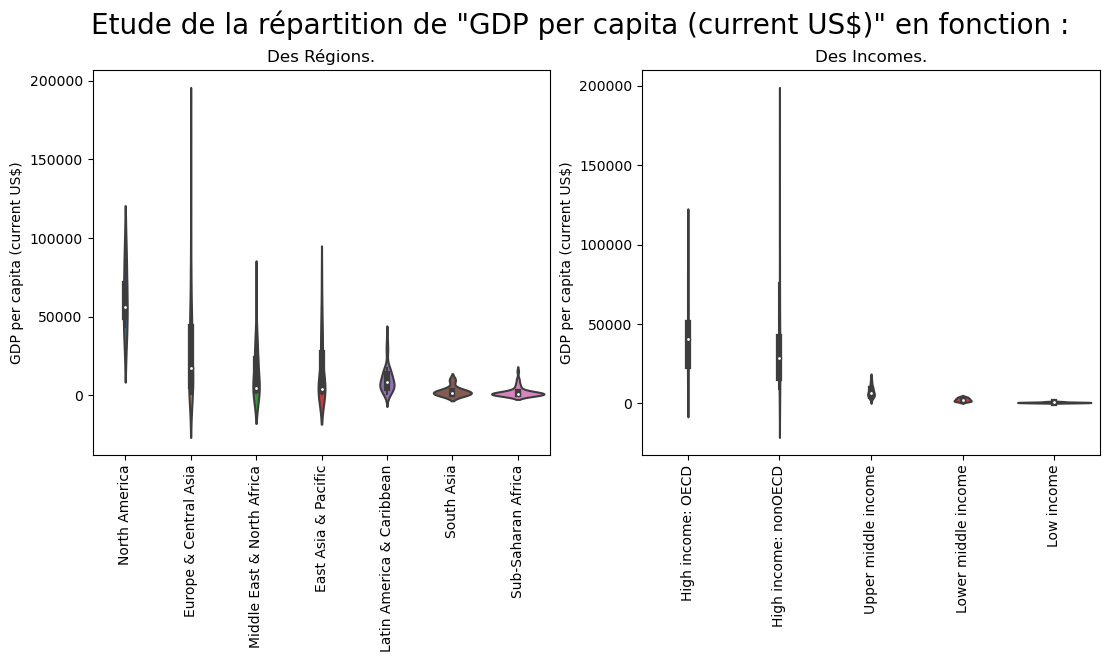

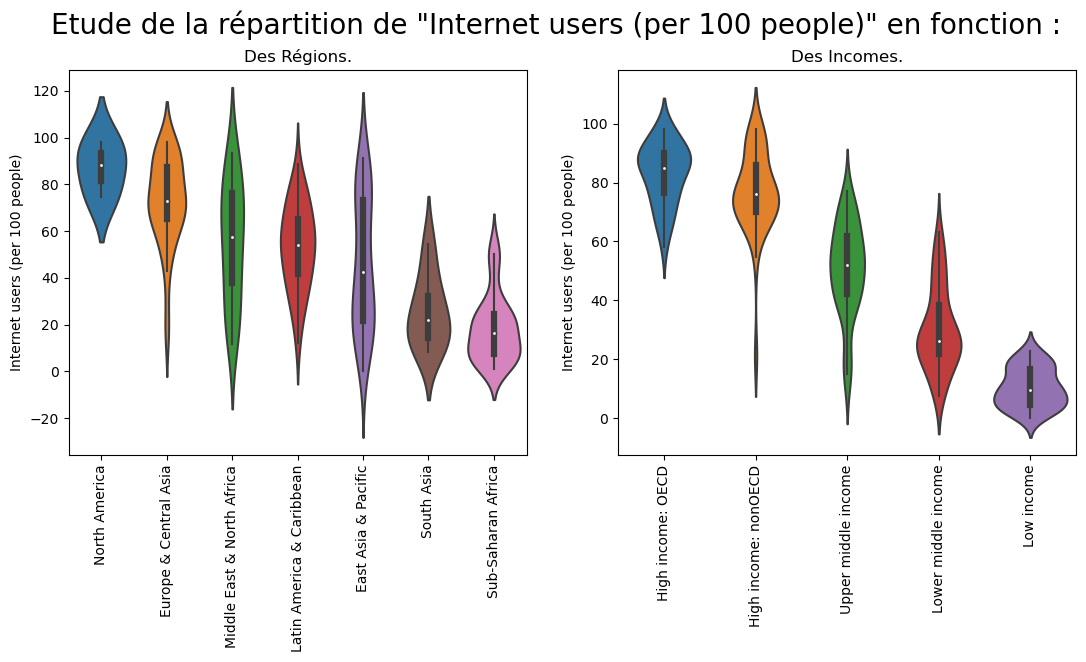

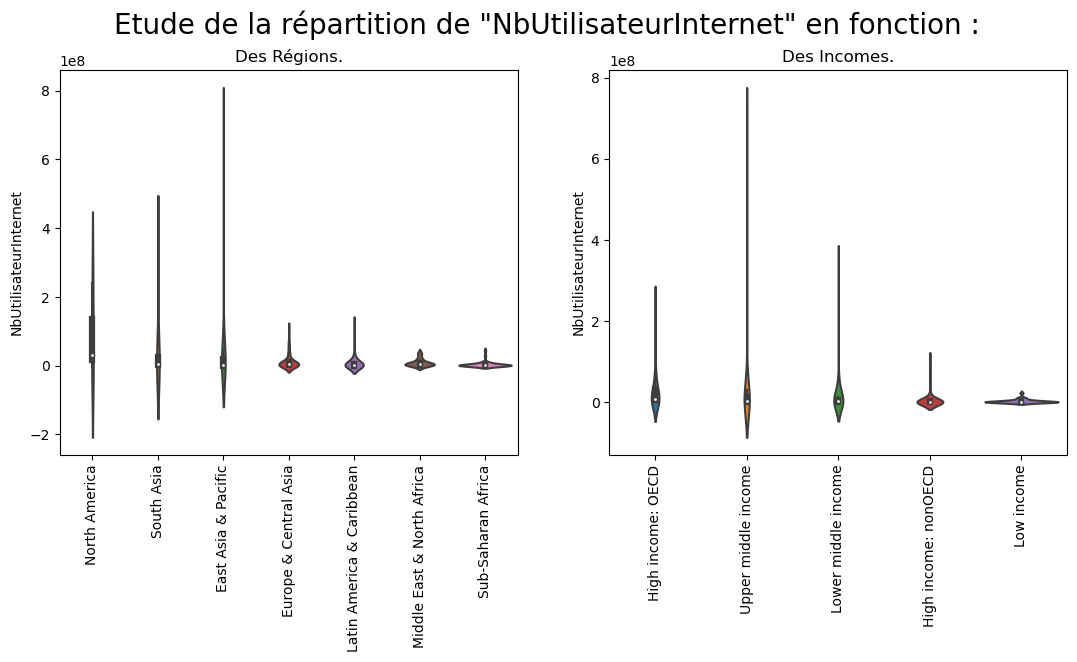

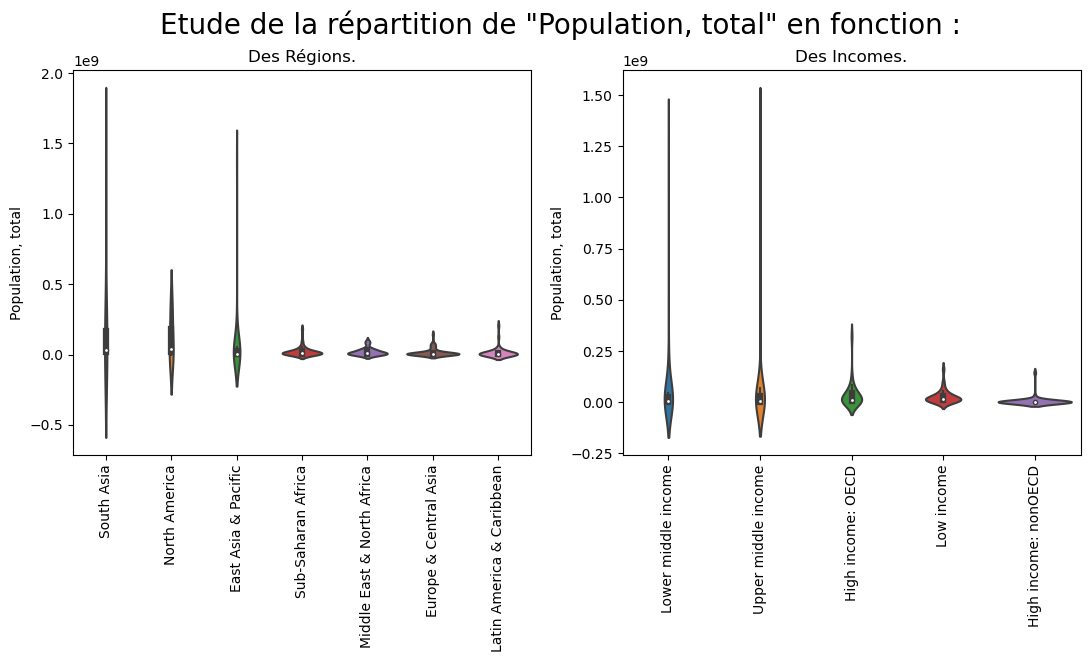

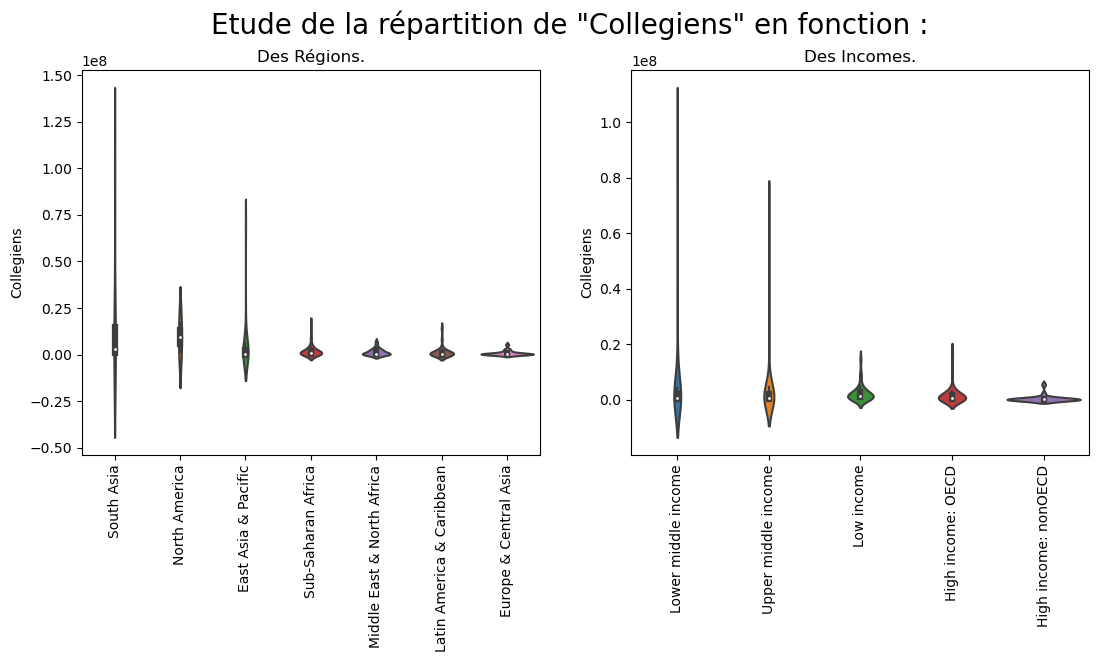

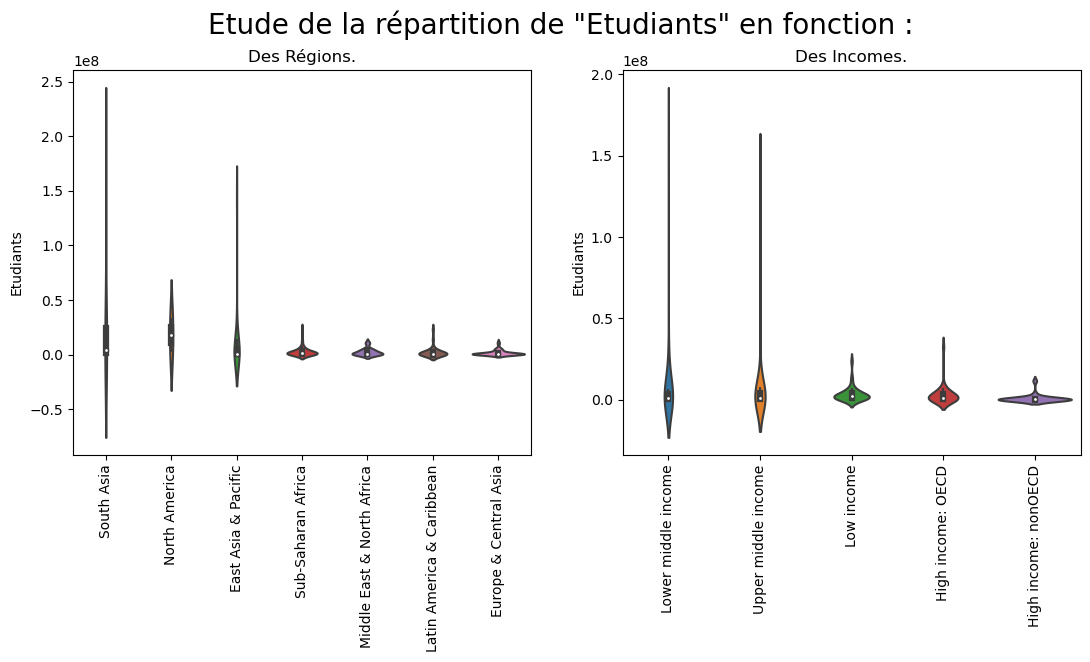

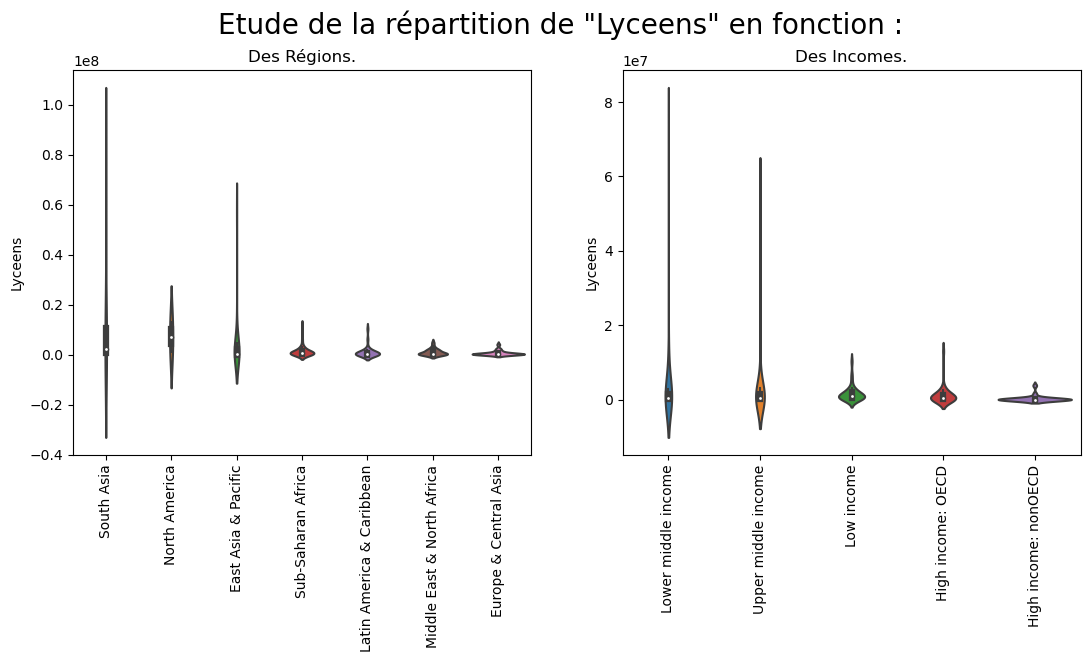

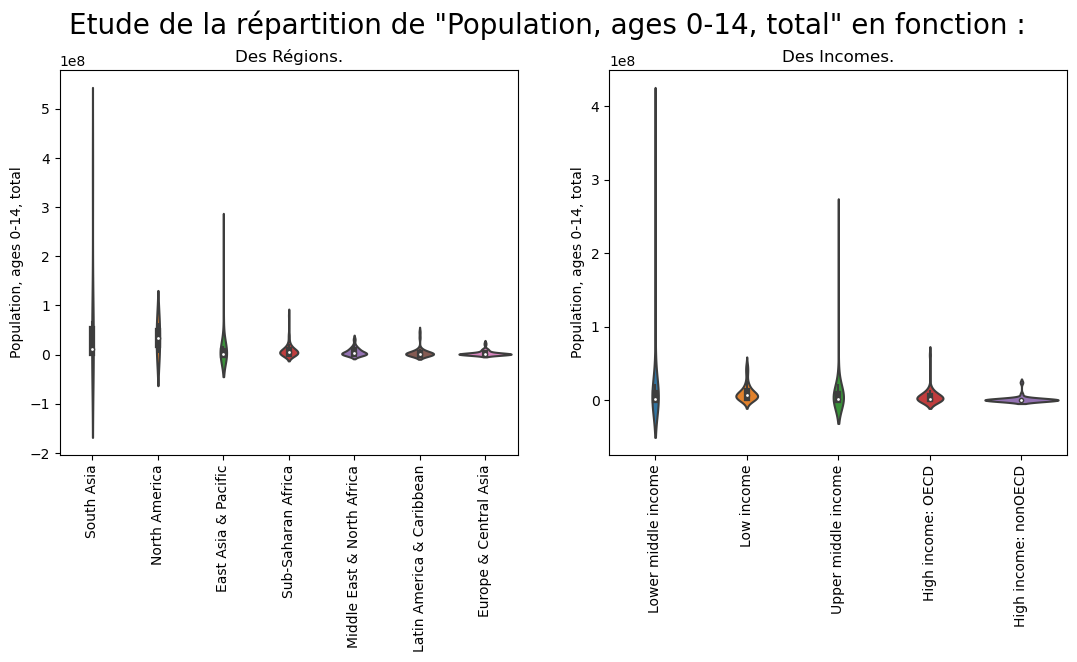

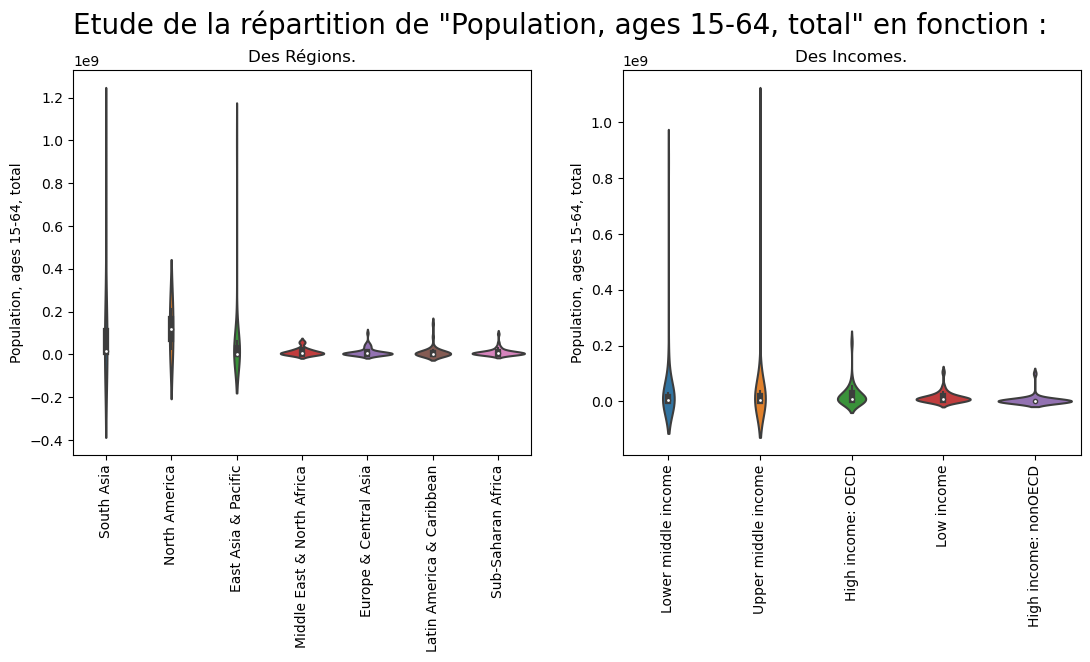

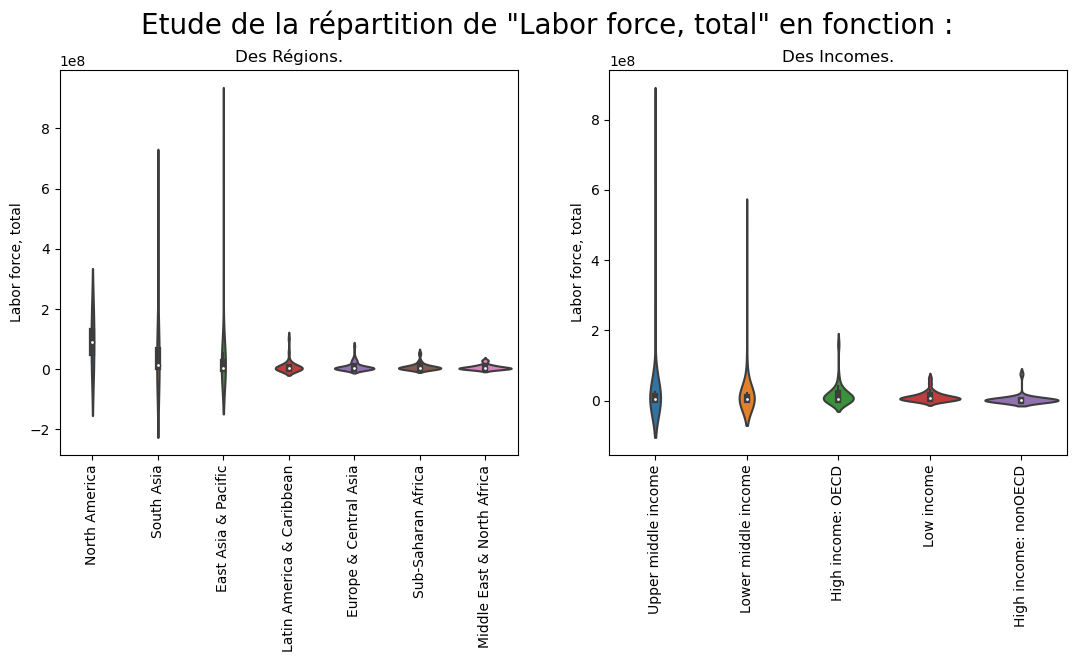

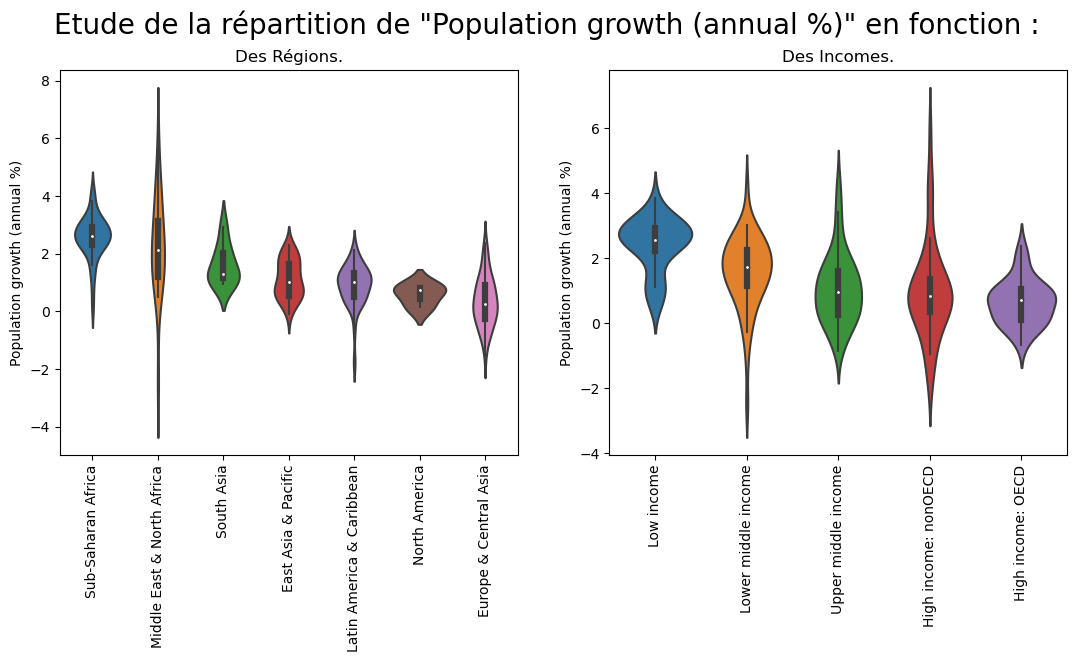

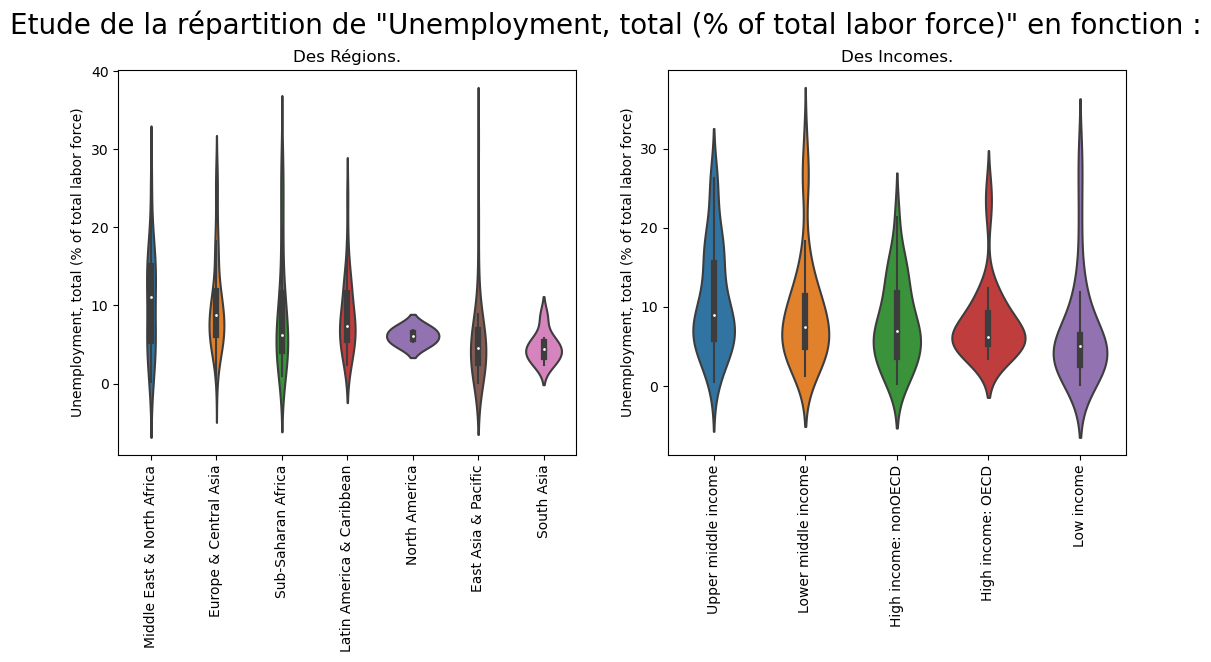

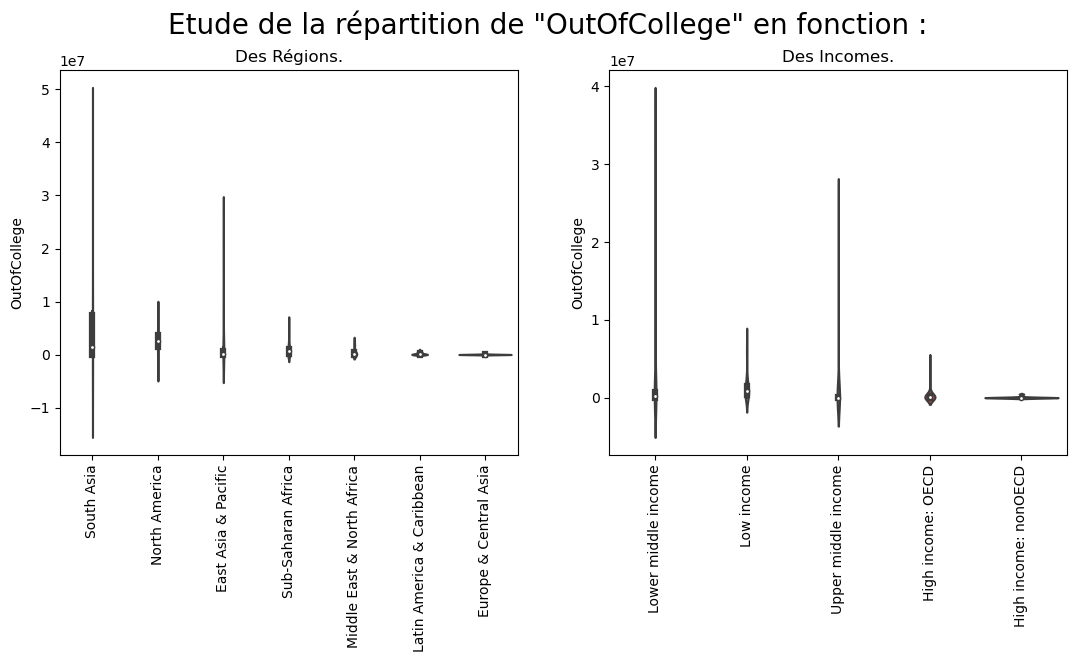

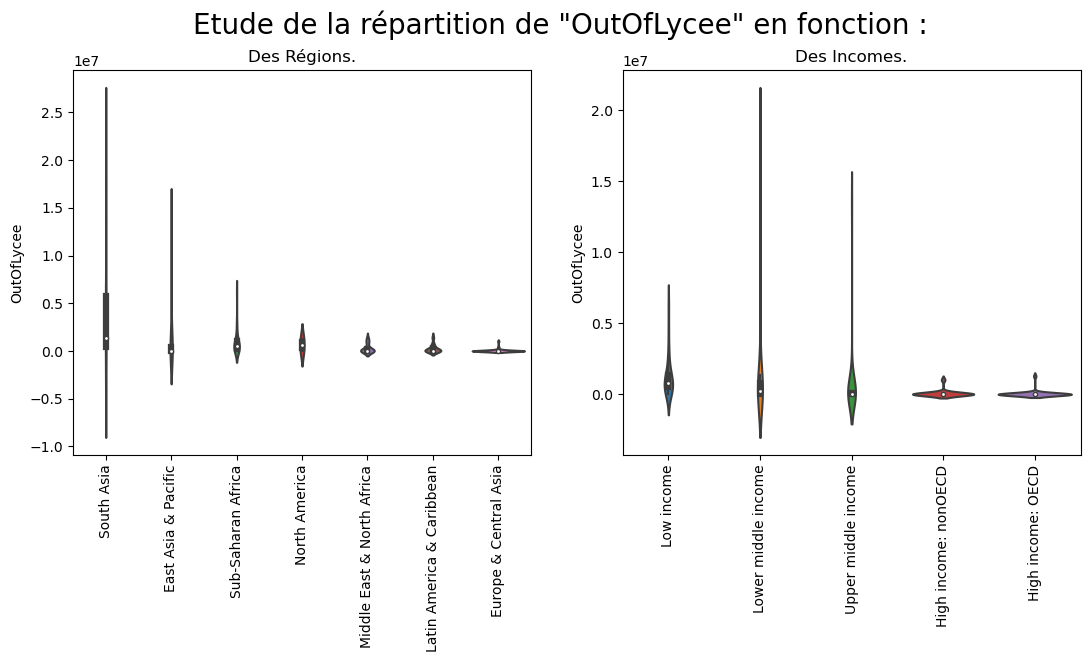

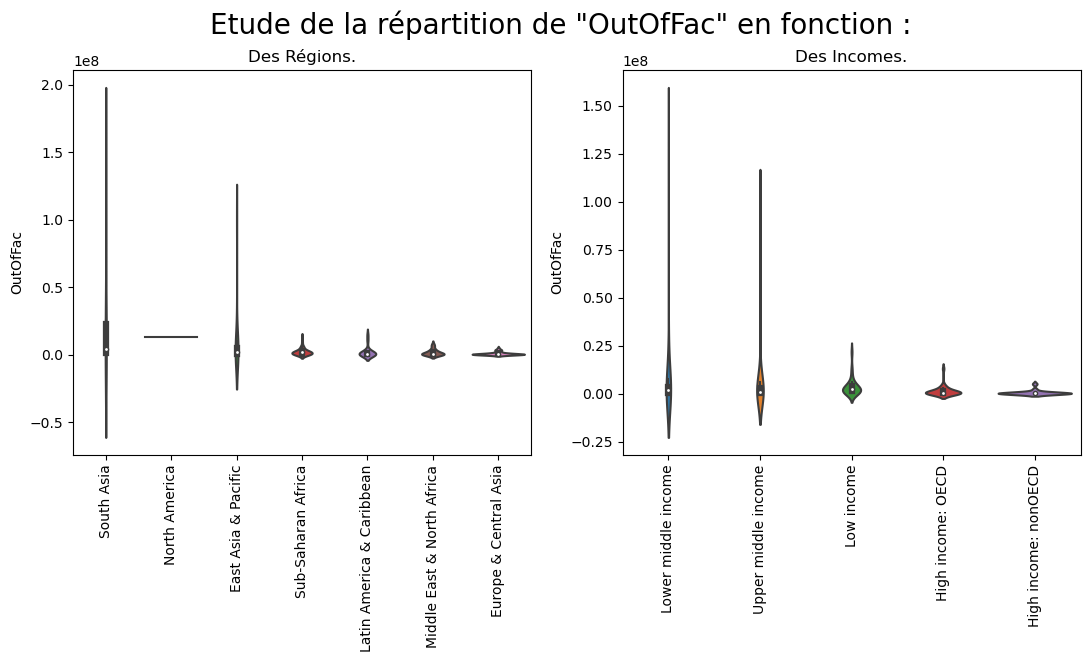

In [80]:
# Idem mais en violinplot (répartition):

Colonnes = DataPivot2015.iloc[:,3:].columns

for colonne in Colonnes:
    
    OrderRegion = DataPivot2015.set_index('Region').select_dtypes(exclude = 'object').reset_index().groupby('Region').mean().sort_values(colonne, ascending = False).index
    OrderIncome = DataPivot2015.set_index('Income Group').select_dtypes(exclude = 'object').reset_index().groupby('Income Group').mean().sort_values(colonne, ascending = False).index

    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize = (13,5))
    fig.suptitle('Etude de la répartition de "{}" en fonction :'.format(colonne), size = 20, y = 1.00)

    ax1 = plt.subplot(121)
    ax1 = sns.violinplot(DataPivot2015, x = 'Region', y = colonne, showfliers = False, order = OrderRegion)
    plt.title("Des Régions.")
    plt.ylabel(colonne)
    plt.xlabel('')
    plt.xticks(rotation = 90)

    ax2 = plt.subplot(122)
    ax2 = sns.violinplot(DataPivot2015, x = 'Income Group', y = colonne, showfliers = False, order = OrderIncome)
    plt.title("Des Incomes.")
    plt.ylabel(colonne)
    plt.xlabel('')
    plt.xticks(rotation = 90)

    plt.show()

- **Les zones contenant en moyenne les pays les plus peuplés sont l'Asie du Sud et l'Amerique du Nord.**
- **Les Incomes contenant en moyenne les pays les plus peuplès sont ceux ayant un revenu moyen.**

- **Les zones contenant en moyenne les pays avec un PIB par habitant le plus élevé sont les zones d'amerique du nord, d'europe et d'asie centrale.**
- **Les Incomes contenant en moyenne les pays avec un PIB par habitant le plus élevé sont comme attendu les zones à revenus élévés**.

- **Les zones utilisant en moyenne le plus internet sont les zones d'Amérique du Nord, d'Asie centrale et d'Europe.**
- **Les Incomes utilisant le plus internet sont les Incomes a revenus élévés.**

In [81]:
# Analyse des corrélations entre les variables via des graphiques:
#sns.pairplot(DataPivot2015, hue = 'Region')
#plt.show()

#sns.pairplot(DataPivot2015, hue = 'Income Group')
#plt.show()

- **On observe une corrélation entre les variables PIB et Internet users sans pour autant observer un impact par zone ou par Incomes.**
- **On observe une corrélation entre la population totale, les collégiens, les lycéens, les étudiants et dans une moindre mesure le Nb d'utilisateur internet, cependant on ne remarque pas d'influence de la région/zone ou de l'income.**
- **Ces corrélations seront analysées plus en détailes dans la suite.**

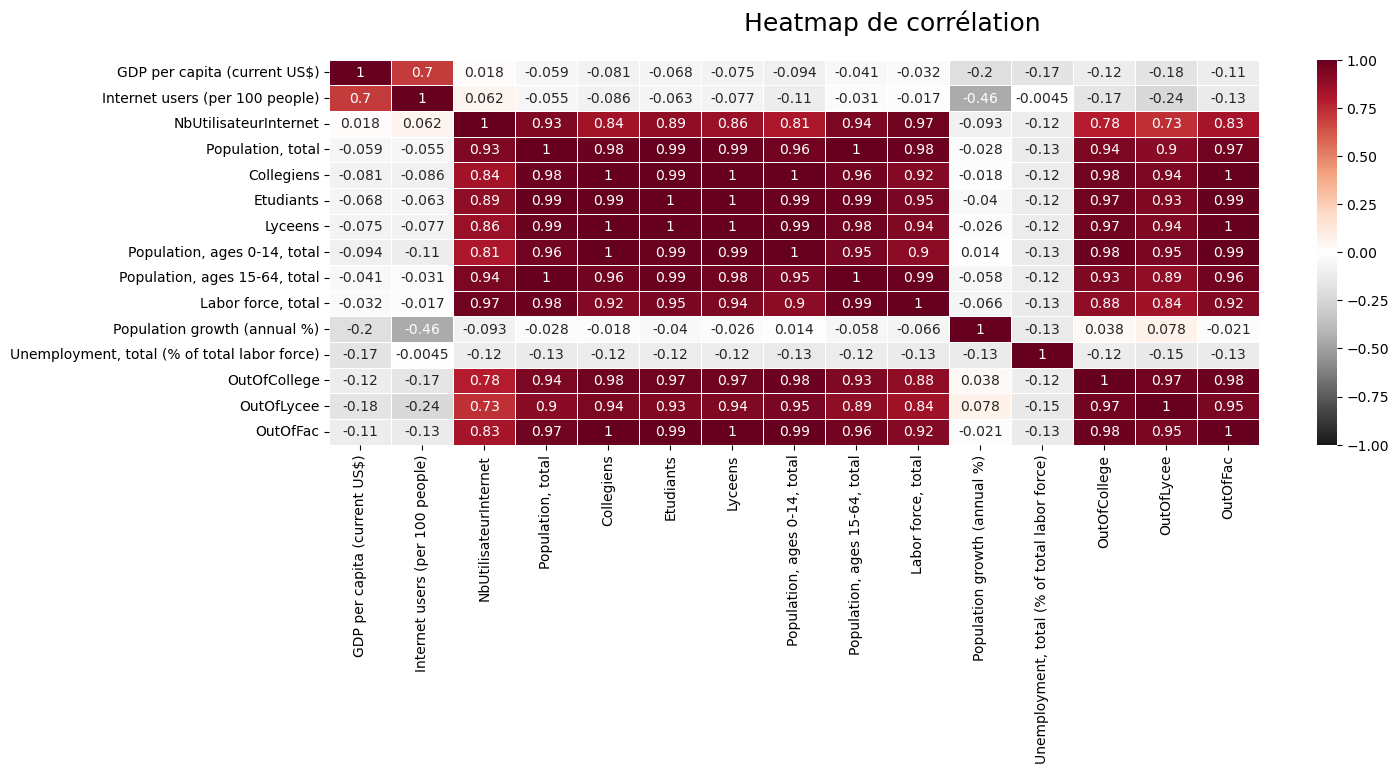

In [82]:
# Heatmap de Corrélation :
plt.subplots(figsize = (15,5))
sns.heatmap(DataPivot2015.select_dtypes(exclude = 'object').corr(),vmin=-1, vmax=1, cmap = "RdGy_r", annot = True, linewidths = 0.5)
plt.suptitle("Heatmap de corrélation", size = 18)
plt.xlabel('')
plt.ylabel('')

plt.show()

- **On remarque une corrélation entre le PBI par habitant et l'utilisation d'internet.**
- **On remarque une corrélation entre le nombre d'habitants, le nombre d'utilisateur d'internet, la quantité de collégiens, lycéens, Etudes Supérieurs, la population 0-14 et 15-64 et la force de travail.**
- **Pas de corrélation entre les deux variables qui sont en % et le reste, bien que l'on ait une inversion entre le pourcentage de pouplation qui utilise internet et le pourcentage de croissance démographieque (de la à dire qu'il y a une causalité il n'y a qu'un pas ^^).**

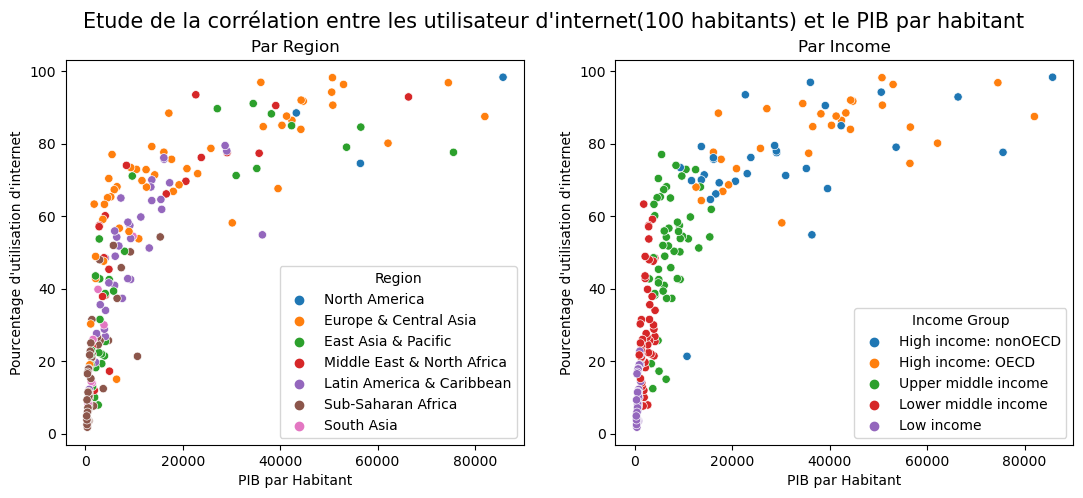

In [83]:
# Analyse en scatterplot des données corrélées:

# Suppression du Lichtenstein dont le PIB est beaucoup plus haut et aplati le graphique:
Scatter1 = DataPivot2015.sort_values('GDP per capita (current US$)', ascending = False)
Scatter1 = Scatter1.iloc[2:,:]

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize = (13,5))
fig.suptitle("Etude de la corrélation entre les utilisateur d'internet(100 habitants) et le PIB par habitant", size = 15)

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(Scatter1, x = 'GDP per capita (current US$)', y = 'Internet users (per 100 people)', hue = 'Region')
plt.xlabel('PIB par Habitant')
plt.ylabel("Pourcentage d'utilisation d'internet")
plt.title('Par Region')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(Scatter1, x = 'GDP per capita (current US$)', y = 'Internet users (per 100 people)', hue = 'Income Group')
plt.xlabel('PIB par Habitant')
plt.ylabel("Pourcentage d'utilisation d'internet")
plt.title('Par Income')


plt.show()

- **La corrélation est bien visible entre ces deux variables.**
- **Il est difficile de faire resssortir une région plutôt qu'une autre.**
- **On confirme par contre la corrélation entre les utilisateurs d'internet et les Incomes, avec une plus forte utilisaation de l'utilisation d'internet pour les pays riches.**

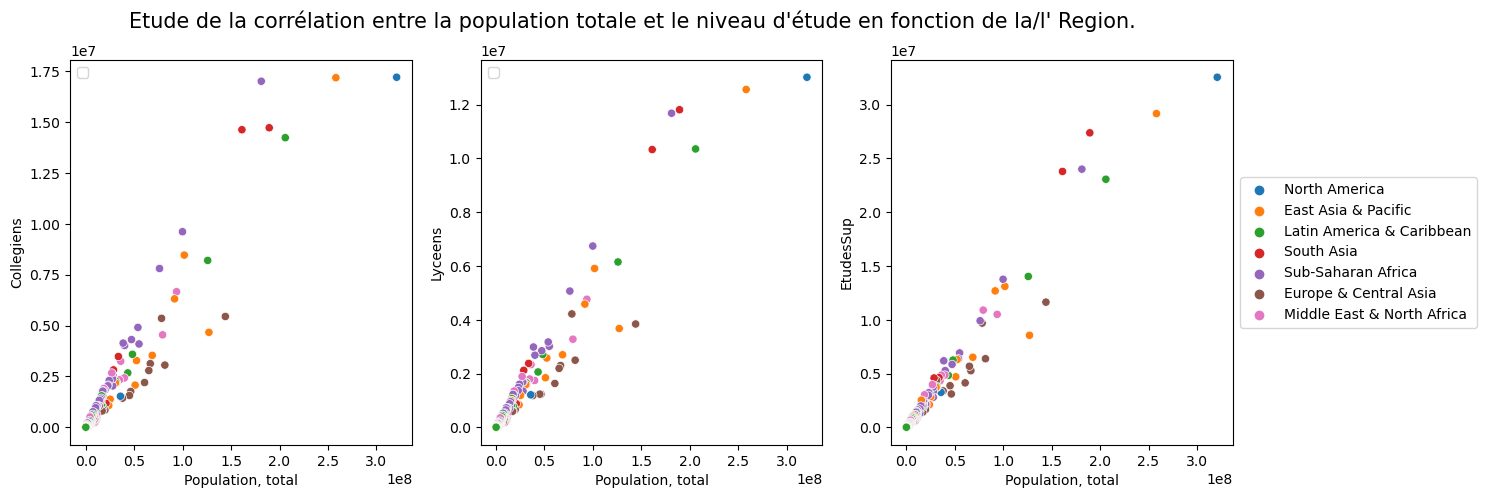

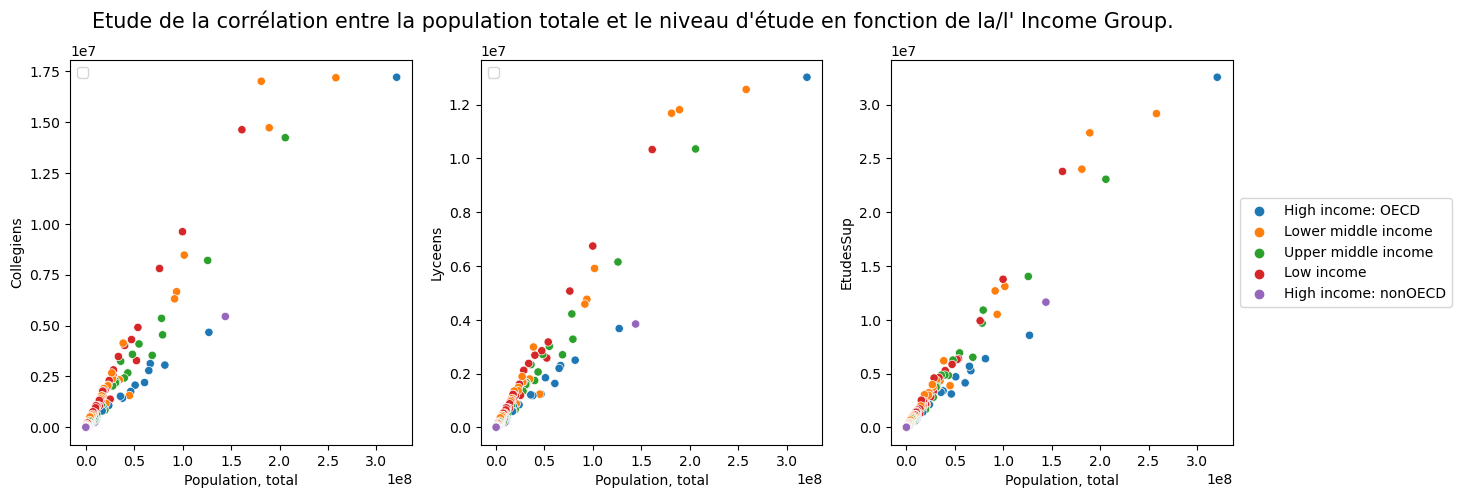

In [84]:
# Analyse de la corrélation entre la population total et le niveau d'étude:
# Suppression des deux plus gros pays:

Scatter2 = DataPivot2015.sort_values('Population, total', ascending = False)
Scatter2 = Scatter2.iloc[2:,:]

ListGroupe = 'Region', 'Income Group'

for liste in ListGroupe:
    
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize = (15,5))
    fig.suptitle("Etude de la corrélation entre la population totale et le niveau d'étude en fonction de la/l' {}.".format(liste), size = 15)
        
    ax1 = plt.subplot(131)
    ax1 = sns.scatterplot(Scatter2, x = 'Population, total', y = 'Collegiens', hue = liste)
    plt.xlabel('Population, total')
    plt.ylabel('Collegiens')
    plt.legend('')

    ax2 = plt.subplot(132)
    ax2 = sns.scatterplot(Scatter2, x = 'Population, total', y = 'Lyceens', hue = liste)
    plt.xlabel('Population, total')
    plt.ylabel('Lyceens')
    plt.legend('')

    ax3 = plt.subplot(133)
    ax3 = sns.scatterplot(Scatter2, x = 'Population, total', y = 'Etudiants', hue = liste)
    plt.xlabel('Population, total')
    plt.ylabel('EtudesSup')
    ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    

    plt.show()

- **Comme attendu on observe bien une belle corrélation entre ces 3 variables et la variable population totale sans pour autant voir une corrélation avec les zones ou les Incomes ce qui est attendue**.

### 3.2.2 : Etude axée pour l'entreprise :

- **Comme montré dans l'analyse exploratoire du jeu de donnée, les pays utilisant le plus internet sont les pays avec un Income élevé et dans une moindre mesure et avec plus de disparité la classe moyenne supérieure (Lower middle Income).**
- **Je vais donc analyser uniquement les données des classes supérieurs, à valider avec l'entreprise.**

In [85]:
# Création d'une table avec les pays riches:
DataRiche2015 = DataPivot2015[(DataPivot2015['Income Group'] == 'High income: nonOECD') | (DataPivot2015['Income Group'] == 'High income: OECD')]

C:\Users\Johan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


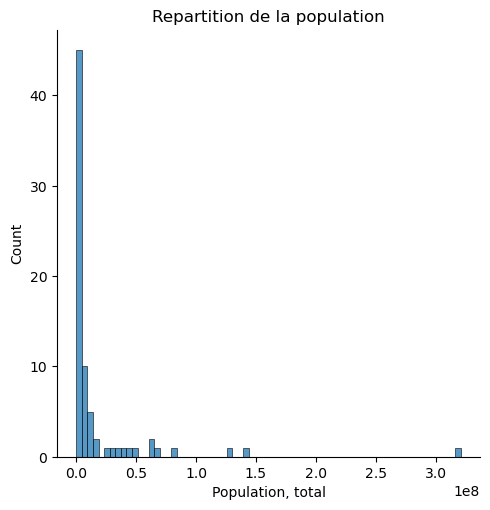

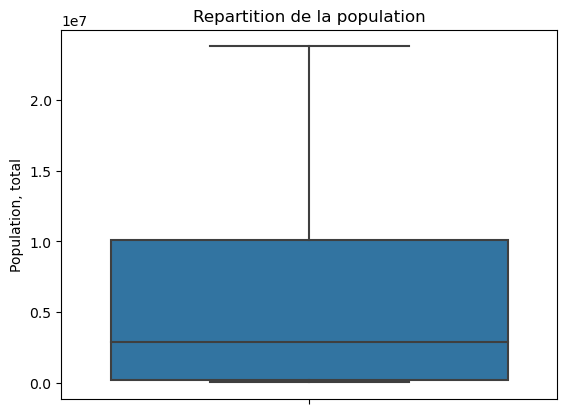

In [86]:
# Etude Graphique de la répartition de la population :

# En displot:
sns.displot(DataRiche2015['Population, total'])
plt.title('Repartition de la population')
plt.show()

# En boxplot (elimine les outliers):
sns.boxplot(y = DataRiche2015['Population, total'], showfliers = False)
plt.title('Repartition de la population')
plt.show()

- **Beaucoup de trés petit pays sur le displot.**

In [87]:
# Mesures des quartiles de la population totale:
round(DataRiche2015['Population, total'].describe())

count           75.0
mean      17318900.0
std       44617004.0
min          31264.0
25%         162778.0
50%        2904910.0
75%       10078631.0
max      320896618.0
Name: Population, total, dtype: float64

- **25% des Pays de cette DF ont moins de 160000 habitants et 50% des pays ont moins de 3 millions d'habitants.**

- **En l'absence d'une colonne langue principale qui pourrait regrouper certains petits pays, je vais garder les pays ayant une population supérieure ou égale à la médiane et ce afin d'éliminer les plus petits pays ne représentant pas un assez grand nombre de clients pour l'entreprise.**

In [88]:
# Slice de la DF sur la médiane de la population totale:
Mediane = DataRiche2015['Population, total'].median()
DataRiche2015 = DataRiche2015[DataRiche2015['Population, total'] >= Mediane]

In [89]:
# Analyse de cette DF:
DataRiche2015.describe()

Indicator Name  GDP per capita (current US$)  Internet users (per 100 people)  \
count                              38.000000                        38.000000   
mean                            35329.900526                        80.023421   
std                             17894.248195                         9.961994   
min                              9329.300000                        58.140000   
25%                             18366.242500                        71.887500   
50%                             36109.020000                        79.795000   
75%                             44293.057500                        88.062500   
max                             82016.020000                        96.810000   

Indicator Name  NbUtilisateurInternet  Population, total    Collegiens  \
count                    3.800000e+01       3.800000e+01  3.700000e+01   
mean                     2.675154e+07       3.370887e+07  1.533820e+06   
std                      4.499669e+07       5.849527e+07  2.951164e+06   
min                      2.073467e+06       2.904910e+06  1.255320e+05   
25%                      4.463908e+06       5.437734e+06  2.414020e+05   
50%                      7.613387e+06       1.007863e+07  4.184260e+05   
75%                      3.024385e+07       3.745196e+07  1.764282e+06   
max                      2.392419e+08       3.208966e+08  1.719932e+07   

Indicator Name     Etudiants       Lyceens  Population, ages 0-14, total  \
count           3.700000e+01  3.700000e+01                  3.800000e+01   
mean            2.992987e+06  1.171548e+06                  5.668787e+06   
std             5.629226e+06  2.230389e+06                  1.066729e+07   
min             3.222890e+05  1.075260e+05                  4.240070e+05   
25%             4.995040e+05  1.868510e+05                  9.211485e+05   
50%             8.188940e+05  3.213190e+05                  1.584848e+06   
75%             3.386991e+06  1.232097e+06                  6.625252e+06   
max             3.254673e+07  1.301754e+07                  6.165342e+07   

Indicator Name  Population, ages 15-64, total  Labor force, total  \
count                            3.800000e+01        3.800000e+01   
mean                             2.238361e+07        1.700269e+07   
std                              3.862492e+07        2.959325e+07   
min                              1.938118e+06        1.178300e+06   
25%                              3.514168e+06        2.744476e+06   
50%                              6.902254e+06        5.091511e+06   
75%                              2.588472e+07        1.938833e+07   
max                              2.122628e+08        1.607678e+08   

Indicator Name  Population growth (annual %)  \
count                              38.000000   
mean                                0.766842   
std                                 1.306222   
min                                -1.760000   
25%                                 0.122500   
50%                                 0.720000   
75%                                 1.067500   
max                                 5.860000   

Indicator Name  Unemployment, total (% of total labor force)  OutOfCollege  \
count                                              38.000000  3.600000e+01   
mean                                                8.015789  2.596227e+05   
std                                                 5.036544  7.923623e+05   
min                                                 1.700000  0.000000e+00   
25%                                                 5.075000  0.000000e+00   
50%                                                 6.200000  5.369550e+04   
75%                                                 9.400000  1.673642e+05   
max                                                24.900000  4.705861e+06   

Indicator Name    OutOfLycee      OutOfFac  
count           3.600000e+01  3.600000e+01  
mean            7.053103e+04  1.376433e+06  
std             2.679007e

- **Il y a toujours des outliers (10% pour internet), des gros pays et des pays trés riches, mais ce n'est pas génant pour l'analyse.**

In [90]:
# Y a t'il des NaNs dans ce DF:
for colonne in DataRiche2015.columns:
    try:
        print(DataRiche2015[DataRiche2015[colonne].isna()][['Country Name',colonne]].values[0][0], 'pour la colonne :', colonne)
    except:
        pass

Puerto Rico pour la colonne : Collegiens
Puerto Rico pour la colonne : Etudiants
Puerto Rico pour la colonne : Lyceens
Puerto Rico pour la colonne : OutOfCollege
Puerto Rico pour la colonne : OutOfLycee
Canada pour la colonne : OutOfFac


In [91]:
# Suppression des lignes avec des NaNs:
DataRiche2015 = DataRiche2015.dropna()

In [92]:
# Listes des pays:
print(list(DataRiche2015['Country Name']), end = " ")
liste = DataRiche2015['Country Name']

['Australia', 'Austria', 'Belgium', 'Chile', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong SAR, China', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Lithuania', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Poland', 'Portugal', 'Russian Federation', 'Saudi Arabia', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay'] 

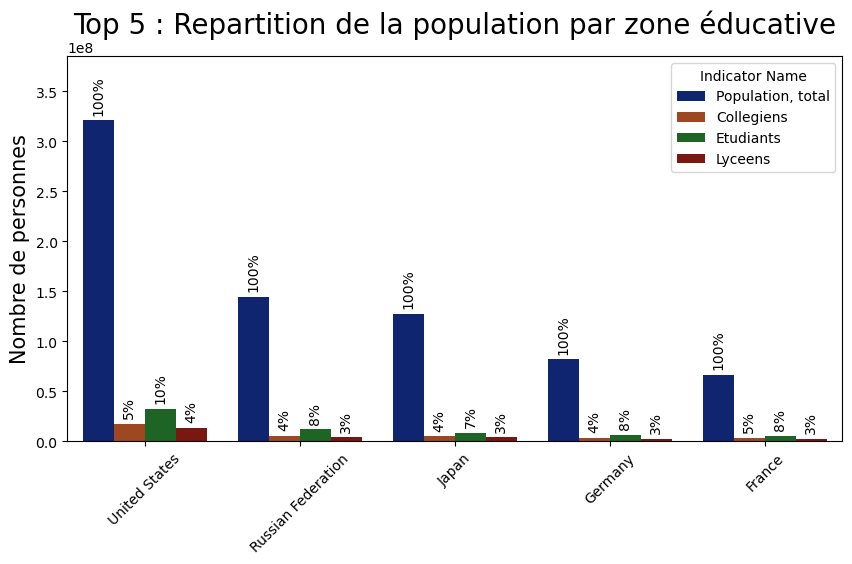

In [93]:
# Visualisation sous forme de graphiques:
Graph = DataRiche2015.sort_values(by = 'Population, total', ascending = False)
Graph['PourcentagePopTotal'] = '100%'
Graph['PourcentageCollegiens'] = (round((Graph['Collegiens']*100)/Graph['Population, total'])).astype(int).astype(str)+'%'
Graph['PourcentageLyceens'] = (round((Graph['Lyceens']*100)/Graph['Population, total'])).astype(int).astype(str)+"%"
Graph['PourcentageEtudesSup'] = (round((Graph['Etudiants']*100)/Graph['Population, total'])).astype(int).astype(str)+'%'
Graph = Graph.iloc[:5,:]

Graphvalues = Graph.set_index('Country Name').iloc[:,5:9].stack().reset_index(name='Valeur').rename(columns={'level_1':'X'}) # inverse du pivot.

ax = plt.figure(figsize=(10,5))
ax = sns.barplot(data = Graphvalues, x = 'Country Name', y = 'Valeur', hue = 'Indicator Name',palette="dark")
plt.xlabel('')
plt.ylabel('Nombre de personnes', size = 15)
plt.title('Top 5 : Repartition de la population par zone éducative', size = 20)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels = list(Graph['PourcentagePopTotal']), padding=4, rotation=90)
ax.bar_label(ax.containers[1], labels = list(Graph['PourcentageCollegiens']), padding=4, rotation=90)
ax.bar_label(ax.containers[3], labels = list(Graph['PourcentageLyceens']), padding=4, rotation=90)
ax.bar_label(ax.containers[2], labels = list(Graph['PourcentageEtudesSup']), padding=4, rotation=90)

ax.margins(y=0.2)

plt.show()

Choisissez un indicateur dans cette liste : GDP per capita (current US$) -- Internet users (per 100 people) -- NbUtilisateurInternet -- Population, total -- Collegiens -- Etudiants -- Lyceens -- Population, ages 0-14, total -- Population, ages 15-64, total -- Labor force, total -- Population growth (annual %) -- Unemployment, total (% of total labor force) -- OutOfCollege -- OutOfLycee -- OutOfFac 


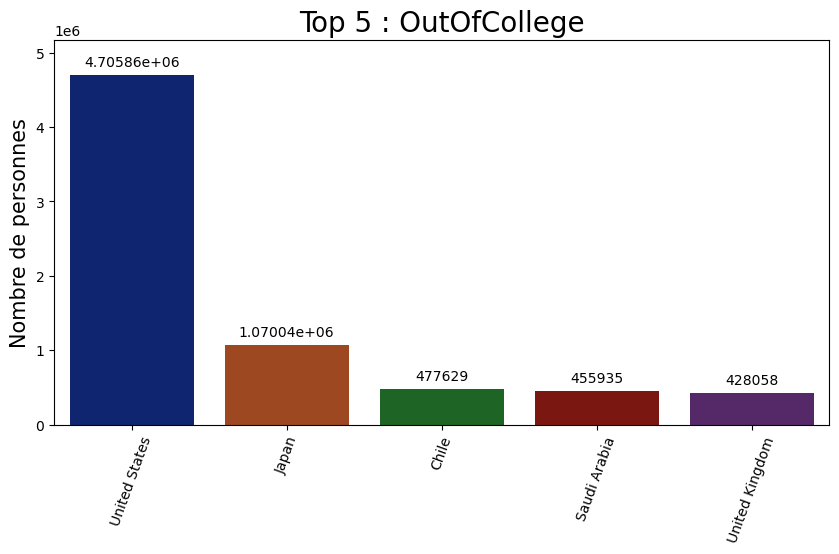

In [94]:
ListeIndicateur = ' -- '.join(list(DataRiche2015.iloc[:,3:].columns))
Indicateur = input('Choisissez un indicateur dans cette liste : {} '.format(ListeIndicateur))

try:
    Graph = DataRiche2015[['Country Name', Indicateur]]
    Graph = Graph.set_index('Country Name').sort_values(Indicateur, ascending = False).iloc[:5].reset_index()

    ax = plt.figure(figsize=(10,5))
    ax = sns.barplot(data = Graph, x = 'Country Name', y = Indicateur, palette="dark")
    ax.bar_label(ax.containers[0], padding=4)
    plt.xlabel('')
    plt.ylabel('Nombre de personnes', size = 15)
    plt.title('Top 5 : {}'.format(Indicateur), size = 20)
    plt.xticks(rotation = 70)
    ax.margins(y=0.1)
    plt.show()
    
except:
    Indicateur = ''.join(random.choices(ListeIndicateur.split(' -- ')))
    Graph = DataRiche2015[['Country Name', Indicateur]]
    Graph = Graph.set_index('Country Name').sort_values(Indicateur, ascending = False).iloc[:5].reset_index()

    ax = plt.figure(figsize=(10,5))
    ax = sns.barplot(data = Graph, x = 'Country Name', y = Indicateur, palette="dark")
    ax.bar_label(ax.containers[0], padding=4)
    plt.xlabel('')
    plt.ylabel('Nombre de personnes', size = 15)
    plt.title('Top 5 : {}'.format(Indicateur), size = 20)
    plt.xticks(rotation = 70)
    ax.margins(y=0.1)
    plt.show()

### 3.2.4 :  Etude des indicateurs via scalling:

In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [96]:
# Scalling des indicateurs:

min_max_scaler = preprocessing.MinMaxScaler()
DataRicheScale2015 = DataRiche2015.set_index('Country Name').iloc[:,2:]
ListeColonnes = list(DataRicheScale2015.columns)

for colonne in ListeColonnes:
    scaler = MinMaxScaler()
    DataRicheScale2015[colonne] = scaler.fit_transform(DataRicheScale2015[[colonne]])

DataRicheScale2015.head(3)

Indicator Name  GDP per capita (current US$)  Internet users (per 100 people)  \
Country Name                                                                    
Australia                           0.649702                         0.683217   
Austria                             0.480504                         0.667184   
Belgium                             0.427122                         0.695888   

Indicator Name  NbUtilisateurInternet  Population, total  Collegiens  \
Country Name                                                           
Australia                    0.076076           0.065676    0.055604   
Austria                      0.021812           0.018014    0.012461   
Belgium                      0.031689           0.026319    0.020105   

Indicator Name  Etudiants   Lyceens  Population, ages 0-14, total  \
Country Name                                                        
Australia        0.055544  0.056481                      0.066255   
Austria          0.012177  0.012497                      0.012984   
Belgium          0.017737  0.019493                      0.024385   

Indicator Name  Population, ages 15-64, total  Labor force, total  \
Country Name                                                        
Australia                            0.065648            0.069616   
Austria                              0.018303            0.018743   
Belgium                              0.025549            0.022164   

Indicator Name  Population growth (annual %)  \
Country Name                                   
Australia                           0.342647   
Austria                             0.295588   
Belgium                             0.223529   

Indicator Name  Unemployment, total (% of total labor force)  OutOfCollege  \
Country Name                                                                 
Australia                                           0.129630      0.000000   
Austria                                             0.111111      0.000867   
Belgium                                             0.240741      0.007460   

Indicator Name  OutOfLycee  OutOfFac  
Country Name                          
Australia              0.0  0.040796  
Austria                0.0  0.012077  
Belgium                0.0  0.019871

In [97]:
# Création d'un score global:
DataRicheScale2015['Global'] = DataRicheScale2015[['GDP per capita (current US$)', 'Internet users (per 100 people)', 'NbUtilisateurInternet', 'Population, total', 'Population growth (annual %)', 'Unemployment, total (% of total labor force)', 'OutOfCollege','OutOfLycee', 'OutOfFac']].sum(axis = 1)/9
DataRicheScale2015['Futur'] = DataRicheScale2015[['GDP per capita (current US$)', 'Internet users (per 100 people)', 'Population, ages 0-14, total', 'Population growth (annual %)', 'OutOfCollege']].sum(axis = 1)/4
DataRicheScale2015['Present'] = DataRicheScale2015[['GDP per capita (current US$)', 'Internet users (per 100 people)', 'OutOfLycee', 'OutOfFac','Unemployment, total (% of total labor force)']].sum(axis = 1)/5

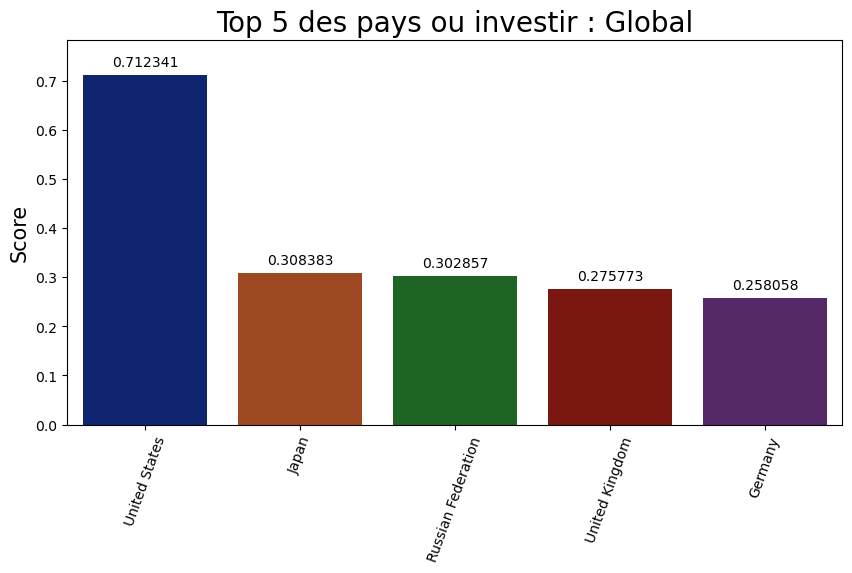

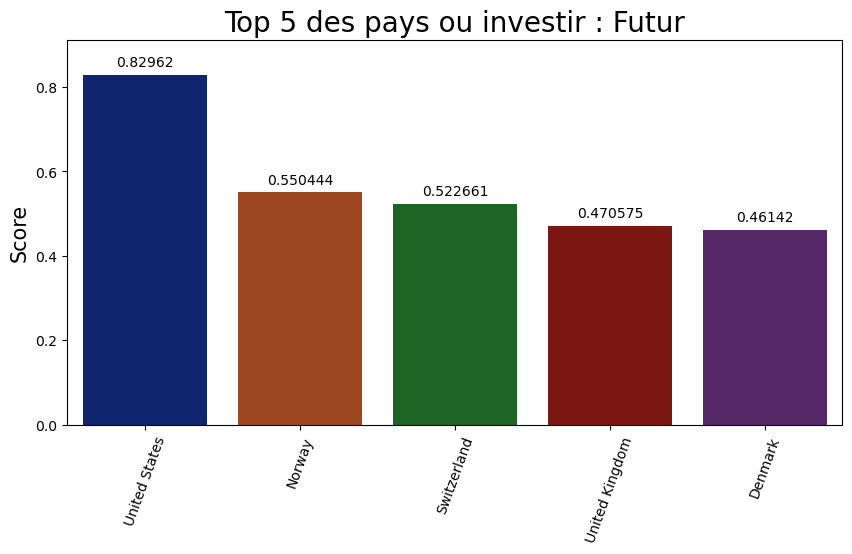

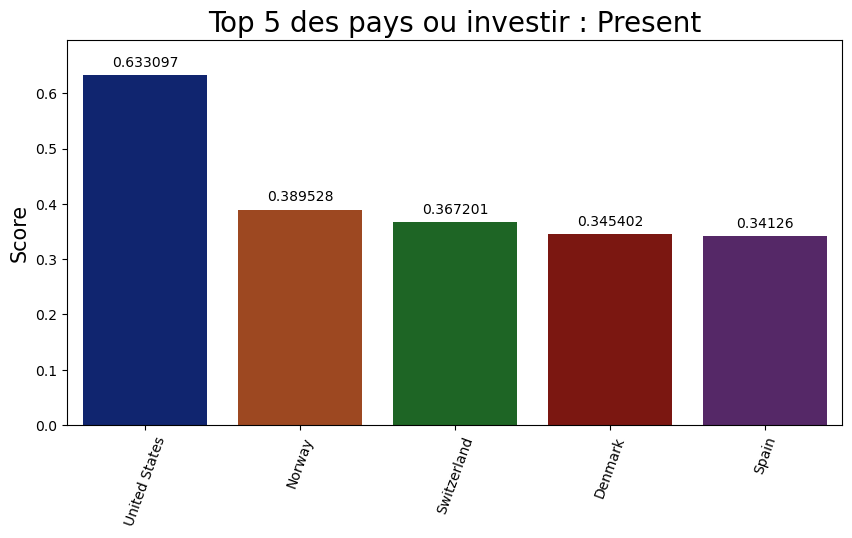

In [98]:
Scores = ['Global', 'Futur', 'Present']
PaysImportants = []

for score in Scores:
    
    Graph = DataRicheScale2015.sort_values(by = score, ascending = False)
    Graph = Graph.iloc[:5,:]
    PaysImportants.append(list(Graph.index))

    ax = plt.figure(figsize=(10,5))
    ax = sns.barplot(data = Graph, x = Graph.index, y = score, palette="dark")
    ax.bar_label(ax.containers[0], padding=4)
    plt.xlabel('')
    plt.ylabel('Score', size = 15)
    plt.title("Top 5 des pays ou investir : {}".format(score), size = 20)
    plt.xticks(rotation = 70)
    ax.margins(y=0.1)

    plt.show()

### 3.2.4 Perspective d'évolution :

In [99]:
# Suppression des annees avant 2000 car trop vieux et aprés 2020 car ce sont des extrapolations:
DataFinal2 = Data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020']]


Indicateurs = ['Enrolment in lower secondary education, both sexes (number)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in upper secondary education, both sexes (number)',
       'Population, age 0, total', 'Population, age 1, total',
       'Population, age 2, total', 'Population, age 3, total',
       'Population, age 4, total', 'Population, age 5, total',
       'Population, age 6, total', 'Population, age 7, total',
       'Population, age 8, total', 'Population, age 9, total',
       'Population, age 10, total', 'Population, age 11, total',
       'Population, age 12, total', 'Population, age 13, total',
       'Population, age 14, total', 'Population, age 15, total',
       'Population, age 16, total', 'Population, age 17, total',
       'Population, age 18, total', 'Population, age 19, total',
       'Population, age 20, total', 'Population, age 21, total',
       'Population, age 22, total', 'Population, age 23, total',
       'Population, age 24, total', 'Population, age 25, total',
       'Population, ages 0-14, total', 'Population, ages 15-64, total',
       'Population, total']

# Slice sur les indicateurs:
DataFinal2 = DataFinal2[DataFinal2['Indicator Name'].isin(Indicateurs)]

# Récupération des pays ou investir:
Pays = []
for liste in PaysImportants:
    for i in liste:
        Pays.append(i)
Pays = list(set(Pays))

# Slice sur les pays:
DataFinal2 = DataFinal2[DataFinal2['Country Name'].isin(Pays)]

# Création des indicateurs par niveau de scolarité : 
CoutryCodes = list(DataFinal2[DataFinal2['Indicator Code'].isin(Etudes)]['Country Code'].unique())

for CountryCode in CoutryCodes:
    Pays = DataFinal2[DataFinal2['Country Code'] == CountryCode]
    
    # Collégiens : 
    Collegien = Pays[Pays['Indicator Code'].isin(College)]
    Collegiens = Collegien.select_dtypes(exclude = 'object').sum().to_frame().rename(columns = {0:'Collegiens'}).T
    Collegiens = pd.concat([Collegien, Collegiens])
    Collegiens['Indicator Code'] = Collegiens['Indicator Code'].fillna('AgregaCollegien')
    Collegiens['Indicator Name'] = Collegiens['Indicator Name'].fillna('Collegiens')
    Collegiens = Collegiens.fillna(method="ffill", axis = 0).iloc[-1:,:]
    Collegiens = Collegiens.replace(0, np.nan)
    DataFinal2 = pd.concat([Collegiens,DataFinal2])
    
    # Lycéens :
    Lyceen = Pays[Pays['Indicator Code'].isin(Lycee)]
    Lyceens = Lyceen.select_dtypes(exclude = 'object').sum().to_frame().rename(columns = {0:'Lyceens'}).T
    Lyceens = pd.concat([Lyceen, Lyceens])
    Lyceens['Indicator Code'] = Lyceens['Indicator Code'].fillna('AgregaLyceen')
    Lyceens['Indicator Name'] = Lyceens['Indicator Name'].fillna('Lyceens')
    Lyceens = Lyceens.fillna(method="ffill", axis = 0).iloc[-1:,:]
    Lyceens = Lyceens.replace(0, np.nan)
    DataFinal2 = pd.concat([Lyceens,DataFinal2])
    
    # Etudes Supérieurs :
    EtudeSup = Pays[Pays['Indicator Code'].isin(Fac)]
    EtudeSups = EtudeSup.select_dtypes(exclude = 'object').sum().to_frame().rename(columns = {0:'Etudiants'}).T
    EtudeSups = pd.concat([EtudeSup, EtudeSups])
    EtudeSups['Indicator Code'] = EtudeSups['Indicator Code'].fillna('AgregaEtudiants')
    EtudeSups['Indicator Name'] = EtudeSups['Indicator Name'].fillna('Etudiants')
    EtudeSups = EtudeSups.fillna(method="ffill", axis = 0).iloc[-1:,:]
    EtudeSups = EtudeSups.replace(0, np.nan)
    DataFinal2 = pd.concat([EtudeSups,DataFinal2]) 

# Remplissage des colonnes vers la droite: (Me semble peu précis mais permet de récupérer des pays en plus pour l'analyse.)
# Récupération des valeurs sur trois ans:
DataFinal2.iloc[:,4:] = DataFinal2.iloc[:,4:].fillna(method="ffill", axis = 1, limit=3)

# Analyse de l'année 2015 :
Perspective = pd.pivot_table(DataFinal2, index = ('Country Name'), columns = 'Indicator Name', values = '2015')

# Création d'indicateurs par calculs:
Perspective['OutOfCollege'] = Perspective['Collegiens'] - Perspective['Enrolment in lower secondary education, both sexes (number)']
Perspective['OutOfLycee'] = Perspective['Lyceens'] - Perspective['Enrolment in upper secondary education, both sexes (number)']
Perspective['OutOfFac'] = Perspective['Etudiants'] - Perspective['Enrolment in tertiary education, all programmes, both sexes (number)']

# Suppression des valeurs négatives :
Perspective[Perspective < 0] = 0

In [100]:
# Clienst Actuels : 
ClientsActuels = Perspective[['Collegiens', 'Lyceens', 'Etudiants', 'OutOfCollege','OutOfLycee', 'OutOfFac']]
ClientsActuels['TotalActuel'] = ClientsActuels[['Collegiens', 'Lyceens', 'Etudiants']].sum(axis = 1)
ClientsActuels['TotalActuelOut'] = ClientsActuels[['OutOfCollege','OutOfLycee', 'OutOfFac']].sum(axis = 1)
ClientsActuels = ClientsActuels.sort_values('TotalActuel', ascending = False)
ClientsActuels

Indicator Name      Collegiens     Lyceens   Etudiants  OutOfCollege  \
Country Name                                                           
United States       17199323.0  13017540.0  32546732.0    4705861.00   
Russian Federation   5445949.0   3842249.0  11638274.0          0.00   
Japan                4667879.0   3673415.0   8556329.0    1070040.00   
Germany              3058163.0   2497178.0   6379487.0          0.00   
United Kingdom       2789968.0   2192907.0   5675676.0     428057.75   
Spain                1764282.0   1232097.0   3102840.0     138438.00   
Switzerland           326194.0    269239.0    707429.0      60994.00   
Denmark               269498.0    208932.0    500697.0      27066.00   
Norway                242502.0    190776.0    458701.0      53134.00   

Indicator Name      OutOfLycee     OutOfFac  TotalActuel  TotalActuelOut  
Country Name                                                              
United States        1281225.0  13015004.00   62763595.0      19002090.0  
Russian Federation   1019245.0   5045858.00   20926472.0       6065103.0  
Japan                      0.0   4693869.00   16897623.0       5763909.0  
Germany                    0.0   3401706.00   11934828.0       3401706.0  
United Kingdom             0.0   3322743.25   10658551.0       3750801.0  
Spain                      0.0   1138916.00    6099219.0       1277354.0  
Switzerland                0.0    412979.00    1302862.0        473973.0  
Denmark                    0.0    186941.00     979127.0        214007.0  
Norway                     0.0    190470.00     891979.0        243604.0

In [101]:
#Futurs Clients :
FutursClients = Perspective[['Population, age 11, total', 'Population, age 10, total',
       'Population, age 9, total', 'Population, age 8, total',
       'Population, age 7, total', 'Population, age 6, total',
       'Population, age 5, total', 'Population, age 4, total',
       'Population, age 3, total', 'Population, age 2, total',]]
FutursClients.columns = ['Dans 1an', 'Dans 2 ans',
       'Dans 3ans', 'Dans 4ans', 'Dans 5ans', 'Dans 6ans',
       'Dans 7ans', 'Dans 8ans', 'Dans 9ans', 'Dans 10ans']

FutursClients['TotalFutur'] = FutursClients.sum(axis = 1)
FutursClients

Dans 1an  Dans 2 ans  Dans 3ans  Dans 4ans  Dans 5ans  \
Country Name                                                                 
Denmark               65431.0     64571.0    63720.0    62879.0    62055.0   
Germany              724279.0    714223.0   704763.0   696319.0   689310.0   
Japan               1123538.0   1110921.0  1096294.0  1080271.0  1063457.0   
Norway                58967.0     58797.0    58585.0    58365.0    58162.0   
Russian Federation  1443108.0   1455385.0  1470546.0  1484900.0  1494749.0   
Spain                466125.0    473246.0   480010.0   485789.0   489959.0   
Switzerland           76649.0     75283.0    74075.0    73056.0    72262.0   
United Kingdom       692829.0    701660.0   710015.0   718101.0   726132.0   
United States       4305908.0   4312599.0  4322729.0  4335064.0  4348369.0   

                    Dans 6ans  Dans 7ans  Dans 8ans  Dans 9ans  Dans 10ans  \
Country Name                                                                 
Denmark               61258.0    60495.0    59779.0    59118.0     58521.0   
Germany              683703.0   679459.0   676545.0   674924.0    674560.0   
Japan               1045688.0  1026790.0  1006593.0   984932.0    961631.0   
Norway                57965.0    57751.0    57502.0    57199.0     56827.0   
Russian Federation  1499223.0  1497454.0  1488567.0  1471696.0   1445966.0   
Spain                492207.0   492219.0   489685.0   484290.0    475722.0   
Switzerland           71703.0    71378.0    71295.0    71461.0     71878.0   
United Kingdom       733409.0   739236.0   742916.0   743750.0    741043.0   
United States       4361877.0  4374818.0  4386423.0  4395924.0   4402552.0   

                    TotalFutur  
Country Name                    
Denmark               617827.0  
Germany              6918085.0  
Japan               10500115.0  
Norway                580120.0  
Russian Federation  14751594.0  
Spain                4829252.0  
Switzerland           729040.0  
United Kingdom       7249091.0  
United States       43546263.0

                    TotalActuel  TotalActuelOut  TotalFutur
Country Name                                               
United States        62763595.0      19002090.0  43546263.0
Russian Federation   20926472.0       6065103.0  14751594.0
Japan                16897623.0       5763909.0  10500115.0
Germany              11934828.0       3401706.0   6918085.0
United Kingdom       10658551.0       3750801.0   7249091.0
Spain                 6099219.0       1277354.0   4829252.0
Switzerland           1302862.0        473973.0    729040.0
Denmark                979127.0        214007.0    617827.0
Norway                 891979.0        243604.0    580120.0


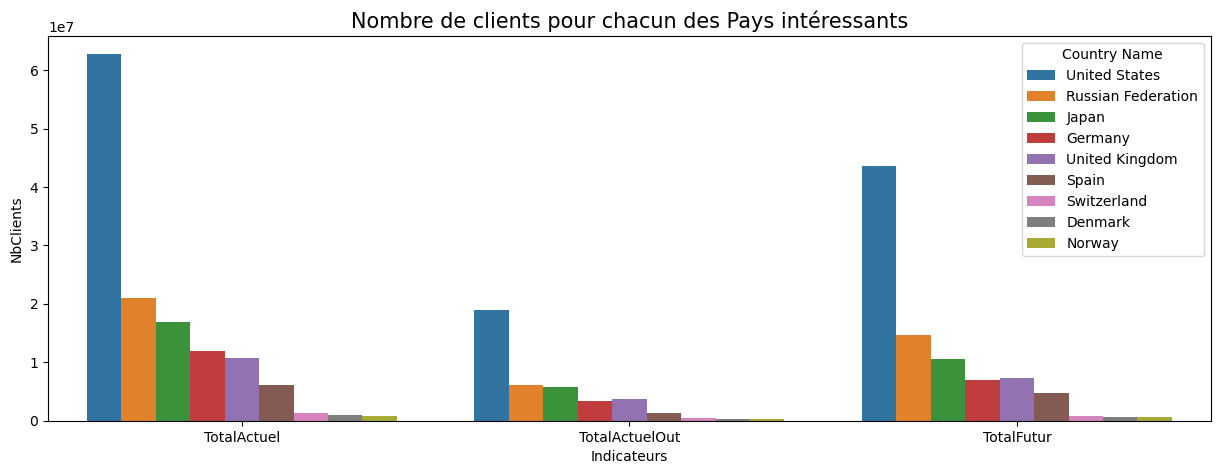

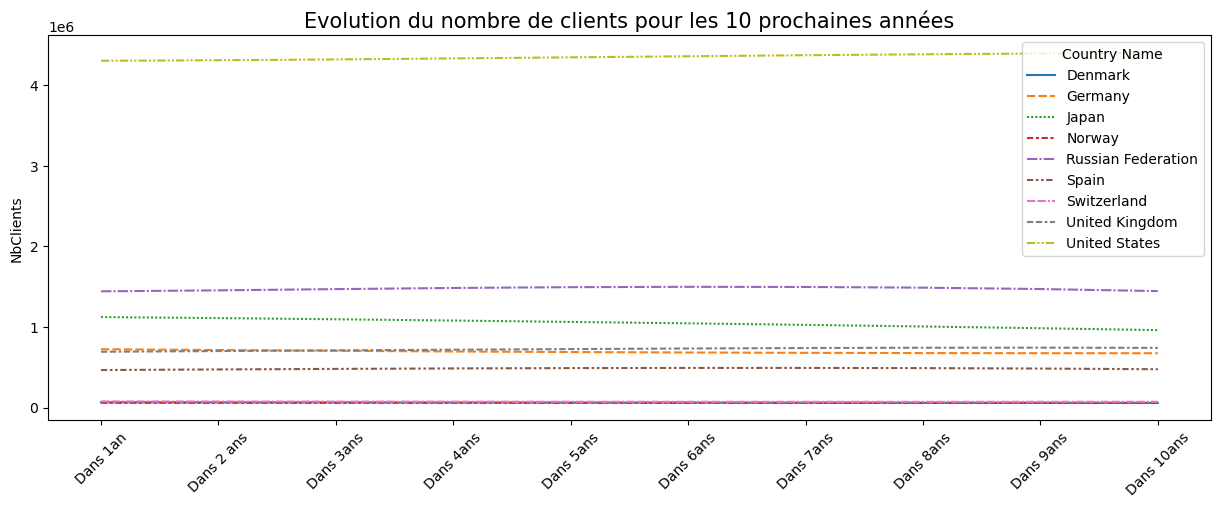

In [102]:
# Graphiques:

graph = pd.merge(ClientsActuels.iloc[:,-2:], FutursClients.iloc[:,-1:], left_index = True, right_index = True)
print(graph)
graph = graph.stack().reset_index(name='Valeur').rename(columns={'level_1':'Indicateurs'}) # inverse du pivot.

fig, ax = plt.subplots(figsize = (15,5))
sns.barplot(graph, x = 'Indicateurs', y = 'Valeur', hue = 'Country Name')
plt.title('Nombre de clients pour chacun des Pays intéressants', size = 15)
plt.ylabel('NbClients')
plt.show()

fig, ax = plt.subplots(figsize = (15,5))
sns.lineplot(FutursClients.iloc[:,:-1].T)
plt.xticks(rotation = 45)
plt.ylabel('NbClients')
plt.title('Evolution du nombre de clients pour les 10 prochaines années', size = 15)
plt.show()

### 3.2.5 : Perspective d'avenir : Extrapolation des valeurs pour le futurs.

In [103]:
# Création de définition permettant d'estimer les données :

def estimation(value, annee):
    index = value.index.astype(int)[0]
    value = value.T.dropna()
    value.reset_index(inplace = True)
    value['index'] = value['index'].astype(int)
    x = value['index']
    y = value[index]
    model = np.polyfit(x, y, deg = 1)
  
    predict = np.poly1d(model)
    if predict(annee) >=0:
        return round(predict(annee),1)
    else:
        return 0

def rsquare(value):
    index = value.index.astype(int)[0]
    value = value.T.dropna()
    value.reset_index(inplace = True)
    value['index'] = value['index'].astype(int)
    x = value['index']
    y = value[index]
    model = np.polyfit(x, y, deg = 2)
  
    predict = np.poly1d(model)
    return round(r2_score(y, predict(x)),2)

In [104]:
# Création d'une DF avec toutes les années uniquement pour les pays riches et à plus d'habitant que la médiane de 2015:
Mediane = DataRiche2015['Population, total'].median()
PaysRiches2015 = list(DataRiche2015[DataRiche2015['Population, total'] >= Mediane]['Country Name'])

DataFinalEst = DataFinal[(DataFinal['Income Group'] == 'High income: nonOECD') | (DataFinal['Income Group'] == 'High income: OECD')]
DataFinalEst = DataFinalEst[DataFinalEst['Country Name'].isin(PaysRiches2015)]

# Suppression de l'indicateur Internet Users car bien que trés utile le peu de donnée nous donne des indicateurs à plus de 100%.
# Il est peu probable que cette indicateur atteigne les 100% dans un pays sauf si internet devient gratuit.
DataFinalEst = DataFinalEst[(DataFinalEst['Indicator Name'] != 'Internet users (per 100 people)') & (DataFinalEst['Indicator Name'] != 'Unemployment, total (% of total labor force)') & (DataFinalEst['Indicator Name'] != 'Population growth (annual %)')]

In [105]:
# Application des définitions:
for year in range (2023,2031):
    DataFinalEst[str(year)] = 0
    for row in range (0,len(DataFinalEst)):
        DataValue = DataFinalEst.iloc[row:row+1,8:25]
        DataFinalEst[str(year)].iloc[row:row+1] = estimation(DataValue, year)

DataFinalEst['RSquare'] = 0
for row in range (0,len(DataFinalEst)):
    DataValue = DataFinalEst.iloc[row:row+1,8:25]
    DataFinalEst['RSquare'].iloc[row:row+1] = rsquare(DataValue)
        

DataFinalEst.head(3)

Country Name Country Code               Region       Income Group  \
123    Australia          AUS  East Asia & Pacific  High income: OECD   
124    Australia          AUS  East Asia & Pacific  High income: OECD   
125    Australia          AUS  East Asia & Pacific  High income: OECD   

                                                  Indicator Name  \
123                                Population, ages 15-64, total   
124  Enrolment in lower secondary education, both sexes (number)   
125                                            Population, total   

     Indicator Code  \
123  SP.POP.1564.TO   
124         UIS.E.2   
125     SP.POP.TOTL   

                                                                                                                                           Long definition  \
123  Total population between the ages 15 to 64. Population is based on the de facto definition of population, which counts all residents regardless of...   
124                                      Total number of students enrolled in public and private lower secondary education institutions regardless of age.   
125  Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The valu...   

                             Topic        2000        2001  ...        2016  \
123  Health: Population: Structure  12792016.0  12991718.0  ...  15887445.0   
124                      Secondary   1267972.0   1288457.0  ...   1267122.0   
125  Health: Population: Structure  19153000.0  19413000.0  ...  24127159.0   

           2023        2024        2025        2026        2027        2028  \
123  17398925.6  17600139.5  17801353.5  18002567.5  18203781.4  18404995.4   
124   1281383.3   1281464.6   1281546.0   1281627.3   1281708.6   1281789.9   
125  26201382.7  26517961.3  26834539.9  27151118.4  27467697.0  27784275.6   

           2029        2030  RSquare  
123  18606209.3  18807423.3     1.00  
124   1281871.2   1281952.5     0.13  
125  28100854.1  28417432.7     1.00  

[3 rows x 34 columns]

In [106]:
# Analyse du RSquare:
DataFinalEst['RSquare'].describe([.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    198.000000
mean       0.871667
std        0.180737
min        0.110000
10%        0.620000
20%        0.800000
30%        0.890000
40%        0.920000
50%        0.940000
60%        0.970000
70%        0.980000
80%        0.990000
90%        1.000000
max        1.000000
Name: RSquare, dtype: float64

- **Le R² min est a 0.31 ce qui n'est pas génial, mais plus de 90% des R² est à plus de 0.8.**

In [107]:
DataFinalEst.groupby('Indicator Name')['RSquare'].mean().sort_values()

Indicator Name
Enrolment in lower secondary education, both sexes (number)             0.636111
Enrolment in upper secondary education, both sexes (number)             0.716667
GDP per capita (current US$)                                            0.862222
Enrolment in tertiary education, all programmes, both sexes (number)    0.871667
Collegiens                                                              0.879444
Lyceens                                                                 0.896111
Labor force, total                                                      0.925556
Population, ages 15-64, total                                           0.935556
Population, total                                                       0.941111
Population, ages 0-14, total                                            0.956111
Etudiants                                                               0.967778
Name: RSquare, dtype: float64

- **L'indicateur avec le R² moyen le plus bas et le PIB par habitant mais il reste tout de même vraiment bon.**
- **Il y a donc quelques extrapolation qui sont moyenne voir mauvaise mais ca n'impacte pas l'analyse des indicateurs.**

In [108]:
# Définition global pour automatiser la création du score global:

def ScoreGlobal(DataFrame, Annee):
    Datapivot = pd.pivot_table(DataFinalEst, index = 'Country Name', values = Annee, columns = 'Indicator Name')
    Datapivot = Datapivot[['GDP per capita (current US$)', 'Population, ages 0-14, total', 'Lyceens']]
    min_max_scaler = preprocessing.MinMaxScaler()
    ListeColonnes = list(Datapivot.columns)

    for colonne in ListeColonnes:
        scaler = MinMaxScaler()
        Datapivot[colonne] = scaler.fit_transform(Datapivot[[colonne]])
        
    Datapivot['ScoreGlobal'] = Datapivot.sum(axis = 1)/Datapivot.shape[1]
    
    Graph = Datapivot.sort_values(by = 'ScoreGlobal', ascending = False)
    Graph = Graph.iloc[:5,:]
    Graph

    ax = plt.figure(figsize=(10,5))
    ax = sns.barplot(data = Graph, x = Graph.index, y = 'ScoreGlobal', palette="dark")
    ax.bar_label(ax.containers[0], padding=4)
    plt.xlabel('')
    plt.ylabel('Score', size = 15)
    plt.title("Top 5 des meilleurs pays ou investir en {}".format(Annee), size = 20)
    plt.xticks(rotation = 70)
    ax.margins(y=0.1)
        
    return plt.show()

Merci de choisir une année à étudier : 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030 


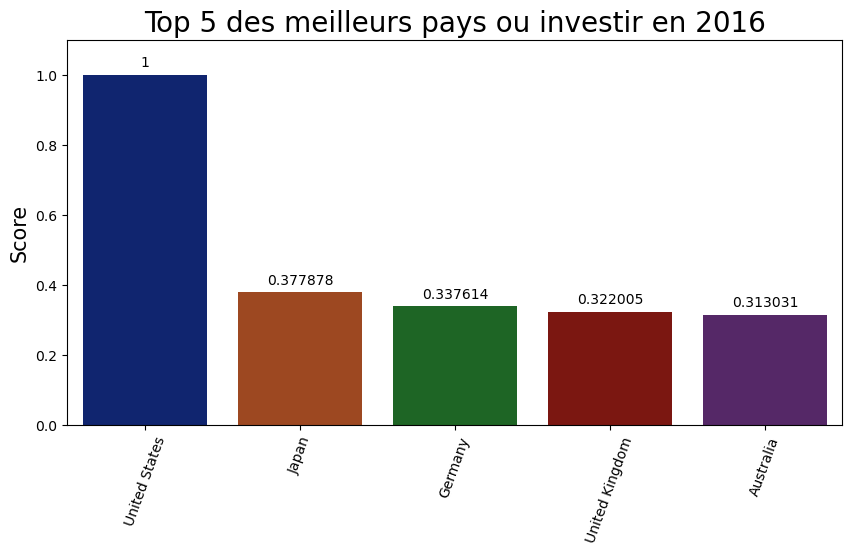

In [109]:
# Choix de l'année à visualiser:
Annee = input('Merci de choisir une année à étudier : {} '.format(', '.join(list(DataFinalEst.columns[25:-1]))))

try:
    ScoreGlobal(DataFinalEst,Annee)
except:
    ListeAnnees = list(DataFinalEst.columns[24:-1])
    Annee = ''.join(random.choices(ListeAnnees))
    ScoreGlobal(DataFinalEst,Annee)